# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

# <center>Южаков Максим группа ИАД1</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm # pip install tqdm – замер времени выполнения итераций цикла
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [212]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [213]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [214]:
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

In [215]:
data.sex.value_counts()

F    591
M    446
m      7
Name: sex, dtype: int64

как можно увидеть, в некотрых столбцах присутствую ошибки

In [216]:
data.sex = data.sex.apply(lambda x: 'M' if x=='m' else x)
data.Pstatus = data.Pstatus.apply(lambda x: 'T' if x=='t' else x)
data.Medu = data.Medu.apply(lambda x: '0' if x=='o' else x)
data.Fedu = data.Fedu.apply(lambda x: '0' if x=='o' else x)
data.Mjob = data.Mjob.apply(lambda x: 'at_home' if x=='at-home' else x)
data.Fjob = data.Fjob.apply(lambda x: 'at_home' if x=='at-home' else x)
data.guardian = data.guardian.apply(lambda x: 'father' if x=='futher' else x)

In [217]:
data.sex.value_counts()

F    591
M    453
Name: sex, dtype: int64

Приведем к числововму виду бинарные столбцы

In [218]:
for i in ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    data[i] = data[i].apply(lambda x: '0' if x=='no' else '1')
    data[i] = data[i].astype(int)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   int32  
 18  famsup      1044 non-null   int32  
 19  paid        1044 non-null  

cheating можно убрать, т.к пропусков там больше 50%

In [220]:
data = data.drop('cheating', 1)

В остальных столбцах с пропущенными значениями заменим пропуски медианными значениями

In [221]:
for i in ["famrel","Dalc",'Walc']:
    median = data[i].median()
    data[i] = data[i].fillna(median)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   int32  
 18  famsup      1044 non-null   int32  
 19  paid        1044 non-null  

Так как Walc и Dalc являются схожими признаками, их можно объединить,на таблице корреляции увидим, что объединенный признак будет достаточно весом

In [223]:
data["allalc"] = data["Walc"]+data["Dalc"]
data = data.drop('Walc', 1)
data = data.drop('Dalc', 1)

Далее преобразуем остальные признаки в числовые

In [224]:
data["Subject"] = data['Subject'].apply(lambda x: '1' if x=='Por' else '0')
data["Subject"] = data['Subject'].astype(int)
data["school"] = data['school'].apply(lambda x: '1' if x=='GP' else '0')
data["school"] = data['school'].astype(int)
data["sex"] = data['sex'].apply(lambda x: '1' if x=='M' else '0')
data["sex"] = data['sex'].astype(int)
data["famsize"] = data['famsize'].apply(lambda x: '1' if x=='GT3' else '0')
data["famsize"] = data['famsize'].astype(int)
data["address"] = data['address'].apply(lambda x: '1' if x=='U' else '0')
data["address"] = data['address'].astype(int)
data["Pstatus"] = data['Pstatus'].apply(lambda x: '1' if x=='T' else '0')
data["Pstatus"] = data['Pstatus'].astype(int)

In [225]:
data['Mjob'] = data['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
data['Fjob'] = data['Fjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
data['reason'] = data['reason'].map({'course':1,'reputation':2,'home':3,'other':4})
data['guardian'] = data['guardian'].map({'mother':1,'father':2,'other':3})

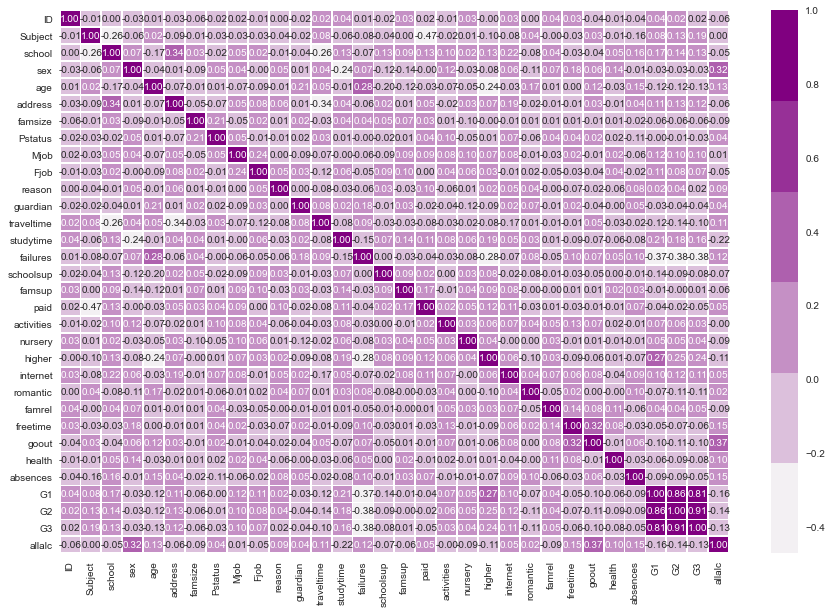

In [226]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.9, cmap=sns.light_palette("purple"));

Посмотрим влияение некоторых признаков на G1,G2 и G3:
Некоторые признаки, такие как ID, sex, Pstatus и д.р имеют вообще нулевую корреляцию с этими признакми,поэтому их можно исключить,так как они не имеют никакого влияения на значимый для нас признак.
Далее уберем столбцы, которые имеют коэффицент 0.1 и меньше с указанными выше признаками. Оставим из них признаки, чуть большие 0.1.

In [227]:
data = data.drop('ID', 1)
data = data.drop('famsup', 1)
data = data.drop('paid', 1)
data = data.drop('activities', 1)
data = data.drop('nursery', 1)
data = data.drop('famrel', 1)
data = data.drop('freetime', 1)
data = data.drop('goout', 1)
data = data.drop('health', 1)
data = data.drop('absences', 1)

In [228]:
data = data.drop('sex', 1)
data = data.drop('famsize', 1)
data = data.drop('Pstatus', 1)

In [229]:
data = data.drop('Fjob', 1)
data = data.drop('reason', 1)
data = data.drop('guardian', 1)

In [230]:
data

,Subject,school,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,higher,internet,romantic,G1,G2,G3,allalc
0,1,1,16,1,3,4,2,1,1,0,0,1,1,0,15,13,14,5.0
1,1,1,17,1,3,2,1,1,2,0,0,1,1,0,17,18,17,4.0
2,1,1,16,1,1,2,5,2,1,2,0,1,1,0,9,8,10,8.0
3,1,0,17,1,2,3,1,2,2,0,0,1,1,0,14,15,16,2.0
4,1,1,16,1,1,1,3,2,1,0,0,1,0,1,12,13,13,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,15,0,3,3,2,2,3,2,0,1,1,1,10,10,10,5.0
1040,1,1,15,0,2,1,5,1,2,0,0,1,1,1,10,9,10,2.0
1041,1,0,16,0,1,1,3,3,2,0,0,1,0,0,16,17,18,2.0
1042,1,1,16,1,2,1,3,4,1,0,0,1,0,0,9,9,11,2.0


Создадим резервные данные для частей 3 и 4, где придется видоизменять признак G3

In [23]:
data_res =  data

In [24]:
data_res_2 =  data

In [231]:
data = data.drop('G2', 1)

In [232]:
data['G3'].unique()

array([14, 17, 10, 16, 13, 12,  9,  6, 11,  8, 18, 15,  0,  5,  7, 19,  4,
        1, 20], dtype=int64)

In [233]:
(data['G3']==13).sum()

113

Проверив количество данных с различными оценками, приходим к выводу,что некоторые из них е составляют и 1% от всех данных, следовательно, ихможно убрать

In [234]:
data = data.drop(np.where(data["G3"]==20)[0],axis=0)
data = data.drop(np.where(data["G3"]==1)[0],axis=0)
data = data.drop(np.where(data["G3"]==4)[0],axis=0)
data = data.drop(np.where(data["G3"]==19)[0],axis=0)
data = data.drop(np.where(data["G3"]==5)[0],axis=0)

In [235]:
y = data["G3"]
data = data.drop('G3', 1)

In [236]:
X=data

In [237]:
X

,Subject,school,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,higher,internet,romantic,G1,allalc
0,1,1,16,1,3,4,2,1,1,0,0,1,1,0,15,5.0
1,1,1,17,1,3,2,1,1,2,0,0,1,1,0,17,4.0
2,1,1,16,1,1,2,5,2,1,2,0,1,1,0,9,8.0
3,1,0,17,1,2,3,1,2,2,0,0,1,1,0,14,2.0
4,1,1,16,1,1,1,3,2,1,0,0,1,0,1,12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,15,0,3,3,2,2,3,2,0,1,1,1,10,5.0
1040,1,1,15,0,2,1,5,1,2,0,0,1,1,1,10,2.0
1041,1,0,16,0,1,1,3,3,2,0,0,1,0,0,16,2.0
1042,1,1,16,1,2,1,3,4,1,0,0,1,0,0,9,2.0


In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify = y) 

In [33]:
y_train.value_counts(normalize=True)

10    0.148780
11    0.145122
13    0.108537
12    0.098780
14    0.086585
15    0.079268
8     0.064634
9     0.060976
16    0.051220
0     0.051220
17    0.032927
18    0.026829
7     0.018293
6     0.017073
19    0.004878
5     0.004878
Name: G3, dtype: float64

In [34]:
y_test.value_counts(normalize=True)

10    0.150485
11    0.145631
13    0.106796
12    0.101942
14    0.087379
15    0.077670
8     0.067961
9     0.058252
0     0.053398
16    0.048544
17    0.033981
18    0.024272
7     0.019417
6     0.014563
19    0.004854
5     0.004854
Name: G3, dtype: float64

данные распределены схожим образом

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

#### Линейная регрессия

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regressionModel1 = LinearRegression()
regressionModel1.fit(X_train, y_train)

LinearRegression()

сразу выделим данные и создадим модель без признака G1

In [36]:
X_tr = X_train.drop('G1',axis = 1)

In [37]:
X_te = X_test.drop('G1',axis = 1)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regressionModel2 = LinearRegression()
regressionModel2.fit(X_tr, y_train)

LinearRegression()

In [39]:
lr_pred1 = regressionModel1.predict(X_test)

In [40]:
lr_pred2 = regressionModel2.predict(X_te)

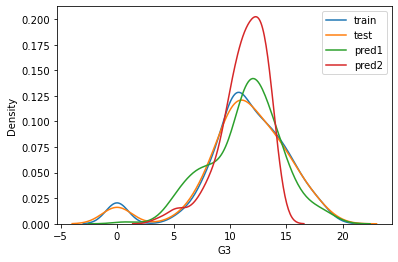

In [41]:
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(lr_pred1, label='pred1')
sns.kdeplot(lr_pred2, label='pred2')
plt.legend()
plt.show()

На данном графике мы видим, что модель с признаком G1 более или менее схожа со значениями трейн и тест, в то время как без признака G1 модель сильно меняется в предсказанных значениях в худшую сторону

Создадим функциюдля вывода качества моделей, чтобы не прописывать все много раз.

In [42]:
from sklearn import metrics
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE: {}".format(mse, rmse, R2, mae))

Посчитаем их для нашх моделей линейноq регрессии на отложенной выборке

In [43]:
calc_metrics(y_test, lr_pred1)

MSE:   5.064542586470205
RMSE:  2.250453862328709
R2:    0.6556476199488088
MAE: 1.4827535754387247


Модель с G1 показывает неплохие значения на метриках ошибок
Она не сильно отклоняеся по значениям

In [44]:
calc_metrics(y_test, lr_pred2)

MSE:   10.163873249181016
RMSE:  3.188083005378156
R2:    0.3089299015385608
MAE: 2.3458180373462425


Тут же, без g2, ошибка возрастает примерно в 2 раза, что не очень хорошо



посмотрим значимсть признаков для LR

In [45]:
coefs = pd.Series(regressionModel1.coef_, 
                  index=X_train.columns)
coefs

Subject       1.110285
school       -0.072656
age          -0.046965
address       0.366042
Medu          0.094465
Fedu         -0.093445
Mjob         -0.011461
traveltime    0.033091
studytime    -0.059964
failures     -0.329511
schoolsup     0.251629
higher        0.127527
internet      0.257577
romantic     -0.338457
G1            1.002164
allalc        0.028476
dtype: float64

Тут заметно влияние Subject и G1 на G3, если с g1 все понятно, то с Subject выходит зависимость , что если студент изучает порутгальский, то итоговая оценка у него будет выше(Por == 1 во время замены категориальных признаков на числовые). 
- Так же видим, что и адрес влияет на итоговую оценку, по нашим заменам на числовые признаки, что это означает, что если студент живет в городе, то у него выше шанс получить хорошую итогувую оценку.
- А вот количество неудач по предметам негативно сказывается на итоговой оценке, ровно как и романтические отношения плохо влияют на успеваемость.
- schoolsup и интернет так же помогли получать хорошие оценки ученикам.
- Как ни странно, алкоголь и время, затраченное на учебу не сильно повлияли на G3

Проверим теперь для модели без G1

In [46]:
coefs = pd.Series(regressionModel2.coef_, 
                  index=X_tr.columns)
coefs

Subject       1.860765
school        0.676943
age          -0.018426
address       0.529764
Medu          0.221398
Fedu          0.146482
Mjob          0.075843
traveltime    0.020904
studytime     0.337868
failures     -1.431531
schoolsup    -1.270088
higher        1.809527
internet      0.484025
romantic     -0.571722
allalc       -0.109995
dtype: float64

Тут вся нагрузка перешла на Subject и его значимсоть для итоговой оценки еще сильнее возросла, как и у всех остальных признаков.
Следует выделить, насколько выросло отрицательное влияние failures. Так же сильно выросло значение higher, следовательно, желание учеников получить высшее образование сильно влияет на итоговую оценку, т.о после того, как мы убрали G1 большинство признаков закономерно начали влиять на G3.
- Странным является то, что дополнительная помощь в учебе стала отрицательно влиятьна учеников, не знаю, вероятно ученикам надоедает черезмерная учеба.

#### Регуляризация

Ridge

In [47]:
from sklearn.linear_model import Lasso, Ridge
ridgeModel1 = Ridge(alpha=0)
ridgeModel1.fit(X_train, y_train)

Ridge(alpha=0)

In [48]:
ridgeModel2 = Ridge(alpha=0)
ridgeModel2.fit(X_tr, y_train)

Ridge(alpha=0)

In [49]:
ridge_pred1 = ridgeModel1.predict(X_test)

In [50]:
ridge_pred2 = ridgeModel2.predict(X_te)

In [51]:
calc_metrics(y_test, ridge_pred1)

MSE:   5.064542586470202
RMSE:  2.2504538623287087
R2:    0.655647619948809
MAE: 1.4827535754387235


In [52]:
calc_metrics(y_test, ridge_pred2)

MSE:   10.163873249181012
RMSE:  3.1880830053781555
R2:    0.30892990153856115
MAE: 2.3458180373462416


Теперь выберем подходящую alpha

In [53]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

In [54]:
ridgeModel2 = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

In [55]:
ridgeModel.fit(X_train, y_train)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [56]:
ridgeModel2.fit(X_tr, y_train)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [57]:
ridgeModel.alpha_

29.900000000000002

In [58]:
ridgeModel2.alpha_

12.100000000000001

In [59]:
ridgeModel.best_score_ * -1

2.184071168744807

In [60]:
ridgeModel2.best_score_ * -1

3.4182717978219386

In [61]:
ridge_pred = ridgeModel.predict(X_test)

In [62]:
ridge_pred2 = ridgeModel2.predict(X_te)

In [63]:
calc_metrics(y_test, ridge_pred)

MSE:   5.065040338988706
RMSE:  2.2505644489746803
R2:    0.6556137763663933
MAE: 1.4689498189298122


In [64]:
calc_metrics(y_test, ridge_pred2)

MSE:   10.164167387381076
RMSE:  3.1881291359324004
R2:    0.3089099022617209
MAE: 2.3377022305779867


Результаты почти не поменялись

Лассо

In [65]:
lassoModel = linear_model.Lasso(alpha=0)

lassoModel.fit(X_train, y_train)

Lasso(alpha=0)

In [66]:
lassoModel2 = linear_model.Lasso(alpha=0)

lassoModel2.fit(X_tr, y_train)

Lasso(alpha=0)

In [67]:
lasso_pred = lassoModel.predict(X_test)

In [68]:
lasso_pred2 = lassoModel2.predict(X_te)

In [69]:
calc_metrics(y_test, lasso_pred)

MSE:   5.064542586470207
RMSE:  2.2504538623287096
R2:    0.6556476199488087
MAE: 1.482753575438725


In [70]:
calc_metrics(y_test, lasso_pred2)

MSE:   10.163873249181012
RMSE:  3.1880830053781555
R2:    0.30892990153856115
MAE: 2.3458180373462416


Подберем параметр alpha для lasso

In [71]:
lassoModel = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1), 
                                  normalize=True,
                                  cv=10)

In [72]:
lassoModel2 = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1), 
                                  normalize=True,
                                  cv=10)

In [73]:
lassoModel.fit(X_train, y_train)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=10, normalize=True)

In [74]:
lassoModel2.fit(X_tr, y_train)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=10, normalize=True)

In [75]:
lassoModel.alpha_

0.1

In [76]:
lassoModel2.alpha_

9.9

In [77]:
lasso_pred = lassoModel.predict(X_test)

In [78]:
lasso_pred2 = lassoModel2.predict(X_te)

In [79]:
calc_metrics(y_test, lasso_pred)

MSE:   13.371688553900022
RMSE:  3.65673194996571
R2:    0.09082158946797281
MAE: 2.6339851620844317


Тут ошибка сильно возросла и упал r2, т.е lasso модел  не пошла на пользу обоим моделям регрессии, с признаком G1 и без него

In [80]:
calc_metrics(y_test, lasso_pred2)

MSE:   14.71009320330594
RMSE:  3.835373932657146
R2:    -0.00018027666812092669
MAE: 2.791960691451575


#### Полиномиальная регрессия

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(X_train)

PolynomialFeatures(degree=1, include_bias=False)

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=1, include_bias=False)
poly2.fit(X_tr)

PolynomialFeatures(degree=1, include_bias=False)

In [83]:
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

In [84]:
poly_train2 = poly2.transform(X_tr)
poly_test2 = poly2.transform(X_te)

In [85]:
print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 16
Number of features after polynomial transformation: 16


In [86]:
print('Original number of features:', X_tr.shape[1])
print('Number of features after polynomial transformation:', poly_train2.shape[1])

Original number of features: 15
Number of features after polynomial transformation: 15


In [87]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

LinearRegression(normalize=True)

In [88]:
regressionModel2 = linear_model.LinearRegression(normalize=True)
regressionModel2.fit(poly_train2, y_train)

LinearRegression(normalize=True)

In [89]:
calc_metrics(y_test, regressionModel.predict(poly_test))

MSE:   5.064542586470203
RMSE:  2.2504538623287087
R2:    0.6556476199488089
MAE: 1.4827535754387235


In [90]:
calc_metrics(y_test, regressionModel2.predict(poly_test2))

MSE:   10.163873249181016
RMSE:  3.188083005378156
R2:    0.3089299015385608
MAE: 2.345818037346242


Значения совпадают с результатами для линейной модели.

Квадратичная регрессия

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 16
Number of features after polynomial transformation: 152


In [92]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly2.fit(X_tr)

poly_train2 = poly2.transform(X_tr)
poly_test2 = poly2.transform(X_te)

print('Original number of features:', X_tr.shape[1])
print('Number of features after polynomial transformation:', poly_train2.shape[1])

Original number of features: 15
Number of features after polynomial transformation: 135


In [93]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

LinearRegression(normalize=True)

In [94]:
regressionModel2 = linear_model.LinearRegression(normalize=True)
regressionModel2.fit(poly_train2, y_train)

LinearRegression(normalize=True)

In [95]:
print('\nTest:')
calc_metrics(y_test, regressionModel.predict(poly_test))


Test:
MSE:   5.372654598027129
RMSE:  2.3178987462844725
R2:    0.6346982246795445
MAE: 1.5345903629795392


In [96]:
print('\nTest:')
calc_metrics(y_test, regressionModel2.predict(poly_test2))


Test:
MSE:   11.329992635693587
RMSE:  3.366005442017821
R2:    0.2296421910862516
MAE: 2.4987334013874007


Результаты немножко ухудшились

Перейдем к 3 степени

In [97]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 16
Number of features after polynomial transformation: 968


In [98]:
poly2 = PolynomialFeatures(degree=3, include_bias=False)
poly2.fit(X_tr)

poly_train2 = poly2.transform(X_tr)
poly_test2= poly2.transform(X_te)

print('Original number of features:', X_tr.shape[1])
print('Number of features after polynomial transformation:', poly_train2.shape[1])

Original number of features: 15
Number of features after polynomial transformation: 815


In [99]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

LinearRegression(normalize=True)

In [100]:
regressionModel2 = linear_model.LinearRegression(normalize=True)
regressionModel2.fit(poly_train2, y_train)

LinearRegression(normalize=True)

In [101]:
print('\nTest:')
calc_metrics(y_test, regressionModel.predict(poly_test))


Test:
MSE:   15037.625748131026
RMSE:  122.62799740732548
R2:    -1021.4501281757475
MAE: 49.075227792916515


In [102]:
print('\nTest:')
calc_metrics(y_test, regressionModel2.predict(poly_test2))


Test:
MSE:   1721.2672749654157
RMSE:  41.48815824985987
R2:    -116.03376419856984
MAE: 19.813624919324564


Модель переобучилась

Попробуем испольщовать регуляризацию

In [103]:
regressionModel = linear_model.Ridge(alpha=0.01, normalize=True)
regressionModel.fit(poly_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [104]:
regressionModel2 = linear_model.Ridge(alpha=0.01, normalize=True)
regressionModel2.fit(poly_train2, y_train)

Ridge(alpha=0.01, normalize=True)

In [105]:
print('\nTest:')
calc_metrics(y_test, regressionModel.predict(poly_test))


Test:
MSE:   6.085947179712579
RMSE:  2.4669712563612447
R2:    0.5861994720315913
MAE: 1.7119608280135332


In [106]:
print('\nTest:')
calc_metrics(y_test, regressionModel2.predict(poly_test2))


Test:
MSE:   15.45539926417313
RMSE:  3.931335557310407
R2:    -0.05085571508023401
MAE: 2.8766315002720155


Результаты все равно похуже обычной регрессии

#### 3.KNN

Попробуем посмотреть на изменение mse в зависимости от соседей

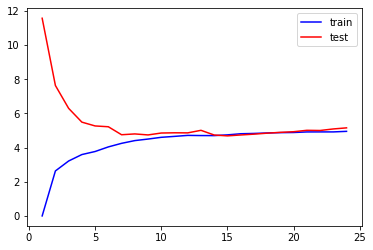

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
neighbors = range(1, 25,1)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(mean_squared_error(knn.predict(X_train), y_train))
    errors_test.append(mean_squared_error(knn.predict(X_test), y_test))
    pass
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

Диапозон с 7 и до 15 выглядит приемлемым

Подыщим подходящие параметры

In [108]:
from sklearn.model_selection import GridSearchCV
knn_gr = KNeighborsRegressor()
param_gridsearch = {'n_neighbors': np.arange(1,15),
                    'weights':['uniform','distance'],
                    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'metric':['canberra', 'chebyshev','hamming', 'jaccard','minkowski','manhattan'],
                    'leaf_size':list(range(10,50,10))
                   }
knn_gridsearch = GridSearchCV(knn_gr,param_gridsearch,scoring = 'neg_root_mean_squared_error')
knn_gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['canberra', 'chebyshev', 'hamming',
                                    'jaccard', 'minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [109]:
print("Best parameters: " + str(knn_gridsearch.best_params_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}


In [110]:
print("Best score: "+ str(-1*knn_gridsearch.best_score_))

Best score: 2.333534716869495


У лучшего скора rmse все-таки поменьше, чем у регрессии, хоть и ненамного

In [111]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsRegressor(algorithm= 'auto', metric= 'minkowski',leaf_size= 20, n_neighbors= 14, weights= 'uniform')
knn.fit(X_train, y_train)
calc_metrics(y_test, knn.predict(X_test))

MSE:   4.805924311472162
RMSE:  2.1922418460270667
R2:    0.6732317979865688
MAE: 1.460471567267684


В целом результаты на выборке с G1 получились получше

In [112]:
from sklearn.model_selection import GridSearchCV
knn_gr = KNeighborsRegressor()
param_gridsearch = {'n_neighbors': np.arange(1,15),
                    'weights':['uniform','distance'],
                    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'metric':['canberra', 'chebyshev','hamming', 'jaccard','minkowski','manhattan'],
                    'leaf_size':list(range(10,50,10))
                   }
knn_gridsearch = GridSearchCV(knn_gr,param_gridsearch,scoring='neg_mean_squared_error')
knn_gridsearch.fit(X_tr,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['canberra', 'chebyshev', 'hamming',
                                    'jaccard', 'minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [113]:
print("Best parameters: " + str(knn_gridsearch.best_params_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'canberra', 'n_neighbors': 14, 'weights': 'uniform'}


In [114]:
print("Best score: "+ str(-1*knn_gridsearch.best_score_))

Best score: 12.174004479840717


In [115]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsRegressor(algorithm= 'auto', metric= 'canberra',leaf_size= 10, n_neighbors= 14, weights= 'uniform')
knn.fit(X_tr, y_train)
calc_metrics(y_test, knn.predict(X_te))

MSE:   11.2731573211809
RMSE:  3.3575522812282315
R2:    0.23350658268514668
MAE: 2.4850901525658804


А вот для выборки без G1 результаты немного ухудшились

Decision Tree

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeRegressor()
param = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter':['best', 'random'],
         'max_depth': list(range(2,15)), 
         'min_samples_split': range(2, 11, 2)}
dt_cv = RandomizedSearchCV(dt, param,scoring='neg_mean_squared_error',n_iter=250)
dt_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=250,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_split': range(2, 11, 2),
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [117]:
dt_cv.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_split=4,
                      splitter='random')

In [118]:
-1*dt_cv.best_score_

5.632317073170732

In [239]:
from sklearn.metrics import roc_auc_score
dt = DecisionTreeRegressor(criterion='mae', max_depth=4, splitter='random')
dt.fit(X_train, y_train)
calc_metrics(y_test, dt.predict(X_test))

MSE:   5.621359223300971
RMSE:  2.3709405777667585
R2:    0.6177881033446824
MAE: 1.4854368932038835


Показатели хуже, чем у KNN

Проверим выборку без G1

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter':['best', 'random'],
         'max_depth': list(range(2,15)), 
         'min_samples_split': range(2, 11, 2)}
dt_cv = RandomizedSearchCV(dt, param,scoring='neg_mean_squared_error',n_iter=250)
dt_cv.fit(X_tr, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=250,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_split': range(2, 11, 2),
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [121]:
dt_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      min_samples_split=10, splitter='random')

In [122]:
-1*dt_cv.best_score_

12.620595862096504

In [240]:
from sklearn.metrics import roc_auc_score
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_split=10,splitter='random')
dt.fit(X_tr, y_train)
calc_metrics(y_test, dt.predict(X_te))

MSE:   10.66486712780529
RMSE:  3.2657108150914542
R2:    0.2748659300051346
MAE: 2.4865108175974213


Тут тоже чуть хуже 

Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state= 17, n_jobs=-1)

parameters = {'n_estimators': range(5, 18), 
              'max_depth': list(range(2,12)),
              'criterion': ['mse', 'mae'],
             }
rf_cv = RandomizedSearchCV(rf, parameters,scoring='neg_mean_squared_error',n_iter=250)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
                   n_iter=250,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'n_estimators': range(5, 18)},
                   scoring='neg_mean_squared_error')

In [125]:
rf_cv.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=12, n_jobs=-1, random_state=17)

In [126]:
-1*rf_cv.best_score_

5.107179606138909

In [127]:
rf = RandomForestRegressor(max_depth=5, n_estimators=12, n_jobs=-1, random_state=17)
rf.fit(X_train, y_train)
calc_metrics(y_test, rf.predict(X_test))

MSE:   4.836318877026778
RMSE:  2.1991632220066744
R2:    0.6711651866765338
MAE: 1.5189783056679962


На данный момент рандомный лес показывает лучшие значения, так как все показатели немножко улучшились

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state= 17, n_jobs=-1)

parameters = {'n_estimators': range(5, 18), 
              'max_depth': list(range(2,12)),
              'criterion': ['mse', 'mae'],
             }

# Run the grid search
rf_cv = RandomizedSearchCV(rf, parameters,scoring='neg_mean_squared_error')
rf_cv.fit(X_tr, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'n_estimators': range(5, 18)},
                   scoring='neg_mean_squared_error')

In [129]:
rf_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=6, n_estimators=14, n_jobs=-1,
                      random_state=17)

In [130]:
-1*rf_cv.best_score_

12.091335863613738

In [241]:
rf = RandomForestRegressor(criterion='mae',max_depth=6, n_estimators=14, n_jobs=-1, random_state=17)
rf.fit(X_tr, y_train)
calc_metrics(y_test, rf.predict(X_te))

MSE:   9.475622894788984
RMSE:  3.0782499727587074
R2:    0.3557259632873776
MAE: 2.2692441054091543


На второй выборке так же показывает лучшие показатели

Таким образом, random forest является лучшей моделью регресси для данного датасета, однако линейная регрессия, дерево решений и knn так же показывают хорошие значения,всего на несколько десятых меньшие, чем у леса.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


Преобразуем G3 в 0 и 1

In [132]:
data_res

,Subject,school,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,higher,internet,romantic,G1,G2,G3,allalc
0,1,1,16,1,3,4,2,1,1,0,0,1,1,0,15,13,14,5.0
1,1,1,17,1,3,2,1,1,2,0,0,1,1,0,17,18,17,4.0
2,1,1,16,1,1,2,5,2,1,2,0,1,1,0,9,8,10,8.0
3,1,0,17,1,2,3,1,2,2,0,0,1,1,0,14,15,16,2.0
4,1,1,16,1,1,1,3,2,1,0,0,1,0,1,12,13,13,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,15,0,3,3,2,2,3,2,0,1,1,1,10,10,10,5.0
1040,1,1,15,0,2,1,5,1,2,0,0,1,1,1,10,9,10,2.0
1041,1,0,16,0,1,1,3,3,2,0,0,1,0,0,16,17,18,2.0
1042,1,1,16,1,2,1,3,4,1,0,0,1,0,0,9,9,11,2.0


In [133]:
data_res = data_res.drop('G1',axis=1)
data_res = data_res.drop('G2',axis=1)

In [134]:
data_res["G3"]=data_res['G3'].apply(lambda x:1 if x>=8 else 0)

In [242]:
X=data_res.drop('G3',axis=1)

In [243]:
y = data_res['G3']

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify = y) 

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
d_tree = DecisionTreeClassifier(max_depth=5)
skf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_scores = cross_val_score(d_tree, X_train, y_train, cv=skf,scoring="f1")
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.91694352 0.94230769 0.92156863 0.95238095 0.94267516]
cv_scores mean:0.9351751905939956


модель дерева решений показывает неплохой результат на 5-fold валидации

In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
skf = KFold(n_splits=5, shuffle=True, random_state=5)
dtree_model = DecisionTreeClassifier(max_depth=5)
dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)
y_pred_proba = dtree_model.predict_proba(X_test)

In [140]:
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy:  0.8564593301435407
Recall:  0.9417989417989417
Precision:  0.9035532994923858
F1:  0.9222797927461139
ROC AUC:  0.7387566137566138


в приницпе, результаты неплохие, но проваливается roc auc

In [141]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 


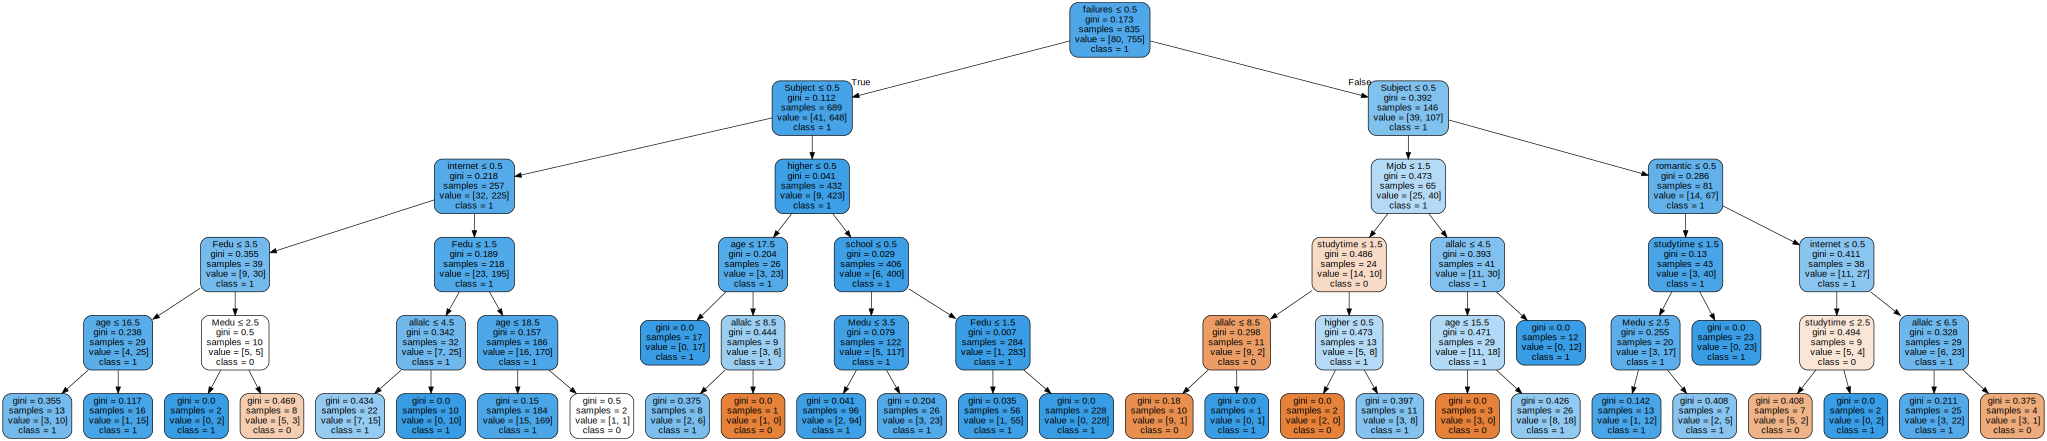

In [142]:
display(graph)

Давайте теперь сформулируем правила, по которым принимаются решения в данном дереве:
- Сначала количество неудач по предметам сравнивается с 0.5, если меньше -> дерево идет в левую сорону, где всего 3 листа в дальнейшем принмают значение класса 0, если больше, то вправо.
- Рассмотрев поподробнее левую сторону увидим, что 0 класс получили ученики математического класса собирающиеся получать высшее образование, старше 17.5 лет и занимающиеся учебой больше 3.5 часов,что кажется не очень логичным. Ученики португальсого по этой ветке получали неуд если у отца было высшее образование, и при этом сами студенты были либо многопьющими, либо старше 18.5. Этот вывод выглядит так же не очень логичным
Перейдем к правой ветке, где у студентов больше 0.5 неудач:
- Сначала, как и в правой ветке происходит группировка по предмету, ключевые же решения происходят в вопросах об алкоголе, возрасте и времени проведенном за учебой. Чем больше студент пьет- тем больше шанс получить неуд. Чем меньше возраст и чем меньше времени проведено за учебой - тем больше шансов на неуд.
Тут уже все выглядит логичным

Теперь давайте сравним деревья разных фолдов

0.86 accuracy with a standard deviation of 0.02


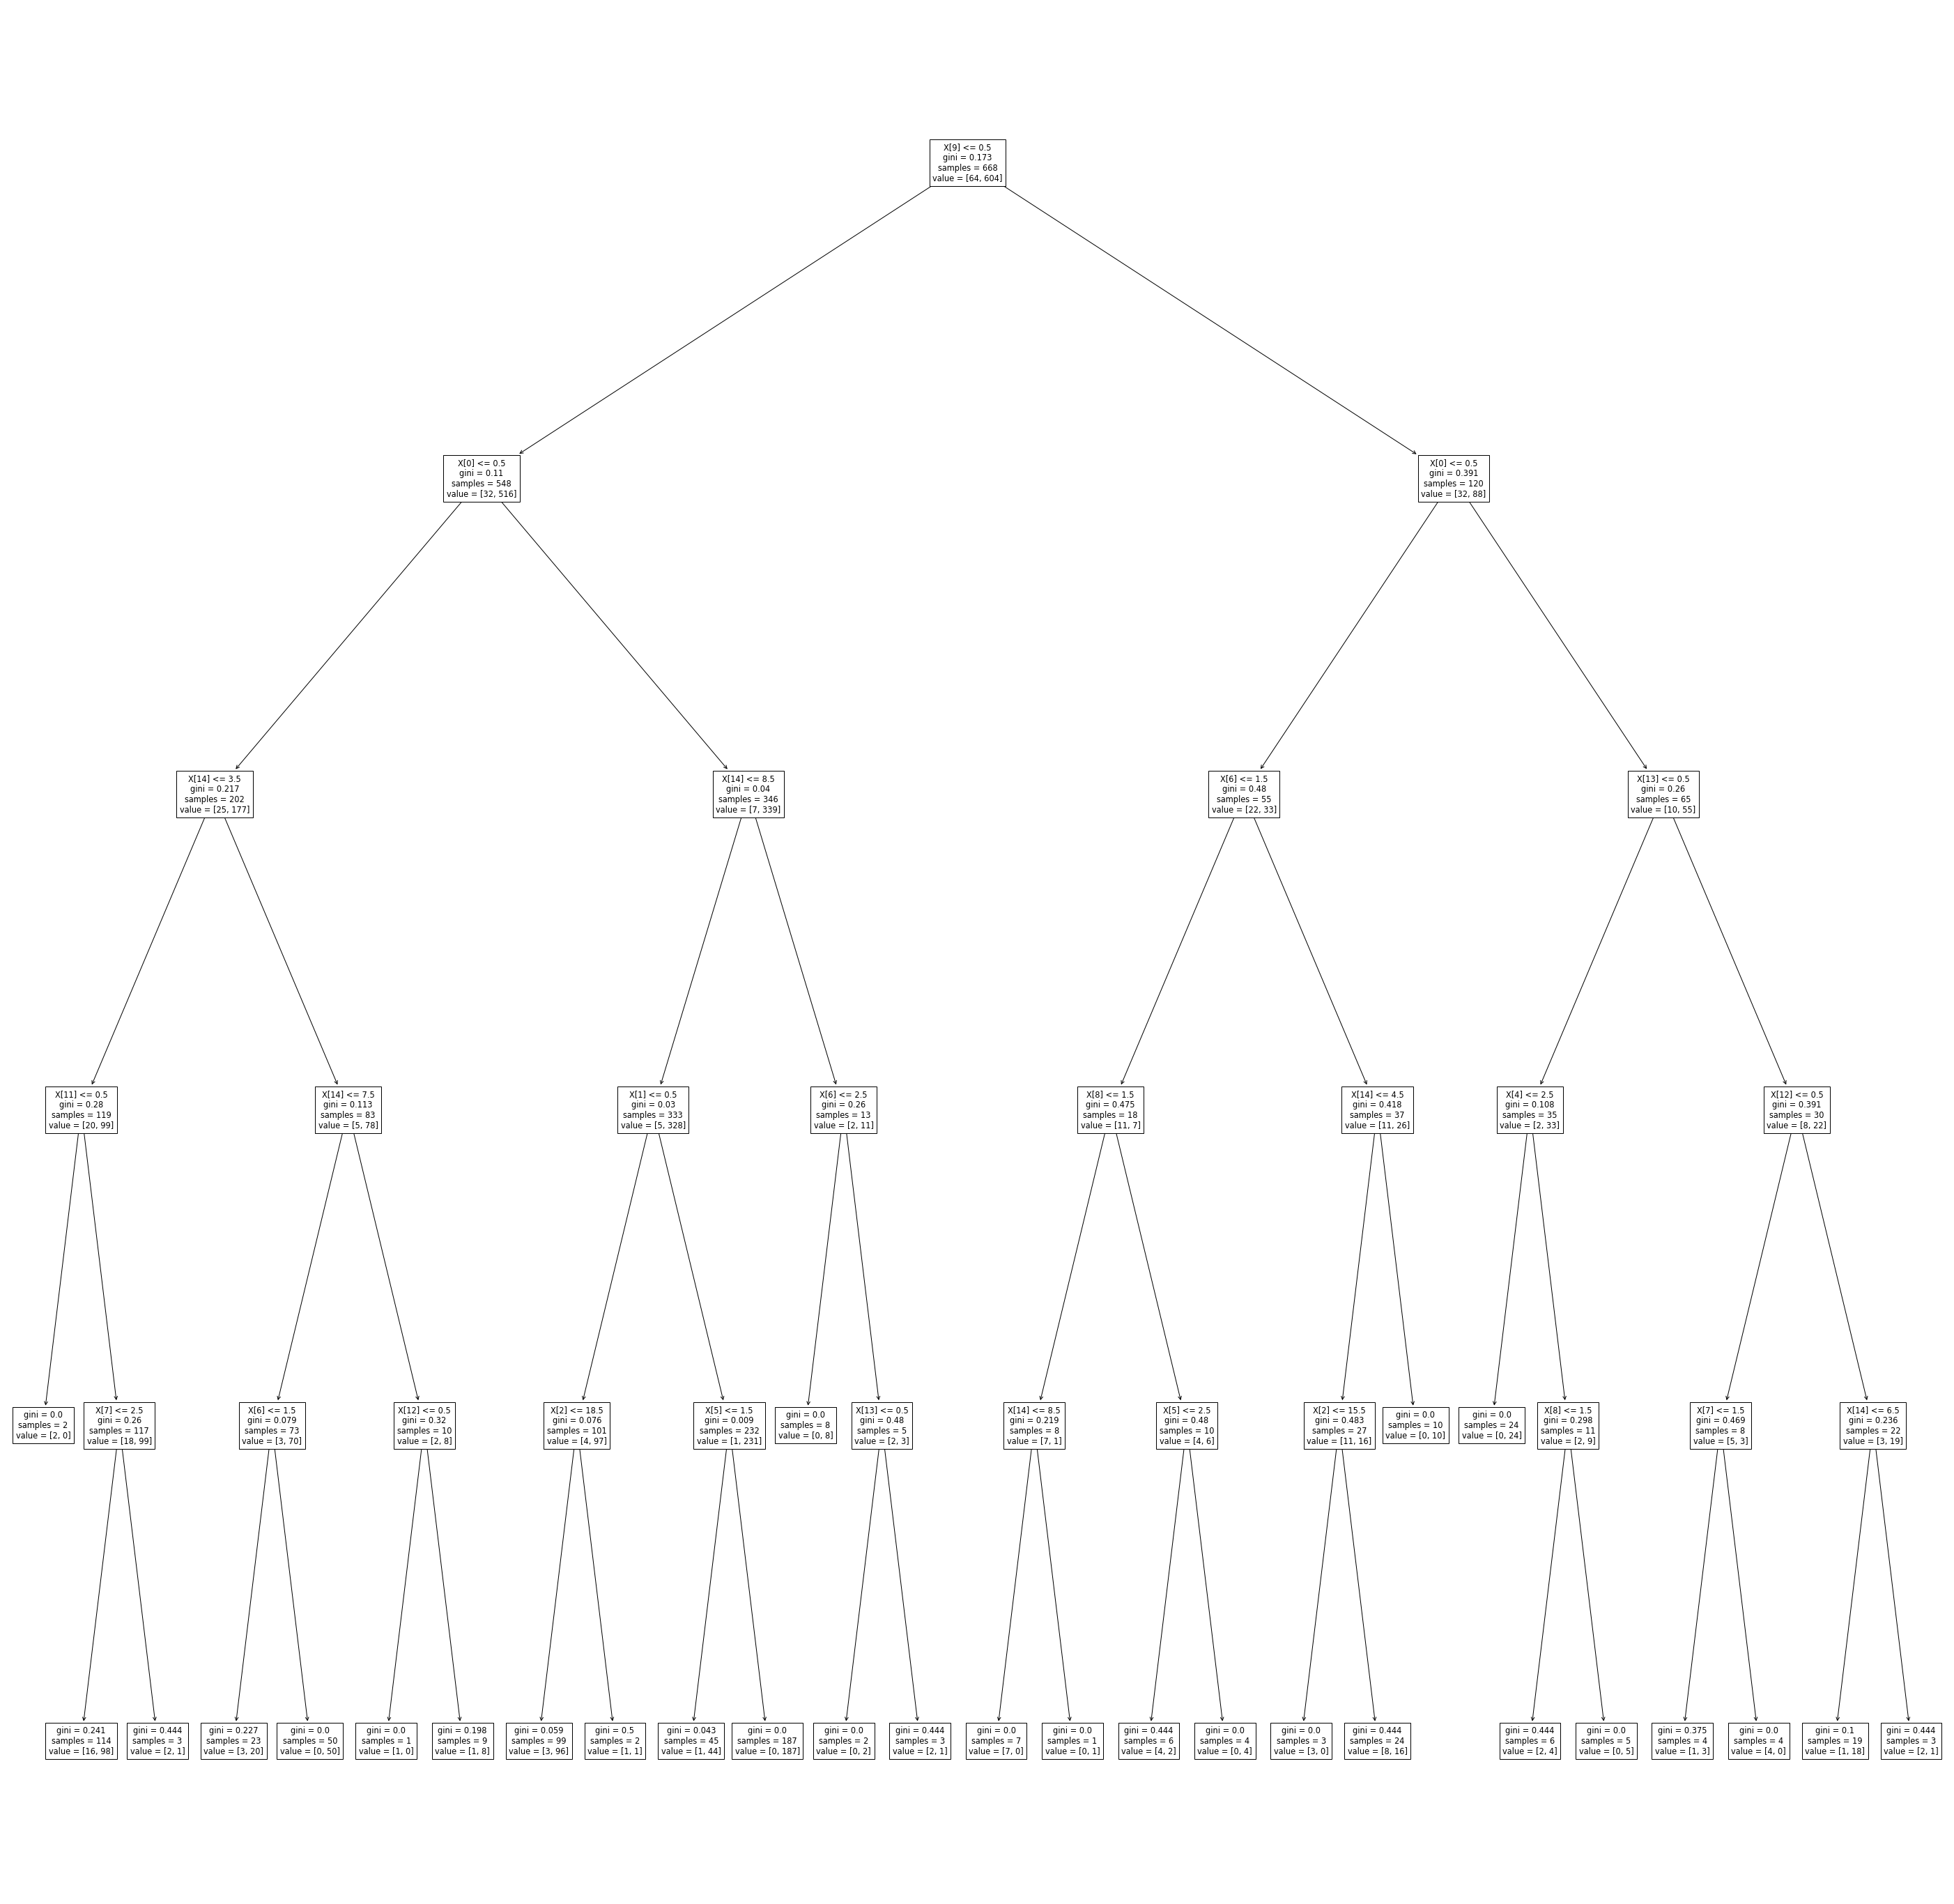

0.85 accuracy with a standard deviation of 0.04


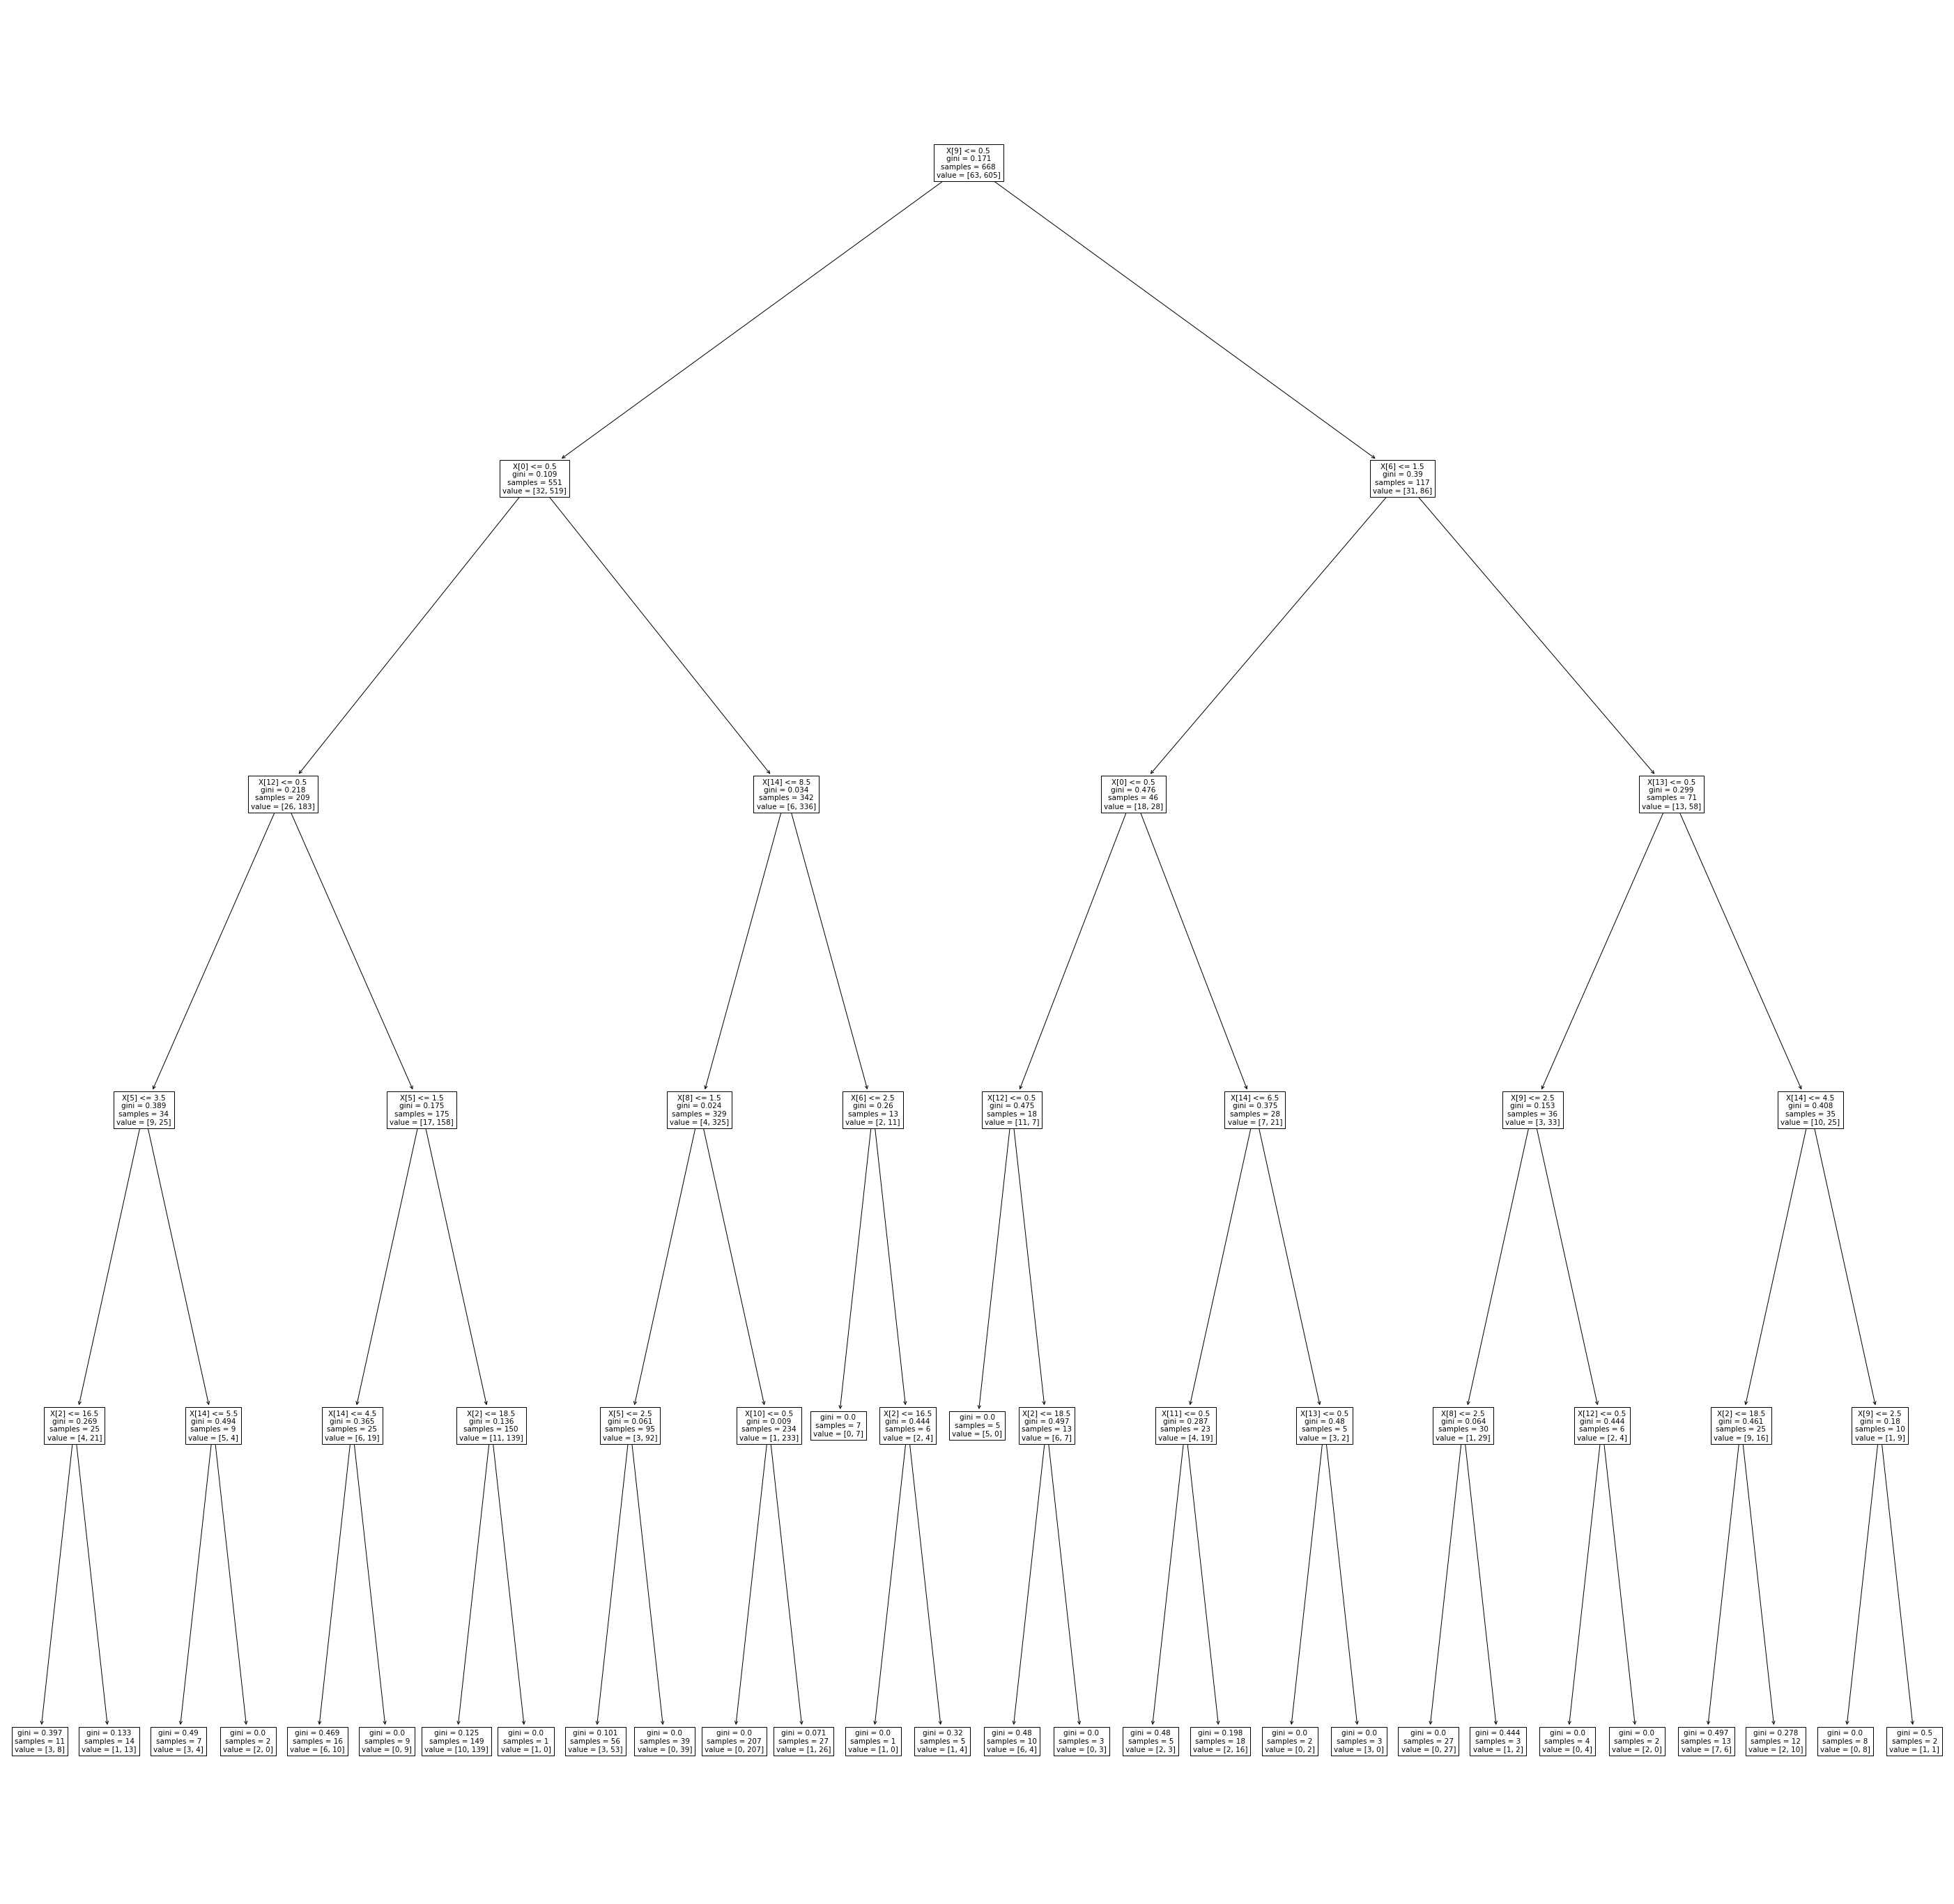

0.88 accuracy with a standard deviation of 0.04


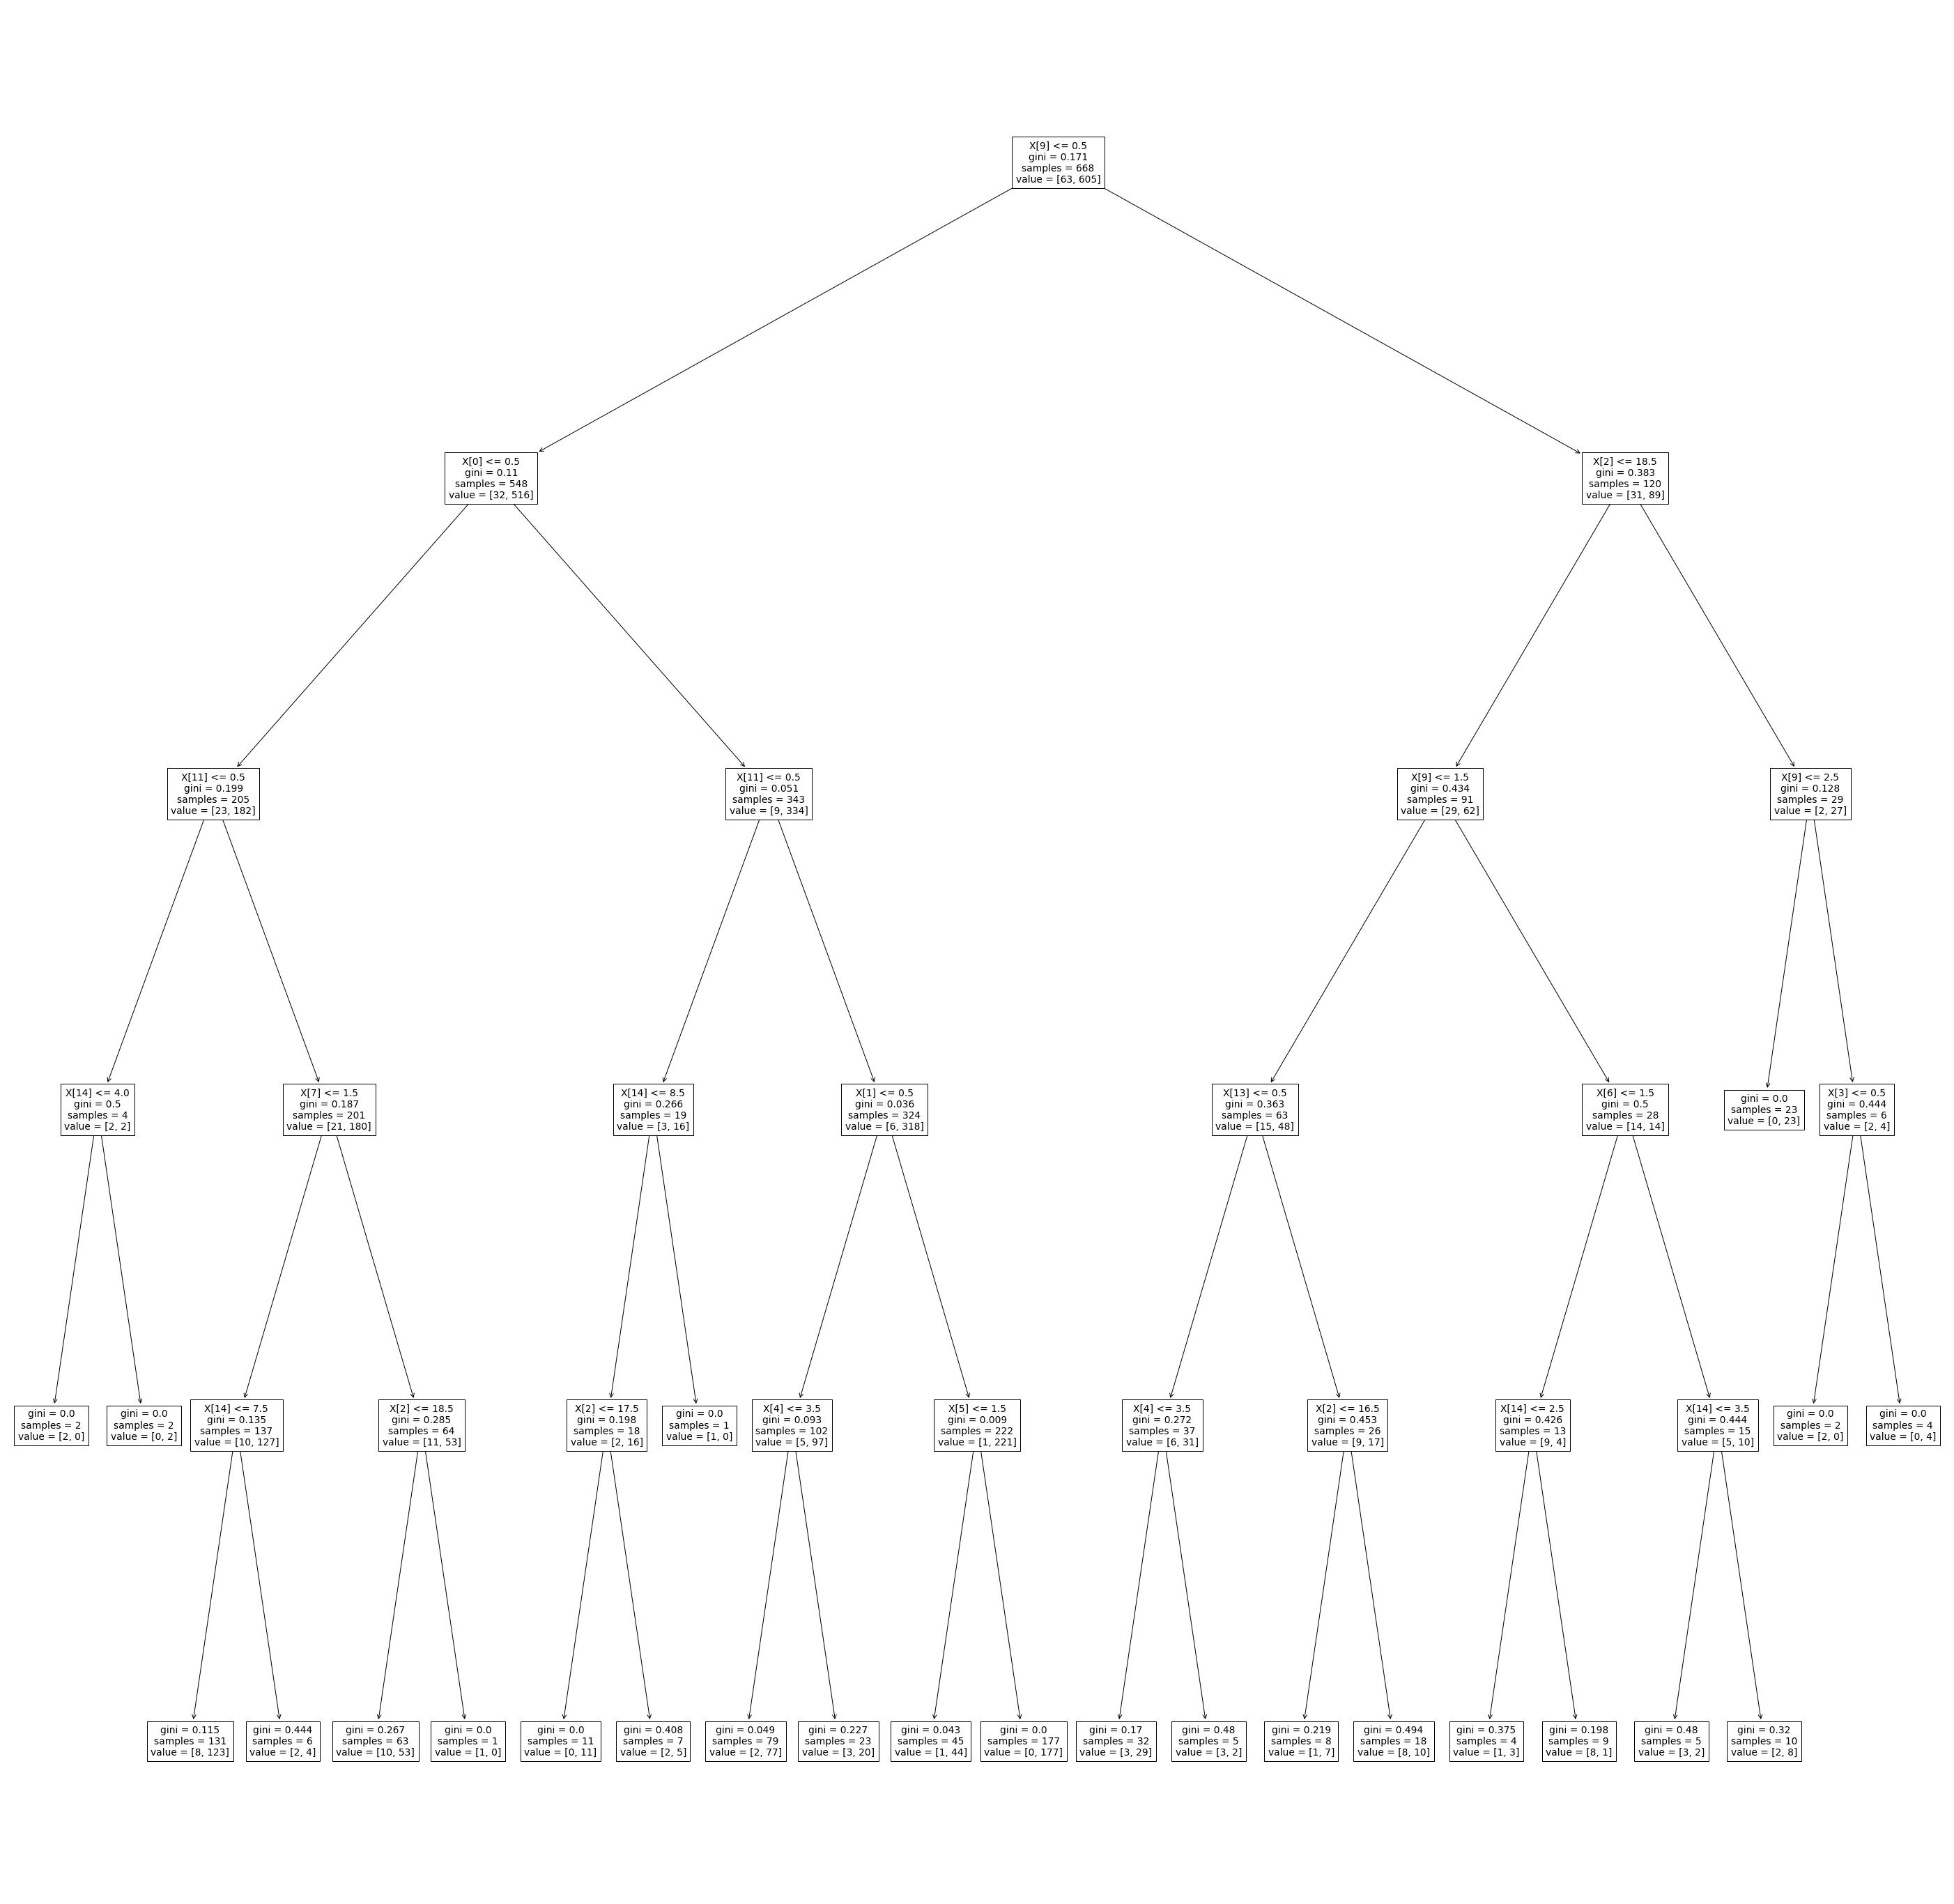

0.87 accuracy with a standard deviation of 0.02


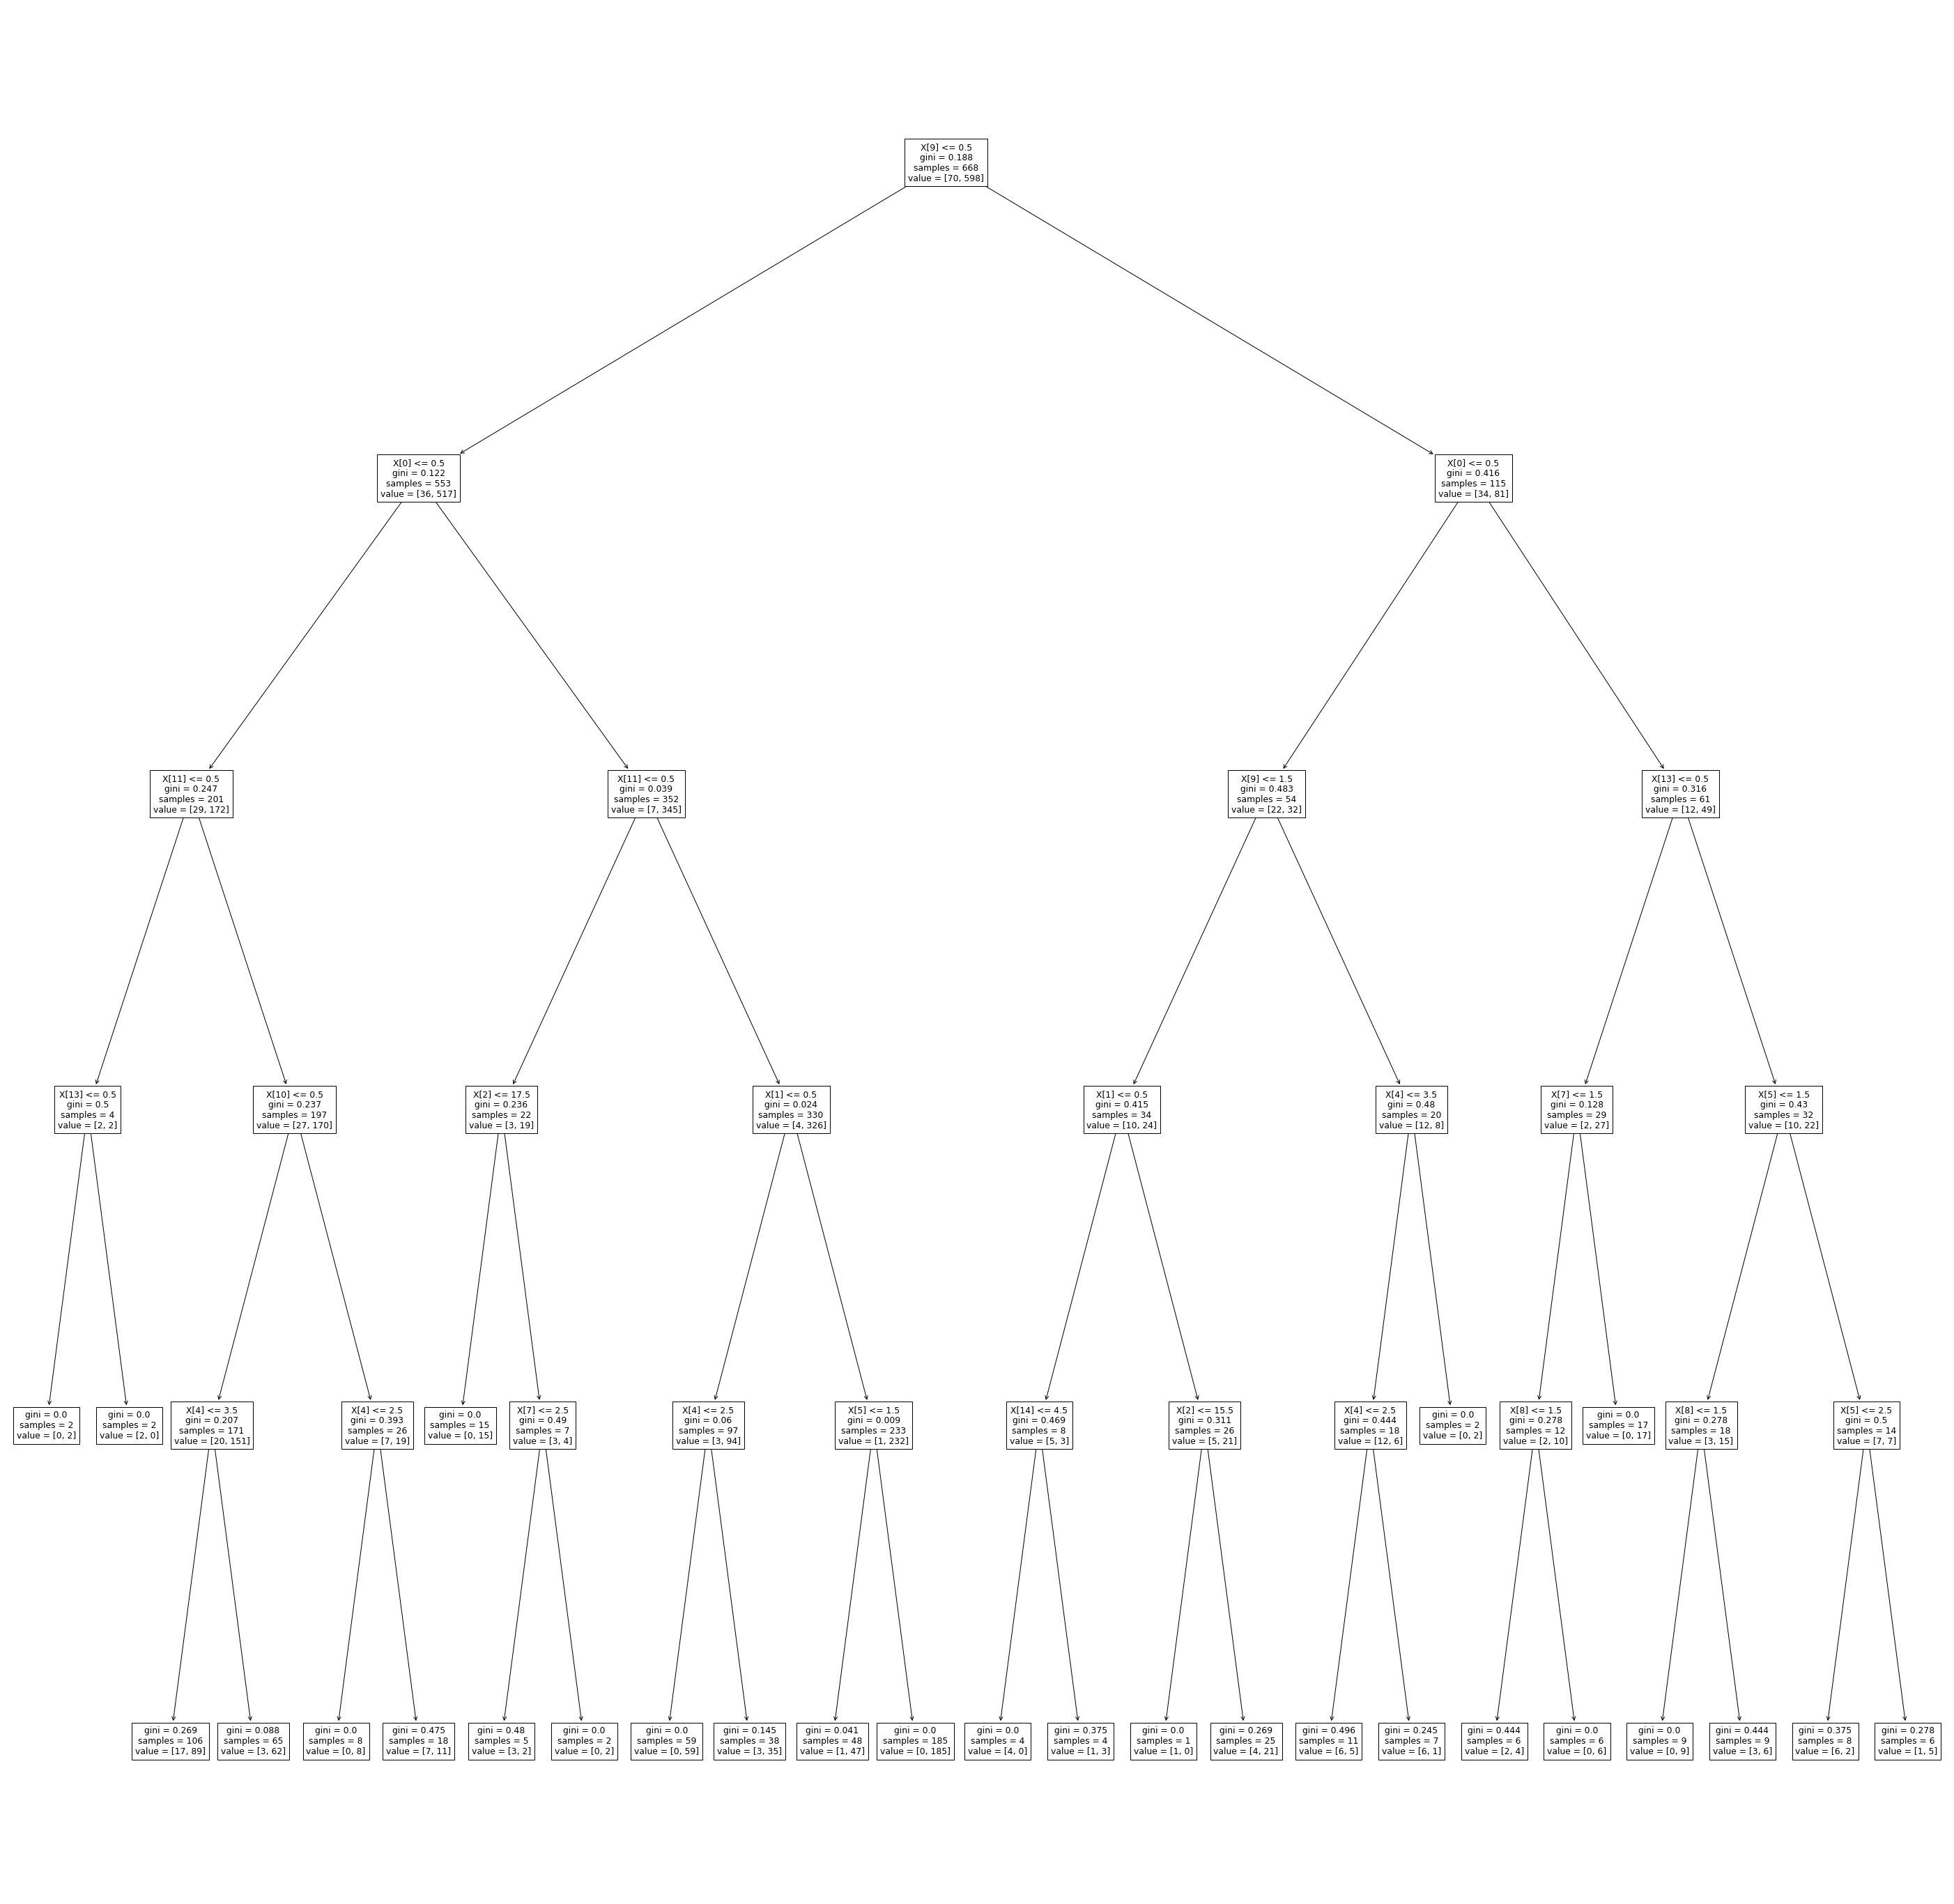

0.88 accuracy with a standard deviation of 0.02


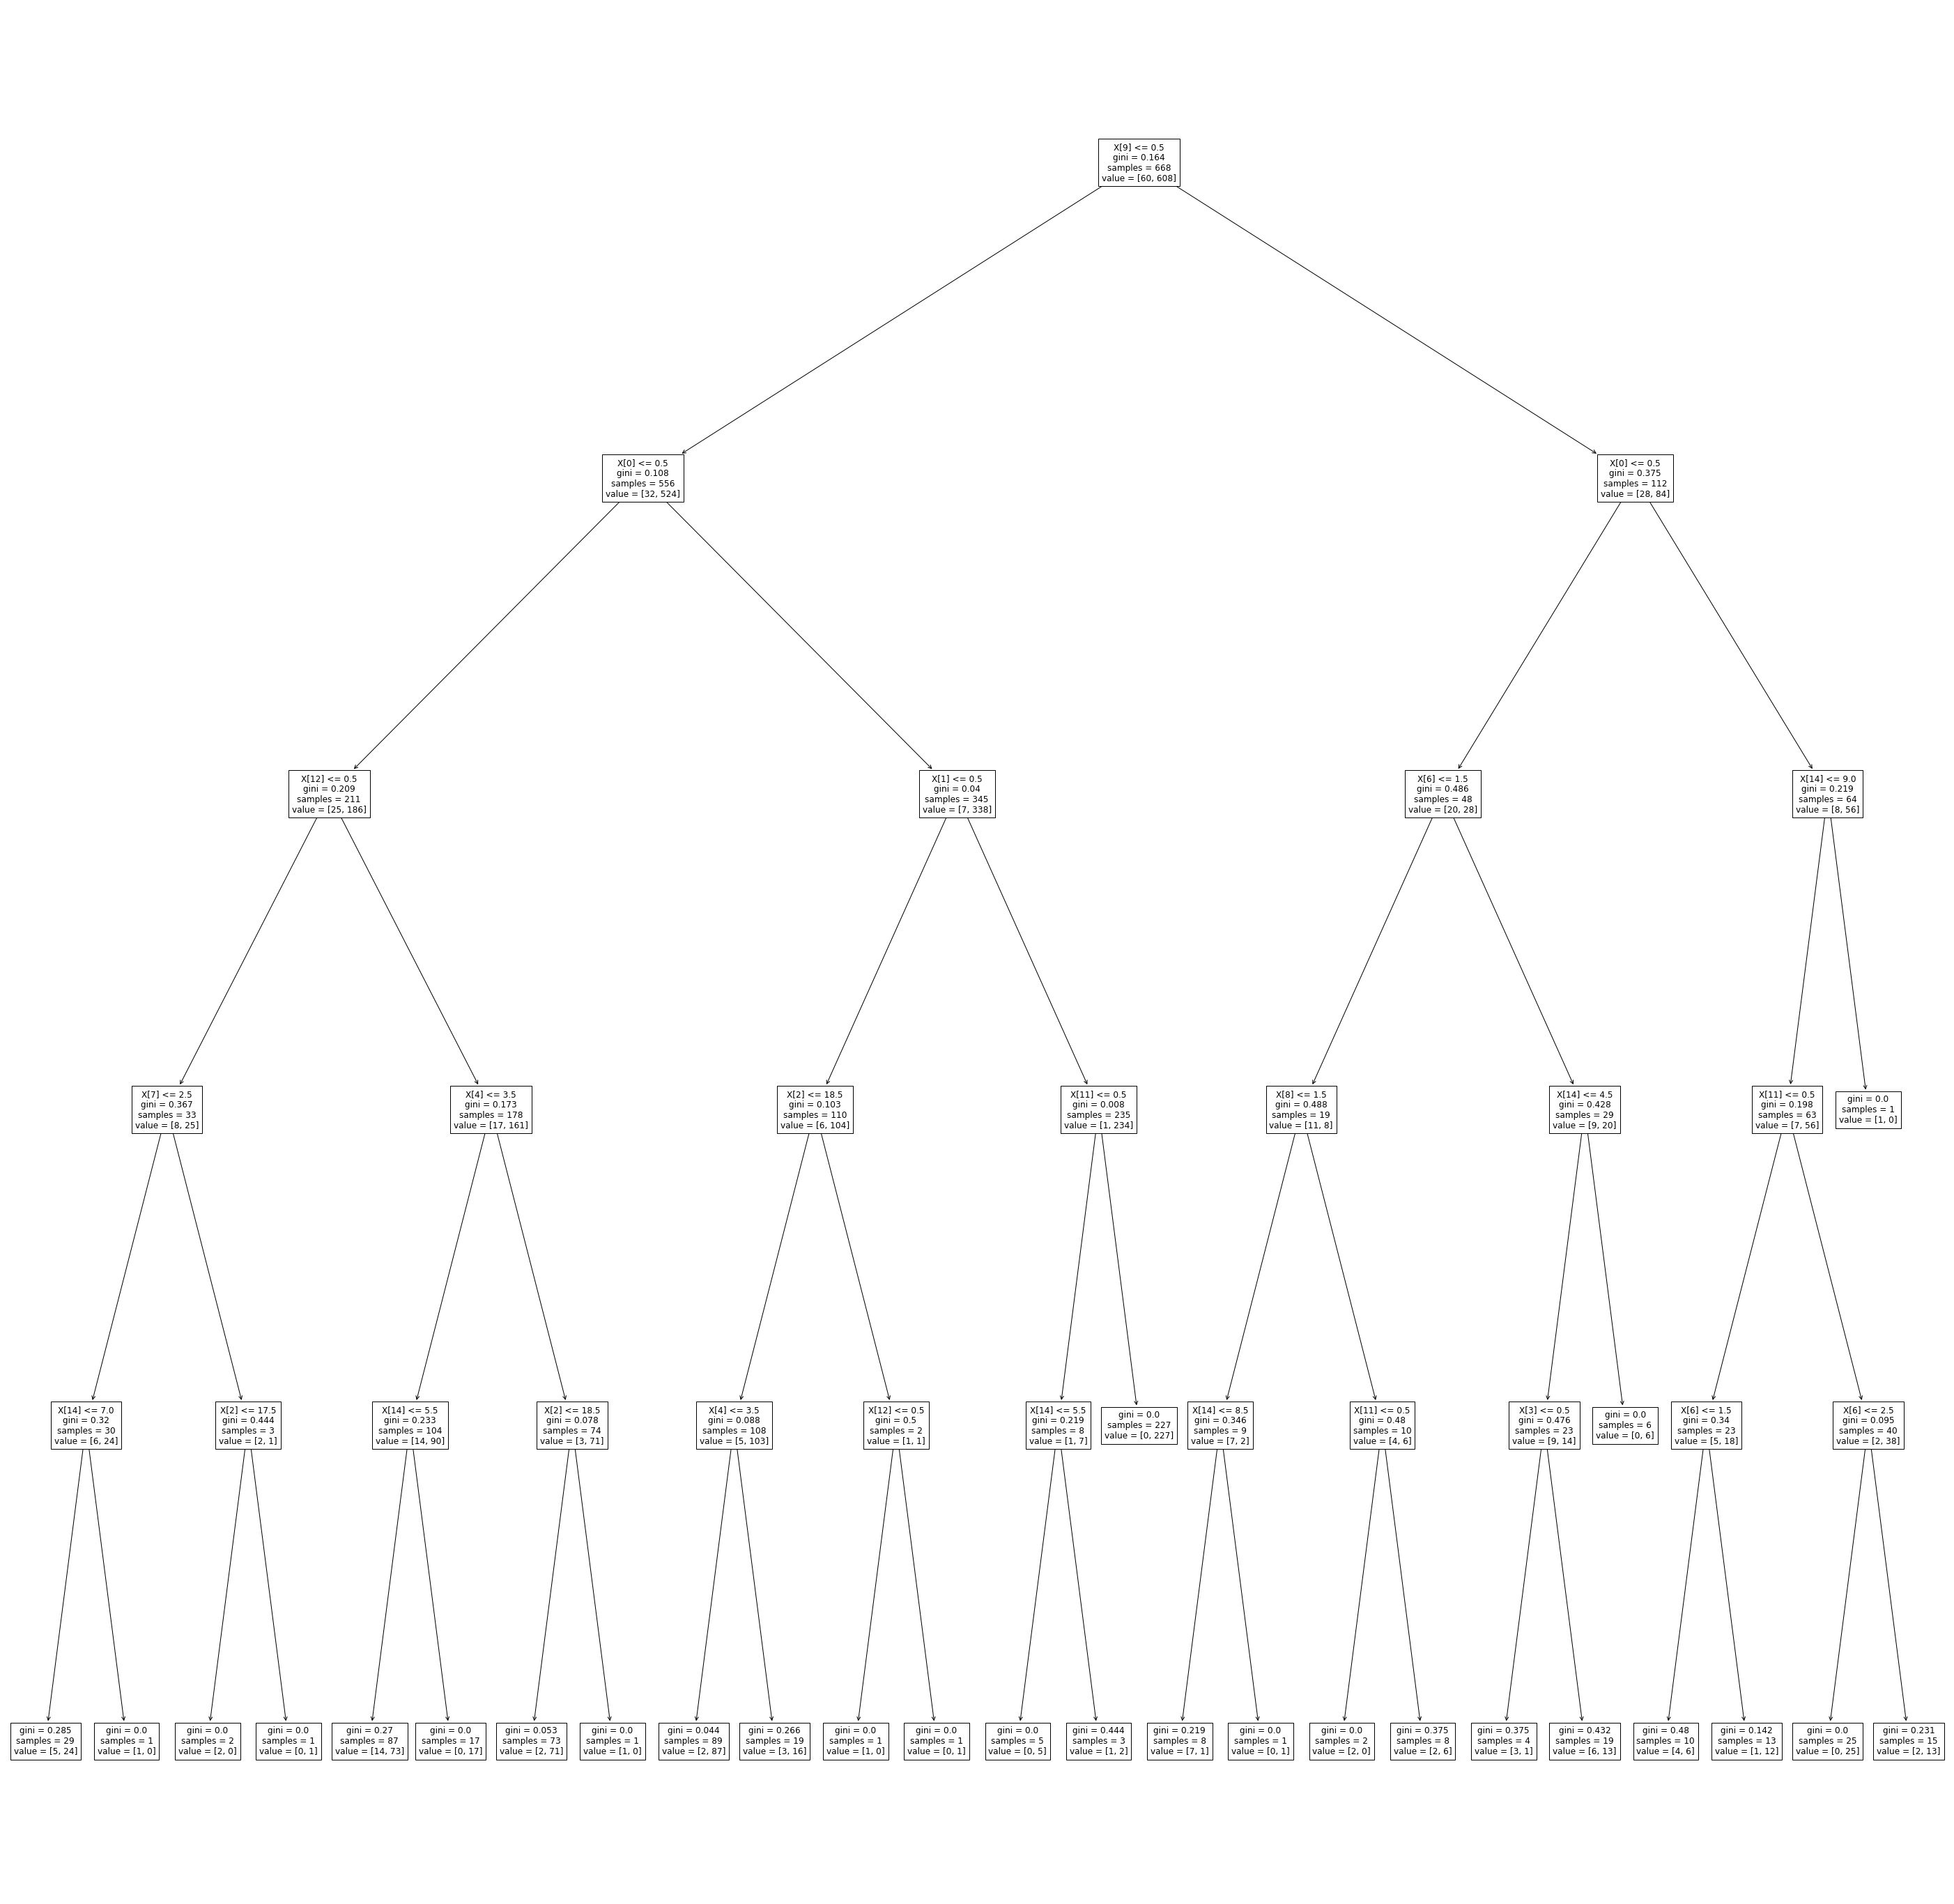

In [143]:
from sklearn import metrics
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
dt = DecisionTreeClassifier(max_depth=5)
for train_index,y_index  in kf.split(X_train):
    plt.figure(figsize=(50, 50))
    train_x = X_train.iloc[train_index]
    train_y = y_train.iloc[train_index]
    scores = cross_val_score(estimator=dt, X=train_x, y=train_y,cv=kf)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    model = dt.fit(train_x,train_y)
    tree.plot_tree(model)
    plt.show()

Тут не очень хорошо видно, но можно заметить различия в построении дерева:
- Слева, где ученики получали меньше неудач, и у родителя нет высшего образования(самый левый лист),на некоторых деревьях происходит разделение на возраст, а где-то нет.
- В правой ветке так же есть различия, после разделения на предметы и романтические отношения, некоторые ветки укорачиваются навопросе обалкоголе и studytime.
- В целом, таких мелких различий достаточно много
- Таким образом, все деревья похожи узлами с принятиями решений, но почти все отличаются друг от друга тем или иным листом, некотрые ветки могут оказатья короче, чем у другого дерева

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [144]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
dt = DecisionTreeClassifier()
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: [],
          200: [],
         300: [],
         400: [],
         500: [],
         'tree':[]}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

for x in scores:
    if x!='tree':
        rf_model = RandomForestClassifier(n_estimators=x)
        scores[x] = cross_val_score(rf_model, X_train, y_train, cv=rskf, scoring='f1')
scores['tree']=cross_val_score(dt, X_train, y_train, cv=rskf, scoring='f1')
scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' es' for x in scores.columns]

In [145]:
scores.describe()

,1 es,2 es,5 es,10 es,50 es,100 es,200 es,300 es,400 es,500 es,tree es
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.906181,0.874314,0.941428,0.940979,0.947500,0.946223,0.946446,0.948164,0.948260,0.949188,0.903531
std,0.011360,0.015928,0.007362,0.005980,0.003736,0.004144,0.005919,0.002260,0.002317,0.003592,0.011920
min,0.885135,0.844765,0.929032,0.932907,0.943038,0.939297,0.932907,0.946032,0.946032,0.942675,0.881944
25%,0.899152,0.867185,0.935897,0.936650,0.946032,0.943872,0.943599,0.946372,0.946372,0.947201,0.898592
50%,0.906412,0.877999,0.944188,0.941179,0.946372,0.947870,0.947708,0.947708,0.948029,0.949686,0.905723
75%,0.914893,0.886037,0.947960,0.945448,0.949367,0.949367,0.949606,0.949606,0.949686,0.949686,0.909393
max,0.920530,0.894198,0.949045,0.949045,0.955696,0.949686,0.952681,0.952681,0.952681,0.955696,0.923588


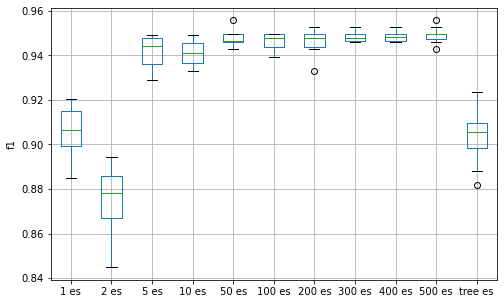

In [146]:
scores.boxplot(figsize=(8,5))
plt.ylabel('f1')
plt.show()

Как можно увидеть по 2 графикам(выше и ниже), 1 дерево ведет себя менее стабильно, чем стальные рассмотренные модели.
С 5-10 деревьев средний скор по f1 становится достаточно высоким, но самые лучшие и стабильные результаты показываются на 200 и 400 деревьях, поэтому, в данной ситуации подойдет одно из этих решений.

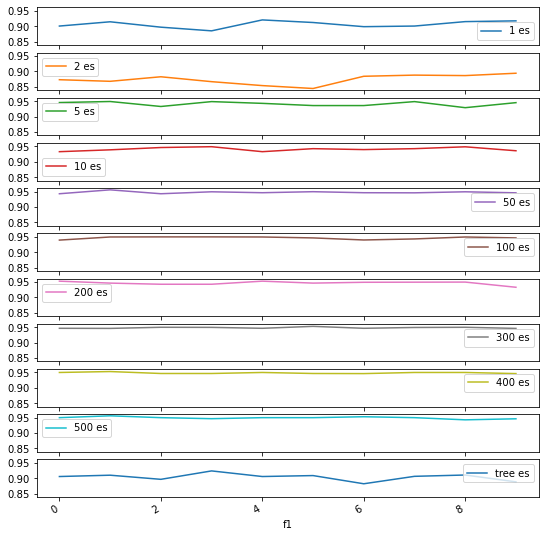

In [147]:
scores.plot(subplots=True, sharey=True, figsize=(9, 10))
plt.xlabel('iteration')
plt.xlabel('f1')
plt.show()

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

Настроим параметры на кросс валидации

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
skf = KFold(n_splits=5, shuffle=False, random_state=5)
start_time = time.time()
rf = RandomForestClassifier(random_state= 42, n_jobs=-1)

parameters = {'n_estimators': [50,100,150,200,300,500], 
              'max_features': np.linspace(0.2,1.2),
              'max_depth': list(range(2,12)),
              'criterion': ['entropy', 'gini']
             }

# Run the grid search
rf_cv = RandomizedSearchCV(rf, parameters,n_jobs=-1,cv=skf,scoring='f1',n_iter=250)
rf_cv.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 218.84430265426636 seconds ---


Grid search считал слишком долго,поэтому я не дождался и заменил его на Randomized search

In [149]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3,
                       max_features=0.8530612244897959, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [150]:
rf_cv.best_score_

0.9513765274842415

In [151]:
y_pred = rf_cv.best_estimator_.predict(X_test)
print(f1_score(y_test,y_pred))

0.949748743718593


качество является довольно неплохим

Теперь сравним качество отдельных деревьев на отложенной выборке

In [152]:
rf = RandomForestClassifier(max_depth=3, max_features=0.9755102040816326, n_estimators=500,
                       n_jobs=-1, random_state=42)
kf = KFold(n_splits=5)
rf.fit(X_train,y_train)
scores={1: [],
          2: [],
          3: [],
          4: [],
          5: [],
          6: [],
          7: [],
         8: [],
         9: [],
         10: [],
         11:[],
       'forest':[]}
i=1
for x in rf.estimators_:
    scores[i]=cross_val_score(x, X_test, y_test, cv=kf, scoring='f1')
    i=i+1
scores['forest']=cross_val_score(rf, X_test, y_test, cv=kf, scoring='f1')  
scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' es' for x in scores.columns]

In [153]:
sc=[]
for i in scores.mean().to_list():
    sc.append(i)


In [154]:
scores.describe()

,1 es,2 es,3 es,4 es,5 es,6 es,7 es,8 es,9 es,10 es,11 es,forest es,12 es,13 es,14 es,15 es,16 es,17 es,18 es,19 es,...,481 es,482 es,483 es,484 es,485 es,486 es,487 es,488 es,489 es,490 es,491 es,492 es,493 es,494 es,495 es,496 es,497 es,498 es,499 es,500 es
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.938457,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,0.941563,0.933385,0.932924,0.930122,0.930122,0.930122,0.930122,0.930122,0.930122,...,0.930122,0.930122,0.930122,0.932220,0.930122,0.923885,0.930122,0.935655,0.930122,0.935655,0.930122,0.930122,0.930122,0.938504,0.932924,0.930122,0.930122,0.932783,0.930122,0.930122
std,0.010743,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,0.015302,0.021867,0.011250,0.012281,0.012281,0.012281,0.012281,0.012281,0.012281,...,0.012281,0.012281,0.012281,0.023447,0.012281,0.021335,0.012281,0.013359,0.012281,0.013359,0.012281,0.012281,0.012281,0.017666,0.011250,0.012281,0.012281,0.017606,0.012281,0.012281
min,0.923077,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.923077,0.909091,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,...,0.921053,0.921053,0.921053,0.891892,0.921053,0.891892,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053
25%,0.935065,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,0.935065,0.923077,0.923077,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053,...,0.921053,0.921053,0.921053,0.935065,0.921053,0.921053,0.921053,0.923077,0.921053,0.923077,0.921053,0.921053,0.921053,0.923077,0.923077,0.921053,0.921053,0.921053,0.921053,0.921053
50%,0.936709,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.936709,0.923077,0.935065,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,...,0.923077,0.923077,0.923077,0.936709,0.923077,0.921053,0.923077,0.936709,0.923077,0.936709,0.923077,0.923077,0.923077,0.936709,0.935065,0.923077,0.923077,0.923077,0.923077,0.923077
75%,0.948718,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.950000,0.948718,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709,...,0.936709,0.936709,0.936709,0.948718,0.936709,0.936709,0.936709,0.948718,0.936709,0.948718,0.936709,0.936709,0.936709,0.948718,0.936709,0.936709,0.936709,0.936709,0.936709,0.936709
max,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.962963,0.962963,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,...,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.948718,0.962963,0.948718,0.948718,0.948718,0.962025,0.948718,0.948718


In [155]:
y_1=[]

In [156]:
cnt=1
for i in range(len(sc)):
    sc[i] = cnt
    cnt=cnt+1

In [157]:
x_1=[]
for i in scores.mean().to_list():
    x_1.append(i)

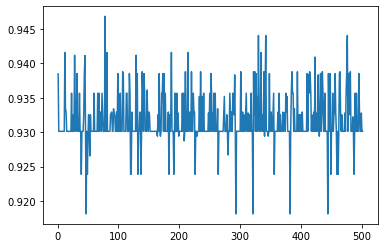

In [158]:
y_1 = sc
plt.plot(y_1,x_1)
plt.show()

из отдельных дереьев в ансамбле до random forest никто не дотянул по f1, там был 0.949, здесь поменьше, однако мы видим, что значения иногда падали ниже 0.92, в среднем они держались у 0.94. 

Рассмотрим важность признаков для random forest

In [159]:
rf.feature_importances_

array([0.20896576, 0.00995192, 0.06891842, 0.01461839, 0.02259458,
       0.0178946 , 0.06695386, 0.03360441, 0.0134988 , 0.36075402,
       0.01115633, 0.04566534, 0.04349578, 0.03469305, 0.04723473])

In [160]:
pd.Series(rf.feature_importances_, 
          index=X_train.columns).sort_values(ascending=False)

failures      0.360754
Subject       0.208966
age           0.068918
Mjob          0.066954
allalc        0.047235
higher        0.045665
internet      0.043496
romantic      0.034693
traveltime    0.033604
Medu          0.022595
Fedu          0.017895
address       0.014618
studytime     0.013499
schoolsup     0.011156
school        0.009952
dtype: float64

Тут, как и в построении обыччных деревьев высокую роль играют failures и Subject.
Неожиданно высоким влиянием на модель отлечился признак Mjob - место работы матери, т.е по мере увеличения services->at home->teacher->health - увеличиваются шансы студента сдать экзамен.

In [161]:
pd.Series(rf.feature_importances_, 
          index=X_train.columns).sum()

1.0

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

Подберем гиперпараметры

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
c_space = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 20,100])
param_grid = {'C': c_space,
              'penalty':['l1', 'l2', 'elasticnet'],
              'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight':['balanced','None'],
              'multi_class':['auto', 'ovr', 'multinomial'],}

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, param_grid, cv=skf,scoring='roc_auc', verbose=True, n_jobs=-1)

lr_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 17548 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 24656 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 31176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 38552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:  2.6min finished


Tuned Logistic Regression Parameters: {'C': 1.0, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
Best score is 0.797226821192053


In [163]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(C= 1.0, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'sag', tol= 0.1)
lr.fit(X_train,y_train)
print(roc_auc_score(y_test,lr.predict_proba(X_test)[:, 1]))

0.8496031746031746


Качество получилось не самым лучшим, но не все так уж и плохо

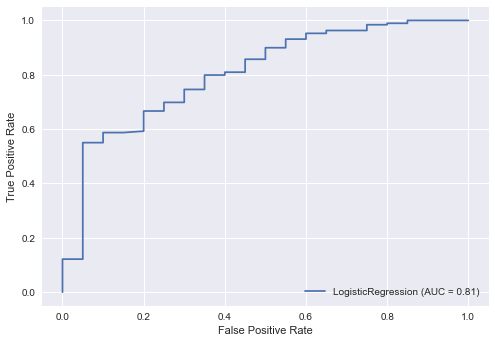

In [164]:
lr = LogisticRegression(C= 1.0, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'sag', tol= 0.1)
lr.fit(X_train,y_train)
style.use('seaborn')
metrics.plot_roc_curve(lr,X_test,y_test)

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
rf = RandomForestClassifier()

parameters = {'n_estimators': range(5, 15), 
              'max_features': np.linspace(0.2,1.2),
              'max_depth': list(range(2,12)),
              'criterion': ['entropy', 'gini'],
              'min_samples_split': list(range(1,15)),
              'min_samples_leaf':list(range(1,15))
             }
rf_cv = RandomizedSearchCV(rf, parameters,verbose=1,n_jobs=-1,cv=skf,scoring='roc_auc')
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'max_features': array([0.2       , 0.22040816, 0.24081633, 0.26122449, 0.28163265,
       0.30204082, 0.32244898, 0.34285714, 0.36326531, 0.38367347,
       0.40...
       0.8122449 , 0.83265306, 0.85306122, 0.87346939, 0.89387755,
       0.91428571, 0.93469388, 0.95510204, 0.9755102 , 0.99591837,
       1.01632653, 1.03673469, 1.05714286, 1.07755102, 1.09795918,
       1.11836735, 1.13877551, 1.15918367, 1.17959184, 1.2       ]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 

In [166]:
print("Tuned RF Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned RF Parameters: {'n_estimators': 11, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.4448979591836735, 'max_depth': 5, 'criterion': 'entropy'}
Best score is 0.7697847682119205


Посмотрим на результаты оценки с параметрами из этого подбора

In [167]:
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(n_estimators= 12, min_samples_split= 6, min_samples_leaf= 11, max_features= 0.8530612244897959, max_depth= 5, criterion= 'gini')
rf.fit(X_train,y_train)
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))

0.8146825396825397


Тут результаты хуже, чем у логистической регресии

Теперь посмотрим на изменения с параметрами из 3 задания

In [168]:
rf = RandomForestClassifier(criterion='entropy', max_depth=3,
                       max_features=0.9755102040816326, n_estimators=500,
                       n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))

0.8108465608465608


Лучше, чем у текущего подбора, но похуже, чем у линейной регрессии

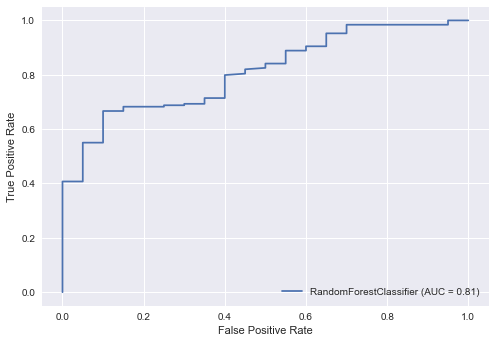

In [169]:
rf.fit(X_train,y_train)
style.use('seaborn')
metrics.plot_roc_curve(rf,X_test,y_test)

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

Я буду рассматривать catboost

In [170]:
from sklearn import metrics
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: [],
          200: [],
         300: [],
         400: [],
         500: []
         }

kf = KFold(n_splits=5)

for x in scores:
    cbc = CatBoostClassifier(random_seed=17, n_estimators=x)
    scores[x] = cross_val_score(cbc, X_train, y_train, cv=kf, scoring='f1')
scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' es' for x in scores.columns]

Learning rate set to 0.5
0:	learn: 0.4729262	total: 226ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4698137	total: 4.65ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4699686	total: 4.86ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4702152	total: 4.68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4637521	total: 3.92ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4729262	total: 3.97ms	remaining: 3.97ms
1:	learn: 0.3718009	total: 7.75ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4698137	total: 2.34ms	remaining: 2.34ms
1:	learn: 0.3717857	total: 4.82ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4699686	total: 2.55ms	remaining: 2.55ms
1:	learn: 0.3656335	total: 4.95ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4702152	total: 1.7ms	remaining: 1.7ms
1:	learn: 0.3764504	total: 3.56ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4637521	total: 1.66ms	remaining: 1.66ms
1:	learn: 0.3652444	total: 3.33ms	remaining: 0us
Lea

13:	learn: 0.3011492	total: 31.4ms	remaining: 80.7ms
14:	learn: 0.2933475	total: 33.7ms	remaining: 78.6ms
15:	learn: 0.2860469	total: 36ms	remaining: 76.5ms
16:	learn: 0.2814838	total: 38.3ms	remaining: 74.4ms
17:	learn: 0.2759592	total: 41ms	remaining: 72.8ms
18:	learn: 0.2704324	total: 43.4ms	remaining: 70.8ms
19:	learn: 0.2666898	total: 45.8ms	remaining: 68.6ms
20:	learn: 0.2616631	total: 48.2ms	remaining: 66.6ms
21:	learn: 0.2591784	total: 50.6ms	remaining: 64.4ms
22:	learn: 0.2546837	total: 52.8ms	remaining: 62ms
23:	learn: 0.2519746	total: 55.1ms	remaining: 59.7ms
24:	learn: 0.2495674	total: 57.7ms	remaining: 57.7ms
25:	learn: 0.2469701	total: 60.3ms	remaining: 55.6ms
26:	learn: 0.2444111	total: 62.8ms	remaining: 53.5ms
27:	learn: 0.2411938	total: 65.4ms	remaining: 51.4ms
28:	learn: 0.2383007	total: 67.9ms	remaining: 49.1ms
29:	learn: 0.2360811	total: 70ms	remaining: 46.7ms
30:	learn: 0.2334521	total: 72.5ms	remaining: 44.4ms
31:	learn: 0.2312184	total: 74.9ms	remaining: 42.1ms
3

41:	learn: 0.2078057	total: 95.6ms	remaining: 18.2ms
42:	learn: 0.2059834	total: 98.1ms	remaining: 16ms
43:	learn: 0.2051766	total: 101ms	remaining: 13.7ms
44:	learn: 0.2039336	total: 103ms	remaining: 11.5ms
45:	learn: 0.2029331	total: 105ms	remaining: 9.15ms
46:	learn: 0.2016213	total: 107ms	remaining: 6.86ms
47:	learn: 0.1997441	total: 110ms	remaining: 4.56ms
48:	learn: 0.1988537	total: 112ms	remaining: 2.28ms
49:	learn: 0.1969768	total: 114ms	remaining: 0us
Learning rate set to 0.071633
0:	learn: 0.6541139	total: 2.48ms	remaining: 246ms
1:	learn: 0.6177750	total: 4.98ms	remaining: 244ms
2:	learn: 0.5867625	total: 7.5ms	remaining: 242ms
3:	learn: 0.5552280	total: 9.01ms	remaining: 216ms
4:	learn: 0.5284693	total: 11.9ms	remaining: 226ms
5:	learn: 0.5049017	total: 14.5ms	remaining: 227ms
6:	learn: 0.4861474	total: 17ms	remaining: 226ms
7:	learn: 0.4663465	total: 18.9ms	remaining: 217ms
8:	learn: 0.4471286	total: 19.8ms	remaining: 200ms
9:	learn: 0.4316434	total: 21.5ms	remaining: 194m

81:	learn: 0.2115286	total: 135ms	remaining: 29.7ms
82:	learn: 0.2106340	total: 137ms	remaining: 28ms
83:	learn: 0.2100845	total: 139ms	remaining: 26.4ms
84:	learn: 0.2094036	total: 141ms	remaining: 24.8ms
85:	learn: 0.2086191	total: 142ms	remaining: 23.1ms
86:	learn: 0.2077310	total: 144ms	remaining: 21.5ms
87:	learn: 0.2066146	total: 145ms	remaining: 19.8ms
88:	learn: 0.2059902	total: 147ms	remaining: 18.2ms
89:	learn: 0.2050304	total: 149ms	remaining: 16.5ms
90:	learn: 0.2040499	total: 150ms	remaining: 14.9ms
91:	learn: 0.2034664	total: 152ms	remaining: 13.2ms
92:	learn: 0.2024243	total: 154ms	remaining: 11.6ms
93:	learn: 0.2015405	total: 156ms	remaining: 9.96ms
94:	learn: 0.2008128	total: 158ms	remaining: 8.3ms
95:	learn: 0.2001126	total: 159ms	remaining: 6.63ms
96:	learn: 0.1990691	total: 161ms	remaining: 4.97ms
97:	learn: 0.1984416	total: 162ms	remaining: 3.31ms
98:	learn: 0.1976375	total: 164ms	remaining: 1.65ms
99:	learn: 0.1970046	total: 165ms	remaining: 0us
Learning rate set 

92:	learn: 0.2222330	total: 184ms	remaining: 13.9ms
93:	learn: 0.2211086	total: 186ms	remaining: 11.9ms
94:	learn: 0.2204821	total: 188ms	remaining: 9.9ms
95:	learn: 0.2197084	total: 190ms	remaining: 7.93ms
96:	learn: 0.2194023	total: 192ms	remaining: 5.95ms
97:	learn: 0.2185713	total: 194ms	remaining: 3.97ms
98:	learn: 0.2183408	total: 196ms	remaining: 1.98ms
99:	learn: 0.2176171	total: 198ms	remaining: 0us
Learning rate set to 0.071633
0:	learn: 0.6523953	total: 2.83ms	remaining: 280ms
1:	learn: 0.6161799	total: 5.13ms	remaining: 252ms
2:	learn: 0.5862571	total: 7.51ms	remaining: 243ms
3:	learn: 0.5600199	total: 9.68ms	remaining: 232ms
4:	learn: 0.5317111	total: 11.8ms	remaining: 224ms
5:	learn: 0.5088717	total: 14.3ms	remaining: 224ms
6:	learn: 0.4886923	total: 16.5ms	remaining: 219ms
7:	learn: 0.4655174	total: 17.6ms	remaining: 202ms
8:	learn: 0.4480553	total: 20.3ms	remaining: 205ms
9:	learn: 0.4323562	total: 22.7ms	remaining: 204ms
10:	learn: 0.4195370	total: 25.1ms	remaining: 20

65:	learn: 0.1891938	total: 358ms	remaining: 726ms
66:	learn: 0.1873671	total: 363ms	remaining: 721ms
67:	learn: 0.1863576	total: 369ms	remaining: 717ms
68:	learn: 0.1850799	total: 375ms	remaining: 712ms
69:	learn: 0.1835822	total: 382ms	remaining: 709ms
70:	learn: 0.1819558	total: 387ms	remaining: 704ms
71:	learn: 0.1811380	total: 391ms	remaining: 695ms
72:	learn: 0.1807048	total: 394ms	remaining: 685ms
73:	learn: 0.1798367	total: 396ms	remaining: 674ms
74:	learn: 0.1785221	total: 398ms	remaining: 663ms
75:	learn: 0.1774635	total: 401ms	remaining: 654ms
76:	learn: 0.1767253	total: 404ms	remaining: 646ms
77:	learn: 0.1756271	total: 408ms	remaining: 639ms
78:	learn: 0.1745953	total: 412ms	remaining: 631ms
79:	learn: 0.1738909	total: 415ms	remaining: 622ms
80:	learn: 0.1725889	total: 418ms	remaining: 614ms
81:	learn: 0.1718270	total: 422ms	remaining: 607ms
82:	learn: 0.1716309	total: 425ms	remaining: 599ms
83:	learn: 0.1705764	total: 428ms	remaining: 592ms
84:	learn: 0.1705492	total: 430

43:	learn: 0.2330237	total: 158ms	remaining: 560ms
44:	learn: 0.2321606	total: 161ms	remaining: 556ms
45:	learn: 0.2305646	total: 165ms	remaining: 553ms
46:	learn: 0.2279066	total: 169ms	remaining: 551ms
47:	learn: 0.2260308	total: 173ms	remaining: 549ms
48:	learn: 0.2246535	total: 178ms	remaining: 547ms
49:	learn: 0.2231249	total: 181ms	remaining: 544ms
50:	learn: 0.2205058	total: 184ms	remaining: 539ms
51:	learn: 0.2183026	total: 188ms	remaining: 534ms
52:	learn: 0.2160354	total: 191ms	remaining: 529ms
53:	learn: 0.2143726	total: 194ms	remaining: 525ms
54:	learn: 0.2131552	total: 198ms	remaining: 521ms
55:	learn: 0.2104225	total: 201ms	remaining: 516ms
56:	learn: 0.2090026	total: 205ms	remaining: 513ms
57:	learn: 0.2064761	total: 208ms	remaining: 510ms
58:	learn: 0.2049639	total: 212ms	remaining: 508ms
59:	learn: 0.2040093	total: 217ms	remaining: 506ms
60:	learn: 0.2027206	total: 221ms	remaining: 503ms
61:	learn: 0.2016023	total: 225ms	remaining: 500ms
62:	learn: 0.1990444	total: 228

50:	learn: 0.2226555	total: 146ms	remaining: 427ms
51:	learn: 0.2200261	total: 149ms	remaining: 424ms
52:	learn: 0.2182955	total: 152ms	remaining: 420ms
53:	learn: 0.2173117	total: 155ms	remaining: 418ms
54:	learn: 0.2161497	total: 158ms	remaining: 416ms
55:	learn: 0.2153401	total: 160ms	remaining: 412ms
56:	learn: 0.2143906	total: 163ms	remaining: 408ms
57:	learn: 0.2128666	total: 165ms	remaining: 404ms
58:	learn: 0.2103286	total: 168ms	remaining: 400ms
59:	learn: 0.2077801	total: 170ms	remaining: 397ms
60:	learn: 0.2062343	total: 173ms	remaining: 394ms
61:	learn: 0.2047185	total: 175ms	remaining: 390ms
62:	learn: 0.2024168	total: 178ms	remaining: 386ms
63:	learn: 0.2010650	total: 180ms	remaining: 384ms
64:	learn: 0.1988090	total: 183ms	remaining: 380ms
65:	learn: 0.1974774	total: 185ms	remaining: 376ms
66:	learn: 0.1960937	total: 188ms	remaining: 372ms
67:	learn: 0.1949920	total: 190ms	remaining: 368ms
68:	learn: 0.1939026	total: 192ms	remaining: 364ms
69:	learn: 0.1936885	total: 193

49:	learn: 0.2299628	total: 160ms	remaining: 479ms
50:	learn: 0.2281349	total: 164ms	remaining: 479ms
51:	learn: 0.2258247	total: 168ms	remaining: 477ms
52:	learn: 0.2247597	total: 171ms	remaining: 474ms
53:	learn: 0.2235203	total: 174ms	remaining: 469ms
54:	learn: 0.2218443	total: 176ms	remaining: 465ms
55:	learn: 0.2206753	total: 179ms	remaining: 459ms
56:	learn: 0.2194218	total: 181ms	remaining: 453ms
57:	learn: 0.2177326	total: 183ms	remaining: 448ms
58:	learn: 0.2167322	total: 186ms	remaining: 444ms
59:	learn: 0.2153830	total: 189ms	remaining: 441ms
60:	learn: 0.2135739	total: 192ms	remaining: 438ms
61:	learn: 0.2118563	total: 195ms	remaining: 434ms
62:	learn: 0.2105784	total: 197ms	remaining: 429ms
63:	learn: 0.2088913	total: 200ms	remaining: 426ms
64:	learn: 0.2071325	total: 203ms	remaining: 422ms
65:	learn: 0.2055086	total: 206ms	remaining: 419ms
66:	learn: 0.2047697	total: 209ms	remaining: 415ms
67:	learn: 0.2032877	total: 212ms	remaining: 412ms
68:	learn: 0.2027290	total: 214

43:	learn: 0.2252154	total: 154ms	remaining: 547ms
44:	learn: 0.2214167	total: 158ms	remaining: 543ms
45:	learn: 0.2186757	total: 161ms	remaining: 541ms
46:	learn: 0.2158875	total: 166ms	remaining: 539ms
47:	learn: 0.2150019	total: 169ms	remaining: 536ms
48:	learn: 0.2137771	total: 172ms	remaining: 531ms
49:	learn: 0.2105268	total: 176ms	remaining: 528ms
50:	learn: 0.2087061	total: 179ms	remaining: 523ms
51:	learn: 0.2073993	total: 182ms	remaining: 517ms
52:	learn: 0.2067931	total: 185ms	remaining: 514ms
53:	learn: 0.2051026	total: 189ms	remaining: 510ms
54:	learn: 0.2040697	total: 192ms	remaining: 507ms
55:	learn: 0.2031131	total: 196ms	remaining: 504ms
56:	learn: 0.2017123	total: 199ms	remaining: 500ms
57:	learn: 0.1999368	total: 203ms	remaining: 496ms
58:	learn: 0.1977390	total: 206ms	remaining: 492ms
59:	learn: 0.1956532	total: 209ms	remaining: 488ms
60:	learn: 0.1950488	total: 212ms	remaining: 484ms
61:	learn: 0.1930106	total: 216ms	remaining: 481ms
62:	learn: 0.1910209	total: 220

13:	learn: 0.4336434	total: 41.4ms	remaining: 847ms
14:	learn: 0.4228436	total: 43.9ms	remaining: 834ms
15:	learn: 0.4132357	total: 46.5ms	remaining: 825ms
16:	learn: 0.4048105	total: 47.8ms	remaining: 796ms
17:	learn: 0.3964067	total: 50.5ms	remaining: 791ms
18:	learn: 0.3874011	total: 53.2ms	remaining: 786ms
19:	learn: 0.3764152	total: 56.1ms	remaining: 786ms
20:	learn: 0.3686777	total: 58.4ms	remaining: 776ms
21:	learn: 0.3616745	total: 60.8ms	remaining: 768ms
22:	learn: 0.3549008	total: 63.4ms	remaining: 764ms
23:	learn: 0.3480526	total: 65.6ms	remaining: 754ms
24:	learn: 0.3418170	total: 68.1ms	remaining: 749ms
25:	learn: 0.3362935	total: 70.9ms	remaining: 747ms
26:	learn: 0.3314622	total: 73.6ms	remaining: 744ms
27:	learn: 0.3274407	total: 76.1ms	remaining: 740ms
28:	learn: 0.3212460	total: 78.8ms	remaining: 736ms
29:	learn: 0.3165056	total: 81.4ms	remaining: 732ms
30:	learn: 0.3114954	total: 84.9ms	remaining: 737ms
31:	learn: 0.3048211	total: 87.7ms	remaining: 735ms
32:	learn: 0

186:	learn: 0.1377664	total: 474ms	remaining: 287ms
187:	learn: 0.1368217	total: 478ms	remaining: 285ms
188:	learn: 0.1364180	total: 481ms	remaining: 283ms
189:	learn: 0.1361542	total: 484ms	remaining: 280ms
190:	learn: 0.1359222	total: 488ms	remaining: 278ms
191:	learn: 0.1356105	total: 491ms	remaining: 276ms
192:	learn: 0.1351489	total: 494ms	remaining: 274ms
193:	learn: 0.1347253	total: 497ms	remaining: 272ms
194:	learn: 0.1340488	total: 500ms	remaining: 269ms
195:	learn: 0.1337152	total: 503ms	remaining: 267ms
196:	learn: 0.1334098	total: 506ms	remaining: 265ms
197:	learn: 0.1329044	total: 510ms	remaining: 263ms
198:	learn: 0.1326295	total: 513ms	remaining: 261ms
199:	learn: 0.1323440	total: 516ms	remaining: 258ms
200:	learn: 0.1317281	total: 520ms	remaining: 256ms
201:	learn: 0.1312901	total: 523ms	remaining: 254ms
202:	learn: 0.1309470	total: 526ms	remaining: 251ms
203:	learn: 0.1301792	total: 529ms	remaining: 249ms
204:	learn: 0.1298436	total: 532ms	remaining: 247ms
205:	learn: 

81:	learn: 0.2034484	total: 300ms	remaining: 798ms
82:	learn: 0.2019545	total: 304ms	remaining: 794ms
83:	learn: 0.2010874	total: 307ms	remaining: 789ms
84:	learn: 0.1998579	total: 310ms	remaining: 785ms
85:	learn: 0.1990316	total: 314ms	remaining: 781ms
86:	learn: 0.1981011	total: 318ms	remaining: 778ms
87:	learn: 0.1972196	total: 322ms	remaining: 775ms
88:	learn: 0.1963223	total: 325ms	remaining: 770ms
89:	learn: 0.1956775	total: 328ms	remaining: 766ms
90:	learn: 0.1946234	total: 332ms	remaining: 762ms
91:	learn: 0.1940551	total: 336ms	remaining: 759ms
92:	learn: 0.1934836	total: 339ms	remaining: 756ms
93:	learn: 0.1928325	total: 343ms	remaining: 753ms
94:	learn: 0.1918666	total: 347ms	remaining: 748ms
95:	learn: 0.1908320	total: 350ms	remaining: 745ms
96:	learn: 0.1899010	total: 354ms	remaining: 740ms
97:	learn: 0.1890756	total: 357ms	remaining: 736ms
98:	learn: 0.1885938	total: 360ms	remaining: 731ms
99:	learn: 0.1881712	total: 363ms	remaining: 727ms
100:	learn: 0.1872593	total: 36

255:	learn: 0.1052417	total: 923ms	remaining: 159ms
256:	learn: 0.1049954	total: 926ms	remaining: 155ms
257:	learn: 0.1044476	total: 928ms	remaining: 151ms
258:	learn: 0.1041391	total: 931ms	remaining: 147ms
259:	learn: 0.1036395	total: 933ms	remaining: 144ms
260:	learn: 0.1032900	total: 936ms	remaining: 140ms
261:	learn: 0.1028579	total: 939ms	remaining: 136ms
262:	learn: 0.1021487	total: 941ms	remaining: 132ms
263:	learn: 0.1018119	total: 943ms	remaining: 129ms
264:	learn: 0.1014346	total: 946ms	remaining: 125ms
265:	learn: 0.1011893	total: 948ms	remaining: 121ms
266:	learn: 0.1008167	total: 951ms	remaining: 118ms
267:	learn: 0.1004950	total: 955ms	remaining: 114ms
268:	learn: 0.1002387	total: 957ms	remaining: 110ms
269:	learn: 0.0999294	total: 960ms	remaining: 107ms
270:	learn: 0.0997005	total: 963ms	remaining: 103ms
271:	learn: 0.0992640	total: 967ms	remaining: 99.6ms
272:	learn: 0.0988162	total: 971ms	remaining: 96ms
273:	learn: 0.0982423	total: 975ms	remaining: 92.5ms
274:	learn:

126:	learn: 0.1654098	total: 471ms	remaining: 642ms
127:	learn: 0.1646122	total: 477ms	remaining: 641ms
128:	learn: 0.1641949	total: 483ms	remaining: 640ms
129:	learn: 0.1635766	total: 488ms	remaining: 639ms
130:	learn: 0.1624448	total: 494ms	remaining: 637ms
131:	learn: 0.1618305	total: 500ms	remaining: 636ms
132:	learn: 0.1613517	total: 505ms	remaining: 634ms
133:	learn: 0.1611681	total: 510ms	remaining: 632ms
134:	learn: 0.1605910	total: 516ms	remaining: 630ms
135:	learn: 0.1601733	total: 521ms	remaining: 628ms
136:	learn: 0.1595527	total: 528ms	remaining: 628ms
137:	learn: 0.1591636	total: 533ms	remaining: 626ms
138:	learn: 0.1583453	total: 539ms	remaining: 624ms
139:	learn: 0.1580743	total: 544ms	remaining: 622ms
140:	learn: 0.1573338	total: 550ms	remaining: 620ms
141:	learn: 0.1567455	total: 555ms	remaining: 617ms
142:	learn: 0.1565098	total: 558ms	remaining: 613ms
143:	learn: 0.1560757	total: 563ms	remaining: 610ms
144:	learn: 0.1557549	total: 568ms	remaining: 608ms
145:	learn: 

Learning rate set to 0.026157
0:	learn: 0.6673823	total: 4.75ms	remaining: 1.42s
1:	learn: 0.6435896	total: 9.78ms	remaining: 1.46s
2:	learn: 0.6232327	total: 14.5ms	remaining: 1.44s
3:	learn: 0.5974501	total: 20.5ms	remaining: 1.51s
4:	learn: 0.5793948	total: 22.8ms	remaining: 1.35s
5:	learn: 0.5628476	total: 27.6ms	remaining: 1.35s
6:	learn: 0.5478248	total: 32.4ms	remaining: 1.36s
7:	learn: 0.5312902	total: 37.3ms	remaining: 1.36s
8:	learn: 0.5100619	total: 42.9ms	remaining: 1.39s
9:	learn: 0.4970248	total: 47.6ms	remaining: 1.38s
10:	learn: 0.4839639	total: 50.7ms	remaining: 1.33s
11:	learn: 0.4713762	total: 55.8ms	remaining: 1.34s
12:	learn: 0.4564441	total: 60.8ms	remaining: 1.34s
13:	learn: 0.4452726	total: 65.6ms	remaining: 1.34s
14:	learn: 0.4352596	total: 68.8ms	remaining: 1.31s
15:	learn: 0.4250922	total: 74.1ms	remaining: 1.31s
16:	learn: 0.4121250	total: 79.1ms	remaining: 1.32s
17:	learn: 0.4040444	total: 84.1ms	remaining: 1.32s
18:	learn: 0.3974862	total: 89.6ms	remaining

178:	learn: 0.1555632	total: 948ms	remaining: 641ms
179:	learn: 0.1551135	total: 953ms	remaining: 635ms
180:	learn: 0.1543133	total: 958ms	remaining: 630ms
181:	learn: 0.1541109	total: 964ms	remaining: 625ms
182:	learn: 0.1538379	total: 968ms	remaining: 619ms
183:	learn: 0.1530822	total: 974ms	remaining: 614ms
184:	learn: 0.1525503	total: 979ms	remaining: 608ms
185:	learn: 0.1523973	total: 984ms	remaining: 603ms
186:	learn: 0.1517171	total: 989ms	remaining: 597ms
187:	learn: 0.1515312	total: 994ms	remaining: 592ms
188:	learn: 0.1512765	total: 999ms	remaining: 587ms
189:	learn: 0.1503318	total: 1s	remaining: 581ms
190:	learn: 0.1498484	total: 1.01s	remaining: 576ms
191:	learn: 0.1494978	total: 1.01s	remaining: 570ms
192:	learn: 0.1492228	total: 1.02s	remaining: 565ms
193:	learn: 0.1486969	total: 1.02s	remaining: 560ms
194:	learn: 0.1484522	total: 1.03s	remaining: 555ms
195:	learn: 0.1482377	total: 1.03s	remaining: 549ms
196:	learn: 0.1477782	total: 1.04s	remaining: 544ms
197:	learn: 0.1

77:	learn: 0.2015866	total: 237ms	remaining: 675ms
78:	learn: 0.2000047	total: 240ms	remaining: 672ms
79:	learn: 0.1984483	total: 243ms	remaining: 669ms
80:	learn: 0.1978615	total: 246ms	remaining: 666ms
81:	learn: 0.1970218	total: 249ms	remaining: 662ms
82:	learn: 0.1960884	total: 252ms	remaining: 659ms
83:	learn: 0.1948765	total: 255ms	remaining: 656ms
84:	learn: 0.1944270	total: 259ms	remaining: 654ms
85:	learn: 0.1935468	total: 262ms	remaining: 651ms
86:	learn: 0.1927749	total: 265ms	remaining: 649ms
87:	learn: 0.1921057	total: 268ms	remaining: 647ms
88:	learn: 0.1909840	total: 272ms	remaining: 644ms
89:	learn: 0.1896776	total: 275ms	remaining: 642ms
90:	learn: 0.1887491	total: 279ms	remaining: 640ms
91:	learn: 0.1880242	total: 282ms	remaining: 638ms
92:	learn: 0.1869830	total: 285ms	remaining: 635ms
93:	learn: 0.1861320	total: 289ms	remaining: 633ms
94:	learn: 0.1852401	total: 292ms	remaining: 630ms
95:	learn: 0.1847758	total: 295ms	remaining: 627ms
96:	learn: 0.1839912	total: 299

263:	learn: 0.1013126	total: 855ms	remaining: 117ms
264:	learn: 0.1006965	total: 859ms	remaining: 113ms
265:	learn: 0.1003064	total: 864ms	remaining: 110ms
266:	learn: 0.0999334	total: 867ms	remaining: 107ms
267:	learn: 0.0994937	total: 871ms	remaining: 104ms
268:	learn: 0.0988515	total: 875ms	remaining: 101ms
269:	learn: 0.0985813	total: 878ms	remaining: 97.6ms
270:	learn: 0.0982182	total: 881ms	remaining: 94.3ms
271:	learn: 0.0978860	total: 885ms	remaining: 91.1ms
272:	learn: 0.0974766	total: 888ms	remaining: 87.8ms
273:	learn: 0.0971515	total: 892ms	remaining: 84.6ms
274:	learn: 0.0967289	total: 896ms	remaining: 81.4ms
275:	learn: 0.0964900	total: 900ms	remaining: 78.3ms
276:	learn: 0.0959953	total: 904ms	remaining: 75.1ms
277:	learn: 0.0954576	total: 907ms	remaining: 71.8ms
278:	learn: 0.0949481	total: 910ms	remaining: 68.5ms
279:	learn: 0.0946849	total: 913ms	remaining: 65.2ms
280:	learn: 0.0943128	total: 917ms	remaining: 62ms
281:	learn: 0.0940614	total: 920ms	remaining: 58.7ms
2

139:	learn: 0.1783084	total: 793ms	remaining: 1.47s
140:	learn: 0.1780368	total: 798ms	remaining: 1.47s
141:	learn: 0.1773798	total: 803ms	remaining: 1.46s
142:	learn: 0.1764364	total: 808ms	remaining: 1.45s
143:	learn: 0.1757120	total: 813ms	remaining: 1.45s
144:	learn: 0.1752329	total: 818ms	remaining: 1.44s
145:	learn: 0.1749035	total: 823ms	remaining: 1.43s
146:	learn: 0.1746513	total: 828ms	remaining: 1.42s
147:	learn: 0.1745888	total: 831ms	remaining: 1.41s
148:	learn: 0.1741644	total: 836ms	remaining: 1.41s
149:	learn: 0.1736290	total: 841ms	remaining: 1.4s
150:	learn: 0.1731752	total: 846ms	remaining: 1.39s
151:	learn: 0.1723565	total: 851ms	remaining: 1.39s
152:	learn: 0.1717408	total: 856ms	remaining: 1.38s
153:	learn: 0.1713562	total: 861ms	remaining: 1.38s
154:	learn: 0.1705917	total: 866ms	remaining: 1.37s
155:	learn: 0.1701781	total: 871ms	remaining: 1.36s
156:	learn: 0.1696991	total: 876ms	remaining: 1.36s
157:	learn: 0.1691454	total: 882ms	remaining: 1.35s
158:	learn: 0

297:	learn: 0.1199520	total: 1.6s	remaining: 548ms
298:	learn: 0.1197661	total: 1.61s	remaining: 543ms
299:	learn: 0.1196163	total: 1.61s	remaining: 538ms
300:	learn: 0.1194286	total: 1.62s	remaining: 532ms
301:	learn: 0.1191584	total: 1.64s	remaining: 532ms
302:	learn: 0.1188746	total: 1.65s	remaining: 527ms
303:	learn: 0.1188011	total: 1.65s	remaining: 522ms
304:	learn: 0.1186223	total: 1.66s	remaining: 516ms
305:	learn: 0.1184182	total: 1.66s	remaining: 511ms
306:	learn: 0.1182624	total: 1.67s	remaining: 506ms
307:	learn: 0.1180383	total: 1.67s	remaining: 500ms
308:	learn: 0.1176377	total: 1.68s	remaining: 495ms
309:	learn: 0.1172470	total: 1.69s	remaining: 489ms
310:	learn: 0.1169929	total: 1.69s	remaining: 484ms
311:	learn: 0.1166790	total: 1.7s	remaining: 478ms
312:	learn: 0.1165352	total: 1.7s	remaining: 473ms
313:	learn: 0.1162993	total: 1.71s	remaining: 467ms
314:	learn: 0.1159365	total: 1.71s	remaining: 462ms
315:	learn: 0.1156717	total: 1.72s	remaining: 456ms
316:	learn: 0.1

93:	learn: 0.2158340	total: 313ms	remaining: 1.02s
94:	learn: 0.2145072	total: 318ms	remaining: 1.02s
95:	learn: 0.2139943	total: 320ms	remaining: 1.01s
96:	learn: 0.2132906	total: 324ms	remaining: 1.01s
97:	learn: 0.2122103	total: 327ms	remaining: 1.01s
98:	learn: 0.2109450	total: 331ms	remaining: 1s
99:	learn: 0.2102624	total: 335ms	remaining: 1s
100:	learn: 0.2087959	total: 338ms	remaining: 1s
101:	learn: 0.2086460	total: 340ms	remaining: 994ms
102:	learn: 0.2073192	total: 344ms	remaining: 991ms
103:	learn: 0.2064830	total: 347ms	remaining: 988ms
104:	learn: 0.2057511	total: 351ms	remaining: 985ms
105:	learn: 0.2050043	total: 354ms	remaining: 981ms
106:	learn: 0.2040351	total: 357ms	remaining: 978ms
107:	learn: 0.2033226	total: 360ms	remaining: 974ms
108:	learn: 0.2027083	total: 364ms	remaining: 971ms
109:	learn: 0.2017673	total: 367ms	remaining: 967ms
110:	learn: 0.2010206	total: 370ms	remaining: 964ms
111:	learn: 0.2003417	total: 374ms	remaining: 962ms
112:	learn: 0.1995141	total:

270:	learn: 0.1237109	total: 770ms	remaining: 366ms
271:	learn: 0.1234146	total: 773ms	remaining: 364ms
272:	learn: 0.1228144	total: 777ms	remaining: 362ms
273:	learn: 0.1225260	total: 781ms	remaining: 359ms
274:	learn: 0.1223219	total: 785ms	remaining: 357ms
275:	learn: 0.1221098	total: 789ms	remaining: 354ms
276:	learn: 0.1218942	total: 793ms	remaining: 352ms
277:	learn: 0.1216722	total: 797ms	remaining: 350ms
278:	learn: 0.1210559	total: 801ms	remaining: 347ms
279:	learn: 0.1207129	total: 805ms	remaining: 345ms
280:	learn: 0.1202975	total: 809ms	remaining: 342ms
281:	learn: 0.1199294	total: 812ms	remaining: 340ms
282:	learn: 0.1198015	total: 815ms	remaining: 337ms
283:	learn: 0.1196203	total: 819ms	remaining: 334ms
284:	learn: 0.1192954	total: 822ms	remaining: 332ms
285:	learn: 0.1190045	total: 826ms	remaining: 329ms
286:	learn: 0.1185841	total: 829ms	remaining: 326ms
287:	learn: 0.1181854	total: 833ms	remaining: 324ms
288:	learn: 0.1177265	total: 836ms	remaining: 321ms
289:	learn: 

47:	learn: 0.2894849	total: 157ms	remaining: 1.15s
48:	learn: 0.2871134	total: 160ms	remaining: 1.15s
49:	learn: 0.2848232	total: 164ms	remaining: 1.15s
50:	learn: 0.2817722	total: 167ms	remaining: 1.14s
51:	learn: 0.2795335	total: 171ms	remaining: 1.14s
52:	learn: 0.2763283	total: 174ms	remaining: 1.14s
53:	learn: 0.2741940	total: 177ms	remaining: 1.14s
54:	learn: 0.2712373	total: 181ms	remaining: 1.13s
55:	learn: 0.2684816	total: 184ms	remaining: 1.13s
56:	learn: 0.2665583	total: 187ms	remaining: 1.13s
57:	learn: 0.2647392	total: 191ms	remaining: 1.13s
58:	learn: 0.2628317	total: 195ms	remaining: 1.12s
59:	learn: 0.2608292	total: 198ms	remaining: 1.12s
60:	learn: 0.2586186	total: 201ms	remaining: 1.12s
61:	learn: 0.2573162	total: 205ms	remaining: 1.12s
62:	learn: 0.2557150	total: 208ms	remaining: 1.11s
63:	learn: 0.2528300	total: 212ms	remaining: 1.11s
64:	learn: 0.2512018	total: 215ms	remaining: 1.11s
65:	learn: 0.2494347	total: 219ms	remaining: 1.11s
66:	learn: 0.2474985	total: 222

226:	learn: 0.1377920	total: 944ms	remaining: 719ms
227:	learn: 0.1373064	total: 949ms	remaining: 716ms
228:	learn: 0.1371175	total: 955ms	remaining: 713ms
229:	learn: 0.1370882	total: 958ms	remaining: 708ms
230:	learn: 0.1366979	total: 963ms	remaining: 704ms
231:	learn: 0.1362638	total: 968ms	remaining: 701ms
232:	learn: 0.1357088	total: 973ms	remaining: 697ms
233:	learn: 0.1352257	total: 979ms	remaining: 694ms
234:	learn: 0.1350553	total: 984ms	remaining: 691ms
235:	learn: 0.1343455	total: 989ms	remaining: 687ms
236:	learn: 0.1338962	total: 995ms	remaining: 684ms
237:	learn: 0.1336418	total: 1s	remaining: 681ms
238:	learn: 0.1332840	total: 1s	remaining: 678ms
239:	learn: 0.1329627	total: 1.01s	remaining: 674ms
240:	learn: 0.1326967	total: 1.01s	remaining: 670ms
241:	learn: 0.1324129	total: 1.02s	remaining: 667ms
242:	learn: 0.1319902	total: 1.03s	remaining: 663ms
243:	learn: 0.1317550	total: 1.03s	remaining: 660ms
244:	learn: 0.1315672	total: 1.04s	remaining: 656ms
245:	learn: 0.1307

392:	learn: 0.0847595	total: 1.83s	remaining: 32.6ms
393:	learn: 0.0843972	total: 1.83s	remaining: 27.9ms
394:	learn: 0.0841391	total: 1.84s	remaining: 23.3ms
395:	learn: 0.0839475	total: 1.84s	remaining: 18.6ms
396:	learn: 0.0837810	total: 1.85s	remaining: 14ms
397:	learn: 0.0834041	total: 1.85s	remaining: 9.32ms
398:	learn: 0.0831597	total: 1.86s	remaining: 4.67ms
399:	learn: 0.0828739	total: 1.87s	remaining: 0us
Learning rate set to 0.020092
0:	learn: 0.6732618	total: 6.48ms	remaining: 2.58s
1:	learn: 0.6546213	total: 12.7ms	remaining: 2.54s
2:	learn: 0.6384112	total: 18.6ms	remaining: 2.46s
3:	learn: 0.6176802	total: 24.3ms	remaining: 2.41s
4:	learn: 0.6028121	total: 27.6ms	remaining: 2.18s
5:	learn: 0.5871903	total: 33.6ms	remaining: 2.21s
6:	learn: 0.5744060	total: 39.1ms	remaining: 2.2s
7:	learn: 0.5591921	total: 44.1ms	remaining: 2.16s
8:	learn: 0.5455927	total: 49.4ms	remaining: 2.15s
9:	learn: 0.5341751	total: 54.9ms	remaining: 2.14s
10:	learn: 0.5190399	total: 61.2ms	remaini

154:	learn: 0.1915590	total: 727ms	remaining: 1.15s
155:	learn: 0.1910135	total: 733ms	remaining: 1.15s
156:	learn: 0.1905260	total: 738ms	remaining: 1.14s
157:	learn: 0.1896837	total: 744ms	remaining: 1.14s
158:	learn: 0.1890561	total: 749ms	remaining: 1.13s
159:	learn: 0.1884883	total: 754ms	remaining: 1.13s
160:	learn: 0.1881453	total: 760ms	remaining: 1.13s
161:	learn: 0.1875041	total: 766ms	remaining: 1.12s
162:	learn: 0.1870863	total: 770ms	remaining: 1.12s
163:	learn: 0.1869884	total: 775ms	remaining: 1.11s
164:	learn: 0.1863605	total: 781ms	remaining: 1.11s
165:	learn: 0.1862350	total: 785ms	remaining: 1.11s
166:	learn: 0.1860189	total: 791ms	remaining: 1.1s
167:	learn: 0.1849404	total: 797ms	remaining: 1.1s
168:	learn: 0.1841272	total: 803ms	remaining: 1.1s
169:	learn: 0.1832278	total: 809ms	remaining: 1.09s
170:	learn: 0.1828099	total: 815ms	remaining: 1.09s
171:	learn: 0.1821191	total: 821ms	remaining: 1.09s
172:	learn: 0.1814236	total: 826ms	remaining: 1.08s
173:	learn: 0.1

321:	learn: 0.1272005	total: 1.52s	remaining: 368ms
322:	learn: 0.1268162	total: 1.52s	remaining: 363ms
323:	learn: 0.1265477	total: 1.53s	remaining: 359ms
324:	learn: 0.1262623	total: 1.53s	remaining: 354ms
325:	learn: 0.1260691	total: 1.54s	remaining: 349ms
326:	learn: 0.1256970	total: 1.54s	remaining: 345ms
327:	learn: 0.1253686	total: 1.55s	remaining: 340ms
328:	learn: 0.1249194	total: 1.55s	remaining: 335ms
329:	learn: 0.1246153	total: 1.56s	remaining: 331ms
330:	learn: 0.1242945	total: 1.56s	remaining: 326ms
331:	learn: 0.1237155	total: 1.57s	remaining: 321ms
332:	learn: 0.1232099	total: 1.57s	remaining: 317ms
333:	learn: 0.1228732	total: 1.58s	remaining: 312ms
334:	learn: 0.1224325	total: 1.59s	remaining: 308ms
335:	learn: 0.1222782	total: 1.59s	remaining: 303ms
336:	learn: 0.1219860	total: 1.6s	remaining: 299ms
337:	learn: 0.1217731	total: 1.6s	remaining: 294ms
338:	learn: 0.1214234	total: 1.61s	remaining: 289ms
339:	learn: 0.1210308	total: 1.61s	remaining: 285ms
340:	learn: 0.

104:	learn: 0.2017731	total: 490ms	remaining: 1.38s
105:	learn: 0.2011384	total: 496ms	remaining: 1.38s
106:	learn: 0.2007161	total: 501ms	remaining: 1.37s
107:	learn: 0.2004572	total: 505ms	remaining: 1.36s
108:	learn: 0.1990657	total: 511ms	remaining: 1.36s
109:	learn: 0.1981896	total: 516ms	remaining: 1.36s
110:	learn: 0.1974496	total: 521ms	remaining: 1.35s
111:	learn: 0.1964791	total: 526ms	remaining: 1.35s
112:	learn: 0.1952668	total: 531ms	remaining: 1.35s
113:	learn: 0.1944303	total: 537ms	remaining: 1.35s
114:	learn: 0.1938360	total: 542ms	remaining: 1.34s
115:	learn: 0.1932594	total: 547ms	remaining: 1.34s
116:	learn: 0.1922121	total: 553ms	remaining: 1.34s
117:	learn: 0.1910428	total: 559ms	remaining: 1.33s
118:	learn: 0.1904744	total: 564ms	remaining: 1.33s
119:	learn: 0.1900129	total: 569ms	remaining: 1.33s
120:	learn: 0.1892054	total: 574ms	remaining: 1.32s
121:	learn: 0.1883214	total: 580ms	remaining: 1.32s
122:	learn: 0.1878944	total: 585ms	remaining: 1.32s
123:	learn: 

278:	learn: 0.1182181	total: 1.4s	remaining: 609ms
279:	learn: 0.1179684	total: 1.41s	remaining: 605ms
280:	learn: 0.1175892	total: 1.42s	remaining: 600ms
281:	learn: 0.1171944	total: 1.42s	remaining: 595ms
282:	learn: 0.1168676	total: 1.43s	remaining: 590ms
283:	learn: 0.1165818	total: 1.43s	remaining: 585ms
284:	learn: 0.1162244	total: 1.44s	remaining: 580ms
285:	learn: 0.1159161	total: 1.44s	remaining: 575ms
286:	learn: 0.1156369	total: 1.45s	remaining: 570ms
287:	learn: 0.1154918	total: 1.45s	remaining: 565ms
288:	learn: 0.1153432	total: 1.46s	remaining: 559ms
289:	learn: 0.1151235	total: 1.46s	remaining: 554ms
290:	learn: 0.1148545	total: 1.47s	remaining: 550ms
291:	learn: 0.1145087	total: 1.47s	remaining: 545ms
292:	learn: 0.1141947	total: 1.48s	remaining: 540ms
293:	learn: 0.1136598	total: 1.48s	remaining: 535ms
294:	learn: 0.1132886	total: 1.49s	remaining: 530ms
295:	learn: 0.1131701	total: 1.49s	remaining: 525ms
296:	learn: 0.1126945	total: 1.5s	remaining: 520ms
297:	learn: 0.

60:	learn: 0.2847271	total: 302ms	remaining: 2.17s
61:	learn: 0.2828107	total: 307ms	remaining: 2.17s
62:	learn: 0.2807006	total: 313ms	remaining: 2.17s
63:	learn: 0.2786867	total: 319ms	remaining: 2.17s
64:	learn: 0.2764851	total: 324ms	remaining: 2.17s
65:	learn: 0.2750444	total: 329ms	remaining: 2.17s
66:	learn: 0.2743077	total: 332ms	remaining: 2.14s
67:	learn: 0.2734298	total: 336ms	remaining: 2.13s
68:	learn: 0.2709060	total: 341ms	remaining: 2.13s
69:	learn: 0.2692271	total: 346ms	remaining: 2.12s
70:	learn: 0.2676468	total: 352ms	remaining: 2.13s
71:	learn: 0.2664208	total: 358ms	remaining: 2.13s
72:	learn: 0.2649070	total: 364ms	remaining: 2.13s
73:	learn: 0.2640831	total: 371ms	remaining: 2.13s
74:	learn: 0.2633950	total: 376ms	remaining: 2.13s
75:	learn: 0.2617025	total: 382ms	remaining: 2.13s
76:	learn: 0.2605550	total: 388ms	remaining: 2.13s
77:	learn: 0.2593995	total: 394ms	remaining: 2.13s
78:	learn: 0.2581846	total: 399ms	remaining: 2.13s
79:	learn: 0.2560101	total: 404

237:	learn: 0.1620467	total: 1.22s	remaining: 1.35s
238:	learn: 0.1616979	total: 1.23s	remaining: 1.34s
239:	learn: 0.1613294	total: 1.23s	remaining: 1.34s
240:	learn: 0.1611993	total: 1.24s	remaining: 1.33s
241:	learn: 0.1610105	total: 1.24s	remaining: 1.33s
242:	learn: 0.1608131	total: 1.25s	remaining: 1.32s
243:	learn: 0.1604961	total: 1.25s	remaining: 1.32s
244:	learn: 0.1598637	total: 1.26s	remaining: 1.31s
245:	learn: 0.1596370	total: 1.26s	remaining: 1.31s
246:	learn: 0.1594094	total: 1.27s	remaining: 1.3s
247:	learn: 0.1592057	total: 1.27s	remaining: 1.3s
248:	learn: 0.1590741	total: 1.28s	remaining: 1.29s
249:	learn: 0.1590009	total: 1.28s	remaining: 1.28s
250:	learn: 0.1586323	total: 1.29s	remaining: 1.28s
251:	learn: 0.1584583	total: 1.29s	remaining: 1.27s
252:	learn: 0.1579609	total: 1.3s	remaining: 1.27s
253:	learn: 0.1576729	total: 1.31s	remaining: 1.26s
254:	learn: 0.1572556	total: 1.31s	remaining: 1.26s
255:	learn: 0.1571058	total: 1.31s	remaining: 1.25s
256:	learn: 0.1

412:	learn: 0.1101748	total: 2.13s	remaining: 449ms
413:	learn: 0.1099000	total: 2.14s	remaining: 444ms
414:	learn: 0.1097073	total: 2.14s	remaining: 439ms
415:	learn: 0.1095783	total: 2.15s	remaining: 434ms
416:	learn: 0.1093453	total: 2.15s	remaining: 429ms
417:	learn: 0.1091312	total: 2.16s	remaining: 423ms
418:	learn: 0.1089390	total: 2.16s	remaining: 418ms
419:	learn: 0.1086352	total: 2.17s	remaining: 413ms
420:	learn: 0.1084033	total: 2.17s	remaining: 408ms
421:	learn: 0.1082796	total: 2.18s	remaining: 403ms
422:	learn: 0.1080922	total: 2.18s	remaining: 398ms
423:	learn: 0.1078571	total: 2.19s	remaining: 392ms
424:	learn: 0.1077538	total: 2.19s	remaining: 387ms
425:	learn: 0.1075795	total: 2.2s	remaining: 382ms
426:	learn: 0.1074273	total: 2.2s	remaining: 377ms
427:	learn: 0.1072595	total: 2.21s	remaining: 372ms
428:	learn: 0.1070321	total: 2.21s	remaining: 367ms
429:	learn: 0.1066469	total: 2.22s	remaining: 362ms
430:	learn: 0.1064056	total: 2.23s	remaining: 356ms
431:	learn: 0.

97:	learn: 0.2268950	total: 492ms	remaining: 2.02s
98:	learn: 0.2258551	total: 497ms	remaining: 2.01s
99:	learn: 0.2251399	total: 503ms	remaining: 2.01s
100:	learn: 0.2237485	total: 508ms	remaining: 2s
101:	learn: 0.2224330	total: 513ms	remaining: 2s
102:	learn: 0.2216469	total: 518ms	remaining: 2s
103:	learn: 0.2205069	total: 523ms	remaining: 1.99s
104:	learn: 0.2197592	total: 528ms	remaining: 1.99s
105:	learn: 0.2193146	total: 534ms	remaining: 1.98s
106:	learn: 0.2184346	total: 539ms	remaining: 1.98s
107:	learn: 0.2175235	total: 544ms	remaining: 1.97s
108:	learn: 0.2167929	total: 549ms	remaining: 1.97s
109:	learn: 0.2157729	total: 554ms	remaining: 1.96s
110:	learn: 0.2149861	total: 559ms	remaining: 1.96s
111:	learn: 0.2135665	total: 565ms	remaining: 1.96s
112:	learn: 0.2125032	total: 570ms	remaining: 1.95s
113:	learn: 0.2113455	total: 575ms	remaining: 1.95s
114:	learn: 0.2107055	total: 580ms	remaining: 1.94s
115:	learn: 0.2097577	total: 585ms	remaining: 1.94s
116:	learn: 0.2090747	to

278:	learn: 0.1380231	total: 1.43s	remaining: 1.13s
279:	learn: 0.1377094	total: 1.43s	remaining: 1.13s
280:	learn: 0.1370645	total: 1.44s	remaining: 1.12s
281:	learn: 0.1367251	total: 1.44s	remaining: 1.11s
282:	learn: 0.1365937	total: 1.45s	remaining: 1.11s
283:	learn: 0.1364118	total: 1.45s	remaining: 1.1s
284:	learn: 0.1361025	total: 1.46s	remaining: 1.1s
285:	learn: 0.1358136	total: 1.46s	remaining: 1.09s
286:	learn: 0.1354312	total: 1.47s	remaining: 1.09s
287:	learn: 0.1350515	total: 1.47s	remaining: 1.08s
288:	learn: 0.1347795	total: 1.48s	remaining: 1.08s
289:	learn: 0.1346161	total: 1.48s	remaining: 1.07s
290:	learn: 0.1341609	total: 1.49s	remaining: 1.07s
291:	learn: 0.1337787	total: 1.5s	remaining: 1.06s
292:	learn: 0.1333977	total: 1.5s	remaining: 1.06s
293:	learn: 0.1327078	total: 1.5s	remaining: 1.05s
294:	learn: 0.1322347	total: 1.51s	remaining: 1.05s
295:	learn: 0.1320831	total: 1.52s	remaining: 1.04s
296:	learn: 0.1318879	total: 1.52s	remaining: 1.04s
297:	learn: 0.131

465:	learn: 0.0890781	total: 2.39s	remaining: 175ms
466:	learn: 0.0889315	total: 2.4s	remaining: 169ms
467:	learn: 0.0886810	total: 2.4s	remaining: 164ms
468:	learn: 0.0884824	total: 2.4s	remaining: 159ms
469:	learn: 0.0882892	total: 2.4s	remaining: 154ms
470:	learn: 0.0880601	total: 2.41s	remaining: 148ms
471:	learn: 0.0878217	total: 2.41s	remaining: 143ms
472:	learn: 0.0875804	total: 2.41s	remaining: 138ms
473:	learn: 0.0874451	total: 2.42s	remaining: 133ms
474:	learn: 0.0872561	total: 2.42s	remaining: 127ms
475:	learn: 0.0870711	total: 2.42s	remaining: 122ms
476:	learn: 0.0869367	total: 2.43s	remaining: 117ms
477:	learn: 0.0867055	total: 2.43s	remaining: 112ms
478:	learn: 0.0864549	total: 2.43s	remaining: 107ms
479:	learn: 0.0862998	total: 2.44s	remaining: 102ms
480:	learn: 0.0862064	total: 2.44s	remaining: 96.4ms
481:	learn: 0.0859778	total: 2.44s	remaining: 91.3ms
482:	learn: 0.0858627	total: 2.45s	remaining: 86.1ms
483:	learn: 0.0857696	total: 2.45s	remaining: 81ms
484:	learn: 0.

174:	learn: 0.1798075	total: 474ms	remaining: 880ms
175:	learn: 0.1794844	total: 477ms	remaining: 879ms
176:	learn: 0.1789063	total: 480ms	remaining: 877ms
177:	learn: 0.1782014	total: 484ms	remaining: 875ms
178:	learn: 0.1777382	total: 486ms	remaining: 872ms
179:	learn: 0.1770934	total: 490ms	remaining: 871ms
180:	learn: 0.1763046	total: 493ms	remaining: 869ms
181:	learn: 0.1760933	total: 496ms	remaining: 867ms
182:	learn: 0.1757533	total: 499ms	remaining: 865ms
183:	learn: 0.1752417	total: 503ms	remaining: 864ms
184:	learn: 0.1744938	total: 506ms	remaining: 862ms
185:	learn: 0.1741674	total: 509ms	remaining: 860ms
186:	learn: 0.1735714	total: 512ms	remaining: 858ms
187:	learn: 0.1727559	total: 515ms	remaining: 855ms
188:	learn: 0.1723891	total: 519ms	remaining: 853ms
189:	learn: 0.1717140	total: 522ms	remaining: 851ms
190:	learn: 0.1712648	total: 525ms	remaining: 850ms
191:	learn: 0.1710508	total: 528ms	remaining: 848ms
192:	learn: 0.1703366	total: 532ms	remaining: 846ms
193:	learn: 

364:	learn: 0.1118366	total: 1.1s	remaining: 409ms
365:	learn: 0.1114344	total: 1.11s	remaining: 406ms
366:	learn: 0.1112343	total: 1.11s	remaining: 404ms
367:	learn: 0.1110763	total: 1.12s	remaining: 402ms
368:	learn: 0.1108897	total: 1.13s	remaining: 399ms
369:	learn: 0.1105952	total: 1.13s	remaining: 397ms
370:	learn: 0.1103266	total: 1.14s	remaining: 395ms
371:	learn: 0.1100309	total: 1.14s	remaining: 392ms
372:	learn: 0.1098027	total: 1.15s	remaining: 390ms
373:	learn: 0.1095137	total: 1.15s	remaining: 388ms
374:	learn: 0.1092307	total: 1.16s	remaining: 385ms
375:	learn: 0.1090306	total: 1.16s	remaining: 383ms
376:	learn: 0.1089294	total: 1.17s	remaining: 380ms
377:	learn: 0.1088713	total: 1.17s	remaining: 378ms
378:	learn: 0.1087212	total: 1.18s	remaining: 375ms
379:	learn: 0.1083441	total: 1.18s	remaining: 373ms
380:	learn: 0.1081872	total: 1.19s	remaining: 370ms
381:	learn: 0.1079142	total: 1.19s	remaining: 368ms
382:	learn: 0.1076970	total: 1.2s	remaining: 365ms
383:	learn: 0.

33:	learn: 0.3854545	total: 157ms	remaining: 2.16s
34:	learn: 0.3802079	total: 162ms	remaining: 2.15s
35:	learn: 0.3747873	total: 167ms	remaining: 2.16s
36:	learn: 0.3691398	total: 173ms	remaining: 2.17s
37:	learn: 0.3661449	total: 179ms	remaining: 2.18s
38:	learn: 0.3598742	total: 185ms	remaining: 2.18s
39:	learn: 0.3560368	total: 190ms	remaining: 2.18s
40:	learn: 0.3528945	total: 195ms	remaining: 2.18s
41:	learn: 0.3485134	total: 201ms	remaining: 2.19s
42:	learn: 0.3464640	total: 203ms	remaining: 2.16s
43:	learn: 0.3438137	total: 209ms	remaining: 2.16s
44:	learn: 0.3399287	total: 214ms	remaining: 2.17s
45:	learn: 0.3373285	total: 221ms	remaining: 2.18s
46:	learn: 0.3342920	total: 226ms	remaining: 2.18s
47:	learn: 0.3323032	total: 229ms	remaining: 2.16s
48:	learn: 0.3300433	total: 236ms	remaining: 2.17s
49:	learn: 0.3279131	total: 241ms	remaining: 2.17s
50:	learn: 0.3243342	total: 247ms	remaining: 2.17s
51:	learn: 0.3214156	total: 252ms	remaining: 2.17s
52:	learn: 0.3175846	total: 257

217:	learn: 0.1792897	total: 1.11s	remaining: 1.44s
218:	learn: 0.1790232	total: 1.12s	remaining: 1.44s
219:	learn: 0.1786252	total: 1.12s	remaining: 1.43s
220:	learn: 0.1780511	total: 1.13s	remaining: 1.42s
221:	learn: 0.1778800	total: 1.13s	remaining: 1.42s
222:	learn: 0.1774650	total: 1.14s	remaining: 1.41s
223:	learn: 0.1770806	total: 1.14s	remaining: 1.41s
224:	learn: 0.1765432	total: 1.15s	remaining: 1.4s
225:	learn: 0.1762458	total: 1.15s	remaining: 1.39s
226:	learn: 0.1760914	total: 1.15s	remaining: 1.39s
227:	learn: 0.1757652	total: 1.16s	remaining: 1.38s
228:	learn: 0.1752390	total: 1.16s	remaining: 1.38s
229:	learn: 0.1748561	total: 1.17s	remaining: 1.37s
230:	learn: 0.1745011	total: 1.17s	remaining: 1.36s
231:	learn: 0.1741537	total: 1.18s	remaining: 1.36s
232:	learn: 0.1738753	total: 1.18s	remaining: 1.35s
233:	learn: 0.1736138	total: 1.18s	remaining: 1.35s
234:	learn: 0.1735266	total: 1.19s	remaining: 1.34s
235:	learn: 0.1731899	total: 1.19s	remaining: 1.33s
236:	learn: 0

393:	learn: 0.1280578	total: 2.01s	remaining: 542ms
394:	learn: 0.1279399	total: 2.02s	remaining: 537ms
395:	learn: 0.1276783	total: 2.02s	remaining: 532ms
396:	learn: 0.1274478	total: 2.03s	remaining: 527ms
397:	learn: 0.1272774	total: 2.04s	remaining: 522ms
398:	learn: 0.1271905	total: 2.04s	remaining: 517ms
399:	learn: 0.1271021	total: 2.04s	remaining: 511ms
400:	learn: 0.1268018	total: 2.05s	remaining: 506ms
401:	learn: 0.1266797	total: 2.06s	remaining: 501ms
402:	learn: 0.1263894	total: 2.06s	remaining: 496ms
403:	learn: 0.1262935	total: 2.06s	remaining: 491ms
404:	learn: 0.1260098	total: 2.07s	remaining: 486ms
405:	learn: 0.1258436	total: 2.08s	remaining: 481ms
406:	learn: 0.1255690	total: 2.08s	remaining: 475ms
407:	learn: 0.1253012	total: 2.09s	remaining: 470ms
408:	learn: 0.1251334	total: 2.09s	remaining: 465ms
409:	learn: 0.1246274	total: 2.1s	remaining: 460ms
410:	learn: 0.1244272	total: 2.1s	remaining: 455ms
411:	learn: 0.1242067	total: 2.11s	remaining: 450ms
412:	learn: 0.

63:	learn: 0.2702421	total: 320ms	remaining: 2.18s
64:	learn: 0.2675432	total: 325ms	remaining: 2.18s
65:	learn: 0.2659990	total: 330ms	remaining: 2.17s
66:	learn: 0.2633999	total: 335ms	remaining: 2.17s
67:	learn: 0.2620964	total: 340ms	remaining: 2.16s
68:	learn: 0.2611588	total: 346ms	remaining: 2.16s
69:	learn: 0.2599220	total: 351ms	remaining: 2.15s
70:	learn: 0.2584810	total: 356ms	remaining: 2.15s
71:	learn: 0.2573912	total: 362ms	remaining: 2.15s
72:	learn: 0.2563660	total: 367ms	remaining: 2.14s
73:	learn: 0.2557765	total: 370ms	remaining: 2.13s
74:	learn: 0.2539396	total: 375ms	remaining: 2.13s
75:	learn: 0.2518426	total: 381ms	remaining: 2.12s
76:	learn: 0.2505489	total: 386ms	remaining: 2.12s
77:	learn: 0.2500569	total: 389ms	remaining: 2.1s
78:	learn: 0.2484950	total: 394ms	remaining: 2.1s
79:	learn: 0.2466109	total: 399ms	remaining: 2.09s
80:	learn: 0.2445884	total: 404ms	remaining: 2.09s
81:	learn: 0.2431929	total: 410ms	remaining: 2.09s
82:	learn: 0.2420187	total: 415ms

241:	learn: 0.1478662	total: 1.25s	remaining: 1.33s
242:	learn: 0.1476826	total: 1.26s	remaining: 1.33s
243:	learn: 0.1474422	total: 1.26s	remaining: 1.32s
244:	learn: 0.1468674	total: 1.27s	remaining: 1.32s
245:	learn: 0.1466231	total: 1.27s	remaining: 1.31s
246:	learn: 0.1463240	total: 1.28s	remaining: 1.31s
247:	learn: 0.1457991	total: 1.28s	remaining: 1.3s
248:	learn: 0.1454076	total: 1.29s	remaining: 1.3s
249:	learn: 0.1447906	total: 1.29s	remaining: 1.29s
250:	learn: 0.1445693	total: 1.3s	remaining: 1.29s
251:	learn: 0.1442896	total: 1.3s	remaining: 1.28s
252:	learn: 0.1438344	total: 1.31s	remaining: 1.28s
253:	learn: 0.1432482	total: 1.31s	remaining: 1.27s
254:	learn: 0.1431146	total: 1.32s	remaining: 1.27s
255:	learn: 0.1429489	total: 1.32s	remaining: 1.26s
256:	learn: 0.1425944	total: 1.33s	remaining: 1.26s
257:	learn: 0.1419096	total: 1.33s	remaining: 1.25s
258:	learn: 0.1415527	total: 1.34s	remaining: 1.25s
259:	learn: 0.1409995	total: 1.34s	remaining: 1.24s
260:	learn: 0.14

418:	learn: 0.0992756	total: 2.16s	remaining: 418ms
419:	learn: 0.0989341	total: 2.17s	remaining: 413ms
420:	learn: 0.0988253	total: 2.17s	remaining: 407ms
421:	learn: 0.0987321	total: 2.17s	remaining: 402ms
422:	learn: 0.0984042	total: 2.18s	remaining: 397ms
423:	learn: 0.0981786	total: 2.19s	remaining: 392ms
424:	learn: 0.0978928	total: 2.19s	remaining: 387ms
425:	learn: 0.0976536	total: 2.2s	remaining: 382ms
426:	learn: 0.0973644	total: 2.2s	remaining: 377ms
427:	learn: 0.0971959	total: 2.21s	remaining: 372ms
428:	learn: 0.0970352	total: 2.21s	remaining: 367ms
429:	learn: 0.0968474	total: 2.22s	remaining: 361ms
430:	learn: 0.0966502	total: 2.23s	remaining: 356ms
431:	learn: 0.0964727	total: 2.23s	remaining: 351ms
432:	learn: 0.0963267	total: 2.23s	remaining: 346ms
433:	learn: 0.0960500	total: 2.24s	remaining: 341ms
434:	learn: 0.0958334	total: 2.25s	remaining: 336ms
435:	learn: 0.0955765	total: 2.25s	remaining: 330ms
436:	learn: 0.0954520	total: 2.25s	remaining: 325ms
437:	learn: 0.

In [171]:
scores.describe()

,1 es,2 es,5 es,10 es,50 es,100 es,200 es,300 es,400 es,500 es
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.950173,0.950173,0.950774,0.950053,0.950075,0.948701,0.946506,0.948479,0.945881,0.945878
std,0.011258,0.011258,0.013305,0.012086,0.012025,0.011995,0.013914,0.013520,0.017130,0.015729
min,0.939297,0.939297,0.936306,0.936306,0.936306,0.936306,0.932039,0.935897,0.926045,0.925566
25%,0.946372,0.946372,0.946372,0.946372,0.946372,0.939683,0.936306,0.936306,0.936306,0.936306
50%,0.946372,0.946372,0.946372,0.946372,0.946372,0.946372,0.943038,0.949367,0.946372,0.946372
75%,0.949686,0.949686,0.952681,0.952077,0.952381,0.955414,0.955414,0.952077,0.948718,0.955414
max,0.969136,0.969136,0.972136,0.969136,0.968944,0.965732,0.965732,0.968750,0.971963,0.965732


In [172]:
list(scores.mean())

[0.9501725882312476,
 0.9501725882312476,
 0.9507735645804359,
 0.9500525383529549,
 0.9500750527478358,
 0.9487013223761036,
 0.946505728417069,
 0.9484793868610802,
 0.9458807107698519,
 0.94587808304801]

In [173]:
mean_list_tr = [0.9501725882312476,0.9501725882312476,0.9507735645804359,0.9500525383529549,0.9500750527478358,0.9487013223761036,0.946505728417069,0.9484793868610802,0.9458807107698519,0.94587808304801]

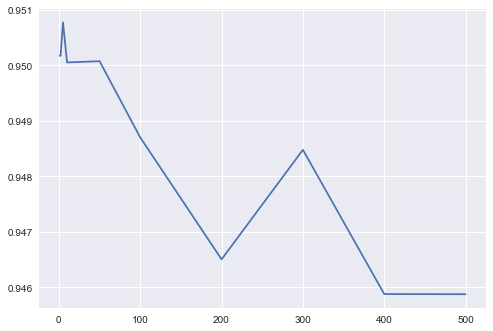

In [174]:
y_1_tr = [1,2,5,10,50,100,200,300,400,500]
plt.plot(y_1_tr,mean_list_tr)
plt.show()

С увеличением количества деревьев, качество немного падает, чуть-чуть возрастая на 300 деревьях

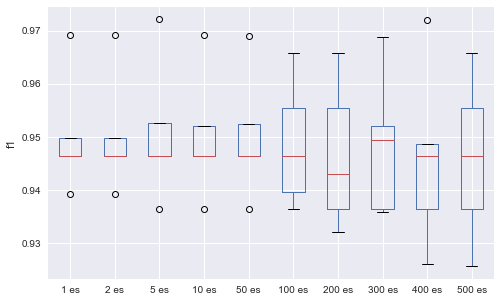

In [175]:
scores.boxplot(figsize=(8,5))
plt.ylabel('f1')
plt.show()

Теперь проверим на тестовой выборке

In [176]:
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: [],
          200: [],
         300: [],
         400: [],
         500: []
         }

kf = KFold(n_splits=5)

for x in scores:
    cbc = CatBoostClassifier(random_seed=17, n_estimators=x)
    scores[x] = cross_val_score(cbc, X_test, y_test, cv=kf, scoring='f1')
scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' es' for x in scores.columns]

Learning rate set to 0.5
0:	learn: 0.5305285	total: 3.87ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5074970	total: 3.44ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5091571	total: 3.25ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4997324	total: 3.21ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4990890	total: 3.68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5305285	total: 3.35ms	remaining: 3.35ms
1:	learn: 0.4378493	total: 7.01ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5074970	total: 3.41ms	remaining: 3.41ms
1:	learn: 0.4220175	total: 7.59ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5091571	total: 2.33ms	remaining: 2.33ms
1:	learn: 0.4177158	total: 4.59ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4997324	total: 2.31ms	remaining: 2.31ms
1:	learn: 0.4097920	total: 4.68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4990890	total: 2.37ms	remaining: 2.37ms
1:	learn: 0.4144280	total: 4.55ms	remaining: 0us


40:	learn: 0.2694816	total: 132ms	remaining: 29ms
41:	learn: 0.2667150	total: 136ms	remaining: 25.8ms
42:	learn: 0.2635784	total: 139ms	remaining: 22.6ms
43:	learn: 0.2611046	total: 142ms	remaining: 19.4ms
44:	learn: 0.2586147	total: 146ms	remaining: 16.2ms
45:	learn: 0.2570018	total: 149ms	remaining: 13ms
46:	learn: 0.2552811	total: 152ms	remaining: 9.73ms
47:	learn: 0.2526092	total: 156ms	remaining: 6.49ms
48:	learn: 0.2491273	total: 159ms	remaining: 3.25ms
49:	learn: 0.2468270	total: 163ms	remaining: 0us
Learning rate set to 0.07483
0:	learn: 0.6607201	total: 3.28ms	remaining: 161ms
1:	learn: 0.6333571	total: 7.18ms	remaining: 172ms
2:	learn: 0.6114656	total: 10.7ms	remaining: 167ms
3:	learn: 0.5812707	total: 12.5ms	remaining: 143ms
4:	learn: 0.5537093	total: 14.2ms	remaining: 128ms
5:	learn: 0.5339653	total: 17.6ms	remaining: 129ms
6:	learn: 0.5173679	total: 20.9ms	remaining: 128ms
7:	learn: 0.4966341	total: 24.2ms	remaining: 127ms
8:	learn: 0.4819907	total: 27.3ms	remaining: 125ms

1:	learn: 0.6659493	total: 4.3ms	remaining: 211ms
2:	learn: 0.6536438	total: 6.31ms	remaining: 204ms
3:	learn: 0.6349926	total: 7.6ms	remaining: 182ms
4:	learn: 0.6221825	total: 9.69ms	remaining: 184ms
5:	learn: 0.6102305	total: 11.7ms	remaining: 184ms
6:	learn: 0.5974585	total: 13.5ms	remaining: 179ms
7:	learn: 0.5852473	total: 15.1ms	remaining: 174ms
8:	learn: 0.5677195	total: 15.9ms	remaining: 161ms
9:	learn: 0.5550627	total: 18.4ms	remaining: 165ms
10:	learn: 0.5448393	total: 20.4ms	remaining: 165ms
11:	learn: 0.5321607	total: 21.7ms	remaining: 159ms
12:	learn: 0.5218286	total: 23.7ms	remaining: 159ms
13:	learn: 0.5145702	total: 25.7ms	remaining: 158ms
14:	learn: 0.5078605	total: 27.5ms	remaining: 156ms
15:	learn: 0.4987667	total: 29.6ms	remaining: 155ms
16:	learn: 0.4921584	total: 31.7ms	remaining: 155ms
17:	learn: 0.4836890	total: 33.6ms	remaining: 153ms
18:	learn: 0.4749416	total: 35.1ms	remaining: 150ms
19:	learn: 0.4687700	total: 37.1ms	remaining: 148ms
20:	learn: 0.4618693	to

Learning rate set to 0.039631
0:	learn: 0.6757543	total: 1.31ms	remaining: 130ms
1:	learn: 0.6604274	total: 3.07ms	remaining: 151ms
2:	learn: 0.6477329	total: 4.39ms	remaining: 142ms
3:	learn: 0.6294615	total: 5.26ms	remaining: 126ms
4:	learn: 0.6119807	total: 6.26ms	remaining: 119ms
5:	learn: 0.5990345	total: 7.75ms	remaining: 122ms
6:	learn: 0.5876549	total: 9.19ms	remaining: 122ms
7:	learn: 0.5730305	total: 10.6ms	remaining: 121ms
8:	learn: 0.5623452	total: 11.9ms	remaining: 121ms
9:	learn: 0.5478509	total: 12.5ms	remaining: 112ms
10:	learn: 0.5378275	total: 13.7ms	remaining: 111ms
11:	learn: 0.5267830	total: 15.4ms	remaining: 113ms
12:	learn: 0.5157435	total: 16.5ms	remaining: 111ms
13:	learn: 0.5040523	total: 17.4ms	remaining: 107ms
14:	learn: 0.4941445	total: 18.8ms	remaining: 106ms
15:	learn: 0.4825917	total: 19.4ms	remaining: 102ms
16:	learn: 0.4727979	total: 20.9ms	remaining: 102ms
17:	learn: 0.4668317	total: 22.3ms	remaining: 102ms
18:	learn: 0.4594593	total: 23.8ms	remaining

87:	learn: 0.2416321	total: 282ms	remaining: 38.5ms
88:	learn: 0.2402944	total: 286ms	remaining: 35.3ms
89:	learn: 0.2391275	total: 289ms	remaining: 32.1ms
90:	learn: 0.2382010	total: 293ms	remaining: 28.9ms
91:	learn: 0.2369222	total: 296ms	remaining: 25.7ms
92:	learn: 0.2356931	total: 299ms	remaining: 22.5ms
93:	learn: 0.2346929	total: 302ms	remaining: 19.3ms
94:	learn: 0.2332576	total: 306ms	remaining: 16.1ms
95:	learn: 0.2322472	total: 309ms	remaining: 12.9ms
96:	learn: 0.2311566	total: 312ms	remaining: 9.66ms
97:	learn: 0.2299983	total: 316ms	remaining: 6.44ms
98:	learn: 0.2288134	total: 319ms	remaining: 3.23ms
99:	learn: 0.2279128	total: 323ms	remaining: 0us
Learning rate set to 0.039732
0:	learn: 0.6744157	total: 3.52ms	remaining: 349ms
1:	learn: 0.6596806	total: 6.51ms	remaining: 319ms
2:	learn: 0.6472754	total: 9.78ms	remaining: 316ms
3:	learn: 0.6293901	total: 11.7ms	remaining: 281ms
4:	learn: 0.6148875	total: 14.5ms	remaining: 275ms
5:	learn: 0.6025692	total: 18ms	remaining:

101:	learn: 0.1386486	total: 298ms	remaining: 287ms
102:	learn: 0.1371648	total: 300ms	remaining: 283ms
103:	learn: 0.1354473	total: 302ms	remaining: 279ms
104:	learn: 0.1345373	total: 304ms	remaining: 275ms
105:	learn: 0.1332880	total: 306ms	remaining: 272ms
106:	learn: 0.1321568	total: 308ms	remaining: 268ms
107:	learn: 0.1311230	total: 310ms	remaining: 264ms
108:	learn: 0.1297921	total: 312ms	remaining: 261ms
109:	learn: 0.1284167	total: 314ms	remaining: 257ms
110:	learn: 0.1272611	total: 316ms	remaining: 254ms
111:	learn: 0.1259224	total: 318ms	remaining: 250ms
112:	learn: 0.1247720	total: 320ms	remaining: 247ms
113:	learn: 0.1236898	total: 322ms	remaining: 243ms
114:	learn: 0.1225581	total: 324ms	remaining: 239ms
115:	learn: 0.1211749	total: 326ms	remaining: 236ms
116:	learn: 0.1207569	total: 328ms	remaining: 233ms
117:	learn: 0.1201527	total: 329ms	remaining: 229ms
118:	learn: 0.1188345	total: 331ms	remaining: 225ms
119:	learn: 0.1180775	total: 333ms	remaining: 222ms
120:	learn: 

64:	learn: 0.2185157	total: 166ms	remaining: 344ms
65:	learn: 0.2157471	total: 169ms	remaining: 343ms
66:	learn: 0.2124181	total: 172ms	remaining: 340ms
67:	learn: 0.2112745	total: 174ms	remaining: 338ms
68:	learn: 0.2107537	total: 176ms	remaining: 333ms
69:	learn: 0.2081240	total: 178ms	remaining: 331ms
70:	learn: 0.2055020	total: 181ms	remaining: 329ms
71:	learn: 0.2031670	total: 184ms	remaining: 327ms
72:	learn: 0.2001975	total: 187ms	remaining: 326ms
73:	learn: 0.1979483	total: 190ms	remaining: 323ms
74:	learn: 0.1957960	total: 193ms	remaining: 321ms
75:	learn: 0.1939227	total: 195ms	remaining: 319ms
76:	learn: 0.1931174	total: 198ms	remaining: 317ms
77:	learn: 0.1921053	total: 200ms	remaining: 313ms
78:	learn: 0.1904510	total: 203ms	remaining: 311ms
79:	learn: 0.1888280	total: 206ms	remaining: 309ms
80:	learn: 0.1873603	total: 209ms	remaining: 307ms
81:	learn: 0.1859356	total: 211ms	remaining: 304ms
82:	learn: 0.1847565	total: 214ms	remaining: 302ms
83:	learn: 0.1833973	total: 217

57:	learn: 0.2340454	total: 152ms	remaining: 373ms
58:	learn: 0.2328250	total: 155ms	remaining: 370ms
59:	learn: 0.2308869	total: 158ms	remaining: 368ms
60:	learn: 0.2282766	total: 160ms	remaining: 365ms
61:	learn: 0.2265003	total: 163ms	remaining: 363ms
62:	learn: 0.2235470	total: 166ms	remaining: 361ms
63:	learn: 0.2212911	total: 169ms	remaining: 358ms
64:	learn: 0.2195325	total: 171ms	remaining: 356ms
65:	learn: 0.2176092	total: 174ms	remaining: 353ms
66:	learn: 0.2150998	total: 176ms	remaining: 349ms
67:	learn: 0.2128301	total: 178ms	remaining: 345ms
68:	learn: 0.2118280	total: 180ms	remaining: 341ms
69:	learn: 0.2098856	total: 181ms	remaining: 337ms
70:	learn: 0.2089150	total: 183ms	remaining: 333ms
71:	learn: 0.2067299	total: 185ms	remaining: 329ms
72:	learn: 0.2052476	total: 188ms	remaining: 326ms
73:	learn: 0.2035600	total: 190ms	remaining: 323ms
74:	learn: 0.2017404	total: 192ms	remaining: 320ms
75:	learn: 0.2002003	total: 195ms	remaining: 318ms
76:	learn: 0.1978908	total: 197

31:	learn: 0.3098824	total: 143ms	remaining: 748ms
32:	learn: 0.3035784	total: 147ms	remaining: 743ms
33:	learn: 0.2989718	total: 152ms	remaining: 742ms
34:	learn: 0.2922843	total: 157ms	remaining: 738ms
35:	learn: 0.2879842	total: 161ms	remaining: 734ms
36:	learn: 0.2838476	total: 168ms	remaining: 741ms
37:	learn: 0.2811209	total: 171ms	remaining: 729ms
38:	learn: 0.2770588	total: 176ms	remaining: 725ms
39:	learn: 0.2737498	total: 181ms	remaining: 726ms
40:	learn: 0.2698426	total: 186ms	remaining: 721ms
41:	learn: 0.2677098	total: 188ms	remaining: 706ms
42:	learn: 0.2622832	total: 191ms	remaining: 698ms
43:	learn: 0.2582386	total: 194ms	remaining: 689ms
44:	learn: 0.2549570	total: 198ms	remaining: 681ms
45:	learn: 0.2521758	total: 201ms	remaining: 672ms
46:	learn: 0.2501854	total: 202ms	remaining: 659ms
47:	learn: 0.2473717	total: 208ms	remaining: 657ms
48:	learn: 0.2429958	total: 210ms	remaining: 648ms
49:	learn: 0.2409036	total: 213ms	remaining: 638ms
50:	learn: 0.2367383	total: 215

0:	learn: 0.6713234	total: 4.56ms	remaining: 907ms
1:	learn: 0.6512274	total: 9.36ms	remaining: 927ms
2:	learn: 0.6351410	total: 13.4ms	remaining: 883ms
3:	learn: 0.6115733	total: 18.2ms	remaining: 889ms
4:	learn: 0.5952978	total: 20.1ms	remaining: 783ms
5:	learn: 0.5786787	total: 24.4ms	remaining: 789ms
6:	learn: 0.5607379	total: 28.6ms	remaining: 789ms
7:	learn: 0.5450625	total: 33.6ms	remaining: 805ms
8:	learn: 0.5284635	total: 38.3ms	remaining: 813ms
9:	learn: 0.5176745	total: 43.3ms	remaining: 822ms
10:	learn: 0.4989588	total: 48.2ms	remaining: 827ms
11:	learn: 0.4847547	total: 53.1ms	remaining: 832ms
12:	learn: 0.4733014	total: 57.6ms	remaining: 829ms
13:	learn: 0.4638745	total: 63.6ms	remaining: 845ms
14:	learn: 0.4517731	total: 67ms	remaining: 826ms
15:	learn: 0.4441271	total: 70.7ms	remaining: 813ms
16:	learn: 0.4356689	total: 72.9ms	remaining: 785ms
17:	learn: 0.4263483	total: 77.9ms	remaining: 788ms
18:	learn: 0.4185503	total: 82.8ms	remaining: 788ms
19:	learn: 0.4077178	tot

170:	learn: 0.0968602	total: 762ms	remaining: 129ms
171:	learn: 0.0961621	total: 765ms	remaining: 125ms
172:	learn: 0.0952935	total: 768ms	remaining: 120ms
173:	learn: 0.0944993	total: 770ms	remaining: 115ms
174:	learn: 0.0941034	total: 773ms	remaining: 110ms
175:	learn: 0.0932821	total: 776ms	remaining: 106ms
176:	learn: 0.0932076	total: 778ms	remaining: 101ms
177:	learn: 0.0925274	total: 780ms	remaining: 96.5ms
178:	learn: 0.0919820	total: 783ms	remaining: 91.9ms
179:	learn: 0.0914606	total: 788ms	remaining: 87.6ms
180:	learn: 0.0910954	total: 791ms	remaining: 83ms
181:	learn: 0.0904610	total: 793ms	remaining: 78.5ms
182:	learn: 0.0901862	total: 795ms	remaining: 73.9ms
183:	learn: 0.0896594	total: 798ms	remaining: 69.4ms
184:	learn: 0.0890519	total: 800ms	remaining: 64.9ms
185:	learn: 0.0884563	total: 802ms	remaining: 60.4ms
186:	learn: 0.0880612	total: 804ms	remaining: 55.9ms
187:	learn: 0.0874322	total: 806ms	remaining: 51.5ms
188:	learn: 0.0871545	total: 808ms	remaining: 47ms
189:

169:	learn: 0.1309890	total: 485ms	remaining: 371ms
170:	learn: 0.1302393	total: 489ms	remaining: 369ms
171:	learn: 0.1295878	total: 492ms	remaining: 366ms
172:	learn: 0.1293774	total: 494ms	remaining: 362ms
173:	learn: 0.1287241	total: 496ms	remaining: 360ms
174:	learn: 0.1283672	total: 499ms	remaining: 356ms
175:	learn: 0.1274418	total: 502ms	remaining: 353ms
176:	learn: 0.1266277	total: 504ms	remaining: 350ms
177:	learn: 0.1261356	total: 507ms	remaining: 347ms
178:	learn: 0.1257963	total: 510ms	remaining: 345ms
179:	learn: 0.1256265	total: 512ms	remaining: 341ms
180:	learn: 0.1246357	total: 515ms	remaining: 338ms
181:	learn: 0.1238474	total: 517ms	remaining: 335ms
182:	learn: 0.1230012	total: 520ms	remaining: 332ms
183:	learn: 0.1223275	total: 522ms	remaining: 329ms
184:	learn: 0.1216809	total: 525ms	remaining: 326ms
185:	learn: 0.1208901	total: 528ms	remaining: 324ms
186:	learn: 0.1199329	total: 531ms	remaining: 321ms
187:	learn: 0.1196359	total: 533ms	remaining: 318ms
188:	learn: 

29:	learn: 0.3994945	total: 138ms	remaining: 1.25s
30:	learn: 0.3923332	total: 144ms	remaining: 1.25s
31:	learn: 0.3863275	total: 149ms	remaining: 1.25s
32:	learn: 0.3800886	total: 153ms	remaining: 1.24s
33:	learn: 0.3753127	total: 158ms	remaining: 1.24s
34:	learn: 0.3703122	total: 164ms	remaining: 1.24s
35:	learn: 0.3658286	total: 169ms	remaining: 1.24s
36:	learn: 0.3618107	total: 174ms	remaining: 1.24s
37:	learn: 0.3579258	total: 179ms	remaining: 1.24s
38:	learn: 0.3527579	total: 184ms	remaining: 1.23s
39:	learn: 0.3494572	total: 187ms	remaining: 1.22s
40:	learn: 0.3449883	total: 192ms	remaining: 1.21s
41:	learn: 0.3392250	total: 197ms	remaining: 1.21s
42:	learn: 0.3336267	total: 201ms	remaining: 1.2s
43:	learn: 0.3297526	total: 206ms	remaining: 1.2s
44:	learn: 0.3266016	total: 211ms	remaining: 1.2s
45:	learn: 0.3231820	total: 216ms	remaining: 1.19s
46:	learn: 0.3188310	total: 222ms	remaining: 1.19s
47:	learn: 0.3153652	total: 226ms	remaining: 1.19s
48:	learn: 0.3127991	total: 231ms	

217:	learn: 0.1083459	total: 903ms	remaining: 340ms
218:	learn: 0.1078368	total: 908ms	remaining: 336ms
219:	learn: 0.1073701	total: 913ms	remaining: 332ms
220:	learn: 0.1069326	total: 918ms	remaining: 328ms
221:	learn: 0.1064694	total: 922ms	remaining: 324ms
222:	learn: 0.1059000	total: 926ms	remaining: 320ms
223:	learn: 0.1057487	total: 929ms	remaining: 315ms
224:	learn: 0.1052019	total: 934ms	remaining: 311ms
225:	learn: 0.1047271	total: 938ms	remaining: 307ms
226:	learn: 0.1041110	total: 942ms	remaining: 303ms
227:	learn: 0.1035740	total: 947ms	remaining: 299ms
228:	learn: 0.1031318	total: 951ms	remaining: 295ms
229:	learn: 0.1026278	total: 955ms	remaining: 291ms
230:	learn: 0.1020764	total: 959ms	remaining: 286ms
231:	learn: 0.1015815	total: 963ms	remaining: 282ms
232:	learn: 0.1010511	total: 968ms	remaining: 278ms
233:	learn: 0.1005545	total: 972ms	remaining: 274ms
234:	learn: 0.1002718	total: 977ms	remaining: 270ms
235:	learn: 0.0999903	total: 981ms	remaining: 266ms
236:	learn: 

104:	learn: 0.1978842	total: 453ms	remaining: 842ms
105:	learn: 0.1963320	total: 459ms	remaining: 839ms
106:	learn: 0.1950952	total: 464ms	remaining: 836ms
107:	learn: 0.1932983	total: 468ms	remaining: 832ms
108:	learn: 0.1918423	total: 472ms	remaining: 827ms
109:	learn: 0.1914725	total: 476ms	remaining: 822ms
110:	learn: 0.1894107	total: 480ms	remaining: 818ms
111:	learn: 0.1886669	total: 484ms	remaining: 813ms
112:	learn: 0.1875604	total: 489ms	remaining: 809ms
113:	learn: 0.1861173	total: 493ms	remaining: 804ms
114:	learn: 0.1849449	total: 497ms	remaining: 800ms
115:	learn: 0.1835749	total: 502ms	remaining: 796ms
116:	learn: 0.1821699	total: 506ms	remaining: 792ms
117:	learn: 0.1815987	total: 509ms	remaining: 785ms
118:	learn: 0.1806068	total: 513ms	remaining: 781ms
119:	learn: 0.1800811	total: 516ms	remaining: 774ms
120:	learn: 0.1791048	total: 520ms	remaining: 770ms
121:	learn: 0.1784771	total: 525ms	remaining: 766ms
122:	learn: 0.1778789	total: 529ms	remaining: 762ms
123:	learn: 

269:	learn: 0.0940126	total: 1.17s	remaining: 130ms
270:	learn: 0.0938892	total: 1.18s	remaining: 126ms
271:	learn: 0.0935796	total: 1.18s	remaining: 122ms
272:	learn: 0.0934620	total: 1.19s	remaining: 117ms
273:	learn: 0.0930471	total: 1.19s	remaining: 113ms
274:	learn: 0.0927200	total: 1.19s	remaining: 109ms
275:	learn: 0.0924791	total: 1.2s	remaining: 104ms
276:	learn: 0.0922559	total: 1.2s	remaining: 99.8ms
277:	learn: 0.0919861	total: 1.21s	remaining: 95.5ms
278:	learn: 0.0915835	total: 1.21s	remaining: 91.2ms
279:	learn: 0.0915153	total: 1.21s	remaining: 86.7ms
280:	learn: 0.0915030	total: 1.22s	remaining: 82.2ms
281:	learn: 0.0913457	total: 1.22s	remaining: 77.9ms
282:	learn: 0.0910776	total: 1.23s	remaining: 73.6ms
283:	learn: 0.0908503	total: 1.23s	remaining: 69.2ms
284:	learn: 0.0906254	total: 1.23s	remaining: 64.9ms
285:	learn: 0.0902852	total: 1.24s	remaining: 60.6ms
286:	learn: 0.0901297	total: 1.24s	remaining: 56.3ms
287:	learn: 0.0899626	total: 1.25s	remaining: 52ms
288:

151:	learn: 0.1435338	total: 622ms	remaining: 606ms
152:	learn: 0.1432600	total: 626ms	remaining: 601ms
153:	learn: 0.1424345	total: 631ms	remaining: 598ms
154:	learn: 0.1421715	total: 634ms	remaining: 593ms
155:	learn: 0.1412666	total: 639ms	remaining: 590ms
156:	learn: 0.1405929	total: 643ms	remaining: 586ms
157:	learn: 0.1395273	total: 647ms	remaining: 582ms
158:	learn: 0.1389155	total: 651ms	remaining: 578ms
159:	learn: 0.1386227	total: 656ms	remaining: 574ms
160:	learn: 0.1376722	total: 661ms	remaining: 570ms
161:	learn: 0.1368080	total: 665ms	remaining: 566ms
162:	learn: 0.1361251	total: 670ms	remaining: 563ms
163:	learn: 0.1352117	total: 674ms	remaining: 559ms
164:	learn: 0.1345007	total: 678ms	remaining: 555ms
165:	learn: 0.1337768	total: 682ms	remaining: 551ms
166:	learn: 0.1329151	total: 686ms	remaining: 547ms
167:	learn: 0.1326983	total: 690ms	remaining: 542ms
168:	learn: 0.1322259	total: 693ms	remaining: 537ms
169:	learn: 0.1317951	total: 697ms	remaining: 533ms
170:	learn: 

32:	learn: 0.3878469	total: 140ms	remaining: 1.13s
33:	learn: 0.3817002	total: 144ms	remaining: 1.13s
34:	learn: 0.3768367	total: 148ms	remaining: 1.12s
35:	learn: 0.3723497	total: 152ms	remaining: 1.12s
36:	learn: 0.3674198	total: 157ms	remaining: 1.11s
37:	learn: 0.3608022	total: 161ms	remaining: 1.11s
38:	learn: 0.3560097	total: 166ms	remaining: 1.11s
39:	learn: 0.3512076	total: 170ms	remaining: 1.1s
40:	learn: 0.3482772	total: 172ms	remaining: 1.08s
41:	learn: 0.3435465	total: 176ms	remaining: 1.08s
42:	learn: 0.3388631	total: 181ms	remaining: 1.08s
43:	learn: 0.3341773	total: 185ms	remaining: 1.08s
44:	learn: 0.3296380	total: 190ms	remaining: 1.08s
45:	learn: 0.3261649	total: 195ms	remaining: 1.08s
46:	learn: 0.3216530	total: 199ms	remaining: 1.07s
47:	learn: 0.3182218	total: 203ms	remaining: 1.07s
48:	learn: 0.3149046	total: 207ms	remaining: 1.06s
49:	learn: 0.3118481	total: 210ms	remaining: 1.05s
50:	learn: 0.3088514	total: 214ms	remaining: 1.04s
51:	learn: 0.3045790	total: 218m

204:	learn: 0.1137950	total: 894ms	remaining: 414ms
205:	learn: 0.1134329	total: 898ms	remaining: 410ms
206:	learn: 0.1127150	total: 902ms	remaining: 405ms
207:	learn: 0.1123074	total: 906ms	remaining: 401ms
208:	learn: 0.1119112	total: 910ms	remaining: 396ms
209:	learn: 0.1114738	total: 914ms	remaining: 392ms
210:	learn: 0.1108461	total: 918ms	remaining: 387ms
211:	learn: 0.1102481	total: 923ms	remaining: 383ms
212:	learn: 0.1095771	total: 927ms	remaining: 379ms
213:	learn: 0.1091670	total: 931ms	remaining: 374ms
214:	learn: 0.1086618	total: 936ms	remaining: 370ms
215:	learn: 0.1081093	total: 941ms	remaining: 366ms
216:	learn: 0.1074705	total: 945ms	remaining: 361ms
217:	learn: 0.1069329	total: 949ms	remaining: 357ms
218:	learn: 0.1063062	total: 954ms	remaining: 353ms
219:	learn: 0.1058541	total: 958ms	remaining: 348ms
220:	learn: 0.1052646	total: 962ms	remaining: 344ms
221:	learn: 0.1049943	total: 966ms	remaining: 339ms
222:	learn: 0.1044914	total: 971ms	remaining: 335ms
223:	learn: 

69:	learn: 0.2877708	total: 186ms	remaining: 878ms
70:	learn: 0.2857422	total: 188ms	remaining: 871ms
71:	learn: 0.2837590	total: 191ms	remaining: 868ms
72:	learn: 0.2825492	total: 192ms	remaining: 859ms
73:	learn: 0.2802798	total: 194ms	remaining: 856ms
74:	learn: 0.2785533	total: 197ms	remaining: 854ms
75:	learn: 0.2769663	total: 200ms	remaining: 854ms
76:	learn: 0.2751480	total: 203ms	remaining: 853ms
77:	learn: 0.2725725	total: 206ms	remaining: 849ms
78:	learn: 0.2706592	total: 208ms	remaining: 846ms
79:	learn: 0.2685099	total: 211ms	remaining: 844ms
80:	learn: 0.2660842	total: 214ms	remaining: 842ms
81:	learn: 0.2639868	total: 216ms	remaining: 839ms
82:	learn: 0.2626878	total: 219ms	remaining: 836ms
83:	learn: 0.2609167	total: 222ms	remaining: 834ms
84:	learn: 0.2584976	total: 224ms	remaining: 831ms
85:	learn: 0.2567355	total: 227ms	remaining: 829ms
86:	learn: 0.2537990	total: 230ms	remaining: 827ms
87:	learn: 0.2517963	total: 232ms	remaining: 824ms
88:	learn: 0.2495559	total: 235

241:	learn: 0.1180261	total: 634ms	remaining: 414ms
242:	learn: 0.1173793	total: 637ms	remaining: 412ms
243:	learn: 0.1168621	total: 640ms	remaining: 409ms
244:	learn: 0.1164040	total: 643ms	remaining: 407ms
245:	learn: 0.1158663	total: 645ms	remaining: 404ms
246:	learn: 0.1154639	total: 648ms	remaining: 401ms
247:	learn: 0.1153580	total: 650ms	remaining: 398ms
248:	learn: 0.1149427	total: 652ms	remaining: 395ms
249:	learn: 0.1143387	total: 655ms	remaining: 393ms
250:	learn: 0.1140637	total: 657ms	remaining: 390ms
251:	learn: 0.1136324	total: 660ms	remaining: 388ms
252:	learn: 0.1131104	total: 662ms	remaining: 385ms
253:	learn: 0.1128066	total: 665ms	remaining: 382ms
254:	learn: 0.1122942	total: 668ms	remaining: 380ms
255:	learn: 0.1116112	total: 670ms	remaining: 377ms
256:	learn: 0.1113533	total: 673ms	remaining: 374ms
257:	learn: 0.1108321	total: 675ms	remaining: 372ms
258:	learn: 0.1104334	total: 678ms	remaining: 369ms
259:	learn: 0.1098843	total: 681ms	remaining: 366ms
260:	learn: 

Learning rate set to 0.011116
0:	learn: 0.6830101	total: 4.75ms	remaining: 1.9s
1:	learn: 0.6724361	total: 9.37ms	remaining: 1.86s
2:	learn: 0.6621918	total: 13.6ms	remaining: 1.8s
3:	learn: 0.6488284	total: 18.8ms	remaining: 1.86s
4:	learn: 0.6389312	total: 21.7ms	remaining: 1.72s
5:	learn: 0.6287934	total: 26.5ms	remaining: 1.74s
6:	learn: 0.6192382	total: 31.9ms	remaining: 1.79s
7:	learn: 0.6093648	total: 38.2ms	remaining: 1.87s
8:	learn: 0.5992146	total: 44.2ms	remaining: 1.92s
9:	learn: 0.5890194	total: 47.1ms	remaining: 1.84s
10:	learn: 0.5792623	total: 50.8ms	remaining: 1.8s
11:	learn: 0.5704373	total: 55.7ms	remaining: 1.8s
12:	learn: 0.5606787	total: 60.1ms	remaining: 1.79s
13:	learn: 0.5517051	total: 64.4ms	remaining: 1.77s
14:	learn: 0.5446568	total: 70.2ms	remaining: 1.8s
15:	learn: 0.5355371	total: 75.8ms	remaining: 1.82s
16:	learn: 0.5286171	total: 81.7ms	remaining: 1.84s
17:	learn: 0.5196743	total: 86.7ms	remaining: 1.84s
18:	learn: 0.5116560	total: 91.7ms	remaining: 1.8

165:	learn: 0.1729223	total: 739ms	remaining: 1.04s
166:	learn: 0.1719120	total: 744ms	remaining: 1.04s
167:	learn: 0.1716483	total: 746ms	remaining: 1.03s
168:	learn: 0.1708210	total: 751ms	remaining: 1.03s
169:	learn: 0.1697715	total: 756ms	remaining: 1.02s
170:	learn: 0.1694869	total: 760ms	remaining: 1.02s
171:	learn: 0.1686726	total: 765ms	remaining: 1.01s
172:	learn: 0.1677764	total: 770ms	remaining: 1.01s
173:	learn: 0.1675392	total: 774ms	remaining: 1s
174:	learn: 0.1668712	total: 779ms	remaining: 1s
175:	learn: 0.1657947	total: 783ms	remaining: 997ms
176:	learn: 0.1651167	total: 787ms	remaining: 992ms
177:	learn: 0.1645981	total: 792ms	remaining: 988ms
178:	learn: 0.1640824	total: 797ms	remaining: 984ms
179:	learn: 0.1632750	total: 801ms	remaining: 979ms
180:	learn: 0.1622816	total: 806ms	remaining: 975ms
181:	learn: 0.1621617	total: 809ms	remaining: 969ms
182:	learn: 0.1617099	total: 813ms	remaining: 965ms
183:	learn: 0.1609413	total: 819ms	remaining: 961ms
184:	learn: 0.1601

358:	learn: 0.0869838	total: 1.34s	remaining: 153ms
359:	learn: 0.0866257	total: 1.34s	remaining: 149ms
360:	learn: 0.0863917	total: 1.34s	remaining: 145ms
361:	learn: 0.0859945	total: 1.35s	remaining: 141ms
362:	learn: 0.0857152	total: 1.35s	remaining: 137ms
363:	learn: 0.0853985	total: 1.35s	remaining: 134ms
364:	learn: 0.0851421	total: 1.35s	remaining: 130ms
365:	learn: 0.0848878	total: 1.35s	remaining: 126ms
366:	learn: 0.0847754	total: 1.36s	remaining: 122ms
367:	learn: 0.0845523	total: 1.36s	remaining: 118ms
368:	learn: 0.0841724	total: 1.36s	remaining: 114ms
369:	learn: 0.0839038	total: 1.36s	remaining: 110ms
370:	learn: 0.0836232	total: 1.36s	remaining: 107ms
371:	learn: 0.0832723	total: 1.37s	remaining: 103ms
372:	learn: 0.0829983	total: 1.37s	remaining: 99ms
373:	learn: 0.0828551	total: 1.37s	remaining: 95.2ms
374:	learn: 0.0827643	total: 1.37s	remaining: 91.4ms
375:	learn: 0.0825638	total: 1.37s	remaining: 87.6ms
376:	learn: 0.0822318	total: 1.38s	remaining: 83.9ms
377:	lear

135:	learn: 0.2052173	total: 449ms	remaining: 872ms
136:	learn: 0.2043361	total: 452ms	remaining: 868ms
137:	learn: 0.2034570	total: 455ms	remaining: 863ms
138:	learn: 0.2021944	total: 456ms	remaining: 857ms
139:	learn: 0.2012427	total: 459ms	remaining: 852ms
140:	learn: 0.2003127	total: 461ms	remaining: 847ms
141:	learn: 0.1993005	total: 464ms	remaining: 843ms
142:	learn: 0.1988046	total: 466ms	remaining: 838ms
143:	learn: 0.1978661	total: 468ms	remaining: 833ms
144:	learn: 0.1965444	total: 471ms	remaining: 828ms
145:	learn: 0.1958018	total: 473ms	remaining: 824ms
146:	learn: 0.1944999	total: 476ms	remaining: 819ms
147:	learn: 0.1939071	total: 478ms	remaining: 814ms
148:	learn: 0.1930960	total: 480ms	remaining: 809ms
149:	learn: 0.1925956	total: 483ms	remaining: 804ms
150:	learn: 0.1917068	total: 485ms	remaining: 799ms
151:	learn: 0.1905228	total: 487ms	remaining: 795ms
152:	learn: 0.1896979	total: 489ms	remaining: 789ms
153:	learn: 0.1892386	total: 491ms	remaining: 785ms
154:	learn: 

306:	learn: 0.1100361	total: 900ms	remaining: 273ms
307:	learn: 0.1098238	total: 903ms	remaining: 270ms
308:	learn: 0.1094907	total: 906ms	remaining: 267ms
309:	learn: 0.1091273	total: 908ms	remaining: 264ms
310:	learn: 0.1089726	total: 911ms	remaining: 261ms
311:	learn: 0.1085169	total: 913ms	remaining: 258ms
312:	learn: 0.1081126	total: 916ms	remaining: 255ms
313:	learn: 0.1079003	total: 918ms	remaining: 251ms
314:	learn: 0.1076996	total: 920ms	remaining: 248ms
315:	learn: 0.1072636	total: 923ms	remaining: 245ms
316:	learn: 0.1070241	total: 926ms	remaining: 242ms
317:	learn: 0.1069309	total: 929ms	remaining: 239ms
318:	learn: 0.1066839	total: 932ms	remaining: 237ms
319:	learn: 0.1064809	total: 934ms	remaining: 234ms
320:	learn: 0.1062350	total: 937ms	remaining: 231ms
321:	learn: 0.1060092	total: 939ms	remaining: 228ms
322:	learn: 0.1056246	total: 942ms	remaining: 225ms
323:	learn: 0.1054015	total: 945ms	remaining: 222ms
324:	learn: 0.1053585	total: 946ms	remaining: 218ms
325:	learn: 

90:	learn: 0.2445216	total: 446ms	remaining: 1.51s
91:	learn: 0.2424721	total: 451ms	remaining: 1.51s
92:	learn: 0.2409549	total: 456ms	remaining: 1.5s
93:	learn: 0.2389607	total: 461ms	remaining: 1.5s
94:	learn: 0.2370275	total: 466ms	remaining: 1.5s
95:	learn: 0.2356831	total: 471ms	remaining: 1.49s
96:	learn: 0.2343711	total: 476ms	remaining: 1.49s
97:	learn: 0.2325723	total: 482ms	remaining: 1.48s
98:	learn: 0.2308036	total: 487ms	remaining: 1.48s
99:	learn: 0.2295771	total: 493ms	remaining: 1.48s
100:	learn: 0.2285063	total: 498ms	remaining: 1.47s
101:	learn: 0.2276778	total: 502ms	remaining: 1.47s
102:	learn: 0.2260927	total: 507ms	remaining: 1.46s
103:	learn: 0.2242759	total: 510ms	remaining: 1.45s
104:	learn: 0.2228405	total: 516ms	remaining: 1.45s
105:	learn: 0.2214973	total: 521ms	remaining: 1.44s
106:	learn: 0.2208514	total: 523ms	remaining: 1.43s
107:	learn: 0.2197443	total: 528ms	remaining: 1.43s
108:	learn: 0.2186531	total: 533ms	remaining: 1.42s
109:	learn: 0.2173198	tot

274:	learn: 0.1028629	total: 1.19s	remaining: 541ms
275:	learn: 0.1023719	total: 1.19s	remaining: 536ms
276:	learn: 0.1021547	total: 1.2s	remaining: 531ms
277:	learn: 0.1018396	total: 1.2s	remaining: 526ms
278:	learn: 0.1015252	total: 1.2s	remaining: 522ms
279:	learn: 0.1012038	total: 1.21s	remaining: 517ms
280:	learn: 0.1011102	total: 1.21s	remaining: 511ms
281:	learn: 0.1007579	total: 1.21s	remaining: 506ms
282:	learn: 0.1006247	total: 1.21s	remaining: 502ms
283:	learn: 0.1001050	total: 1.22s	remaining: 497ms
284:	learn: 0.0996800	total: 1.22s	remaining: 492ms
285:	learn: 0.0991895	total: 1.22s	remaining: 487ms
286:	learn: 0.0989462	total: 1.22s	remaining: 482ms
287:	learn: 0.0985516	total: 1.23s	remaining: 478ms
288:	learn: 0.0981070	total: 1.23s	remaining: 473ms
289:	learn: 0.0978631	total: 1.23s	remaining: 468ms
290:	learn: 0.0975796	total: 1.24s	remaining: 463ms
291:	learn: 0.0971207	total: 1.24s	remaining: 458ms
292:	learn: 0.0966917	total: 1.24s	remaining: 453ms
293:	learn: 0.0

39:	learn: 0.3963086	total: 156ms	remaining: 1.41s
40:	learn: 0.3931017	total: 159ms	remaining: 1.39s
41:	learn: 0.3884112	total: 163ms	remaining: 1.39s
42:	learn: 0.3836361	total: 168ms	remaining: 1.39s
43:	learn: 0.3789083	total: 172ms	remaining: 1.39s
44:	learn: 0.3741408	total: 176ms	remaining: 1.39s
45:	learn: 0.3705229	total: 181ms	remaining: 1.39s
46:	learn: 0.3657079	total: 185ms	remaining: 1.39s
47:	learn: 0.3617072	total: 189ms	remaining: 1.39s
48:	learn: 0.3581049	total: 193ms	remaining: 1.38s
49:	learn: 0.3542397	total: 197ms	remaining: 1.38s
50:	learn: 0.3496488	total: 201ms	remaining: 1.37s
51:	learn: 0.3469860	total: 205ms	remaining: 1.37s
52:	learn: 0.3437284	total: 209ms	remaining: 1.37s
53:	learn: 0.3391297	total: 213ms	remaining: 1.36s
54:	learn: 0.3359994	total: 217ms	remaining: 1.36s
55:	learn: 0.3319553	total: 222ms	remaining: 1.36s
56:	learn: 0.3289791	total: 226ms	remaining: 1.36s
57:	learn: 0.3267514	total: 231ms	remaining: 1.36s
58:	learn: 0.3238381	total: 235

216:	learn: 0.1396557	total: 909ms	remaining: 767ms
217:	learn: 0.1394011	total: 914ms	remaining: 763ms
218:	learn: 0.1386683	total: 919ms	remaining: 759ms
219:	learn: 0.1381169	total: 923ms	remaining: 755ms
220:	learn: 0.1374623	total: 927ms	remaining: 751ms
221:	learn: 0.1373861	total: 930ms	remaining: 745ms
222:	learn: 0.1368036	total: 934ms	remaining: 741ms
223:	learn: 0.1361350	total: 938ms	remaining: 737ms
224:	learn: 0.1353537	total: 943ms	remaining: 733ms
225:	learn: 0.1352376	total: 945ms	remaining: 728ms
226:	learn: 0.1348592	total: 949ms	remaining: 723ms
227:	learn: 0.1342011	total: 953ms	remaining: 719ms
228:	learn: 0.1334083	total: 958ms	remaining: 716ms
229:	learn: 0.1327981	total: 962ms	remaining: 711ms
230:	learn: 0.1322083	total: 967ms	remaining: 707ms
231:	learn: 0.1318296	total: 971ms	remaining: 703ms
232:	learn: 0.1313135	total: 976ms	remaining: 699ms
233:	learn: 0.1308331	total: 980ms	remaining: 695ms
234:	learn: 0.1303670	total: 984ms	remaining: 691ms
235:	learn: 

395:	learn: 0.0795781	total: 1.67s	remaining: 16.8ms
396:	learn: 0.0793479	total: 1.67s	remaining: 12.6ms
397:	learn: 0.0791086	total: 1.68s	remaining: 8.42ms
398:	learn: 0.0788652	total: 1.68s	remaining: 4.21ms
399:	learn: 0.0786403	total: 1.68s	remaining: 0us
Learning rate set to 0.009059
0:	learn: 0.6841568	total: 3.65ms	remaining: 1.82s
1:	learn: 0.6746194	total: 7.16ms	remaining: 1.78s
2:	learn: 0.6664019	total: 10ms	remaining: 1.66s
3:	learn: 0.6564370	total: 13.9ms	remaining: 1.73s
4:	learn: 0.6480559	total: 16.2ms	remaining: 1.6s
5:	learn: 0.6398197	total: 19.8ms	remaining: 1.63s
6:	learn: 0.6317132	total: 22.1ms	remaining: 1.56s
7:	learn: 0.6226834	total: 26ms	remaining: 1.6s
8:	learn: 0.6135766	total: 29.6ms	remaining: 1.61s
9:	learn: 0.6067840	total: 31.6ms	remaining: 1.55s
10:	learn: 0.5968248	total: 35.6ms	remaining: 1.58s
11:	learn: 0.5901759	total: 39.3ms	remaining: 1.6s
12:	learn: 0.5836841	total: 41.7ms	remaining: 1.56s
13:	learn: 0.5769329	total: 45.3ms	remaining: 1.5

166:	learn: 0.1886025	total: 640ms	remaining: 1.27s
167:	learn: 0.1876348	total: 644ms	remaining: 1.27s
168:	learn: 0.1867376	total: 648ms	remaining: 1.27s
169:	learn: 0.1863743	total: 651ms	remaining: 1.26s
170:	learn: 0.1852789	total: 655ms	remaining: 1.26s
171:	learn: 0.1841829	total: 659ms	remaining: 1.26s
172:	learn: 0.1838254	total: 662ms	remaining: 1.25s
173:	learn: 0.1834852	total: 665ms	remaining: 1.25s
174:	learn: 0.1825764	total: 669ms	remaining: 1.24s
175:	learn: 0.1815586	total: 675ms	remaining: 1.24s
176:	learn: 0.1807699	total: 679ms	remaining: 1.24s
177:	learn: 0.1802966	total: 684ms	remaining: 1.24s
178:	learn: 0.1801133	total: 687ms	remaining: 1.23s
179:	learn: 0.1795144	total: 692ms	remaining: 1.23s
180:	learn: 0.1786674	total: 696ms	remaining: 1.23s
181:	learn: 0.1781290	total: 701ms	remaining: 1.23s
182:	learn: 0.1772439	total: 706ms	remaining: 1.22s
183:	learn: 0.1766214	total: 710ms	remaining: 1.22s
184:	learn: 0.1764011	total: 715ms	remaining: 1.22s
185:	learn: 

330:	learn: 0.1044047	total: 1.35s	remaining: 692ms
331:	learn: 0.1039830	total: 1.36s	remaining: 688ms
332:	learn: 0.1036750	total: 1.36s	remaining: 684ms
333:	learn: 0.1032250	total: 1.37s	remaining: 680ms
334:	learn: 0.1030547	total: 1.37s	remaining: 676ms
335:	learn: 0.1026896	total: 1.38s	remaining: 672ms
336:	learn: 0.1021750	total: 1.38s	remaining: 667ms
337:	learn: 0.1019073	total: 1.38s	remaining: 663ms
338:	learn: 0.1015282	total: 1.39s	remaining: 659ms
339:	learn: 0.1011795	total: 1.39s	remaining: 656ms
340:	learn: 0.1008196	total: 1.4s	remaining: 651ms
341:	learn: 0.1006473	total: 1.4s	remaining: 647ms
342:	learn: 0.1005098	total: 1.41s	remaining: 643ms
343:	learn: 0.1000760	total: 1.41s	remaining: 639ms
344:	learn: 0.0997257	total: 1.41s	remaining: 635ms
345:	learn: 0.0991867	total: 1.42s	remaining: 632ms
346:	learn: 0.0989588	total: 1.42s	remaining: 628ms
347:	learn: 0.0986891	total: 1.43s	remaining: 624ms
348:	learn: 0.0984461	total: 1.43s	remaining: 620ms
349:	learn: 0.

Learning rate set to 0.009059
0:	learn: 0.6848742	total: 4.51ms	remaining: 2.25s
1:	learn: 0.6762047	total: 8.75ms	remaining: 2.18s
2:	learn: 0.6677635	total: 12.4ms	remaining: 2.06s
3:	learn: 0.6567163	total: 16.6ms	remaining: 2.06s
4:	learn: 0.6484708	total: 19ms	remaining: 1.88s
5:	learn: 0.6401362	total: 23.2ms	remaining: 1.91s
6:	learn: 0.6324744	total: 25.7ms	remaining: 1.81s
7:	learn: 0.6234330	total: 29.7ms	remaining: 1.82s
8:	learn: 0.6151490	total: 34.5ms	remaining: 1.88s
9:	learn: 0.6081366	total: 36.4ms	remaining: 1.78s
10:	learn: 0.5995440	total: 40.5ms	remaining: 1.8s
11:	learn: 0.5921081	total: 44.9ms	remaining: 1.83s
12:	learn: 0.5853766	total: 47.5ms	remaining: 1.78s
13:	learn: 0.5780666	total: 51.6ms	remaining: 1.79s
14:	learn: 0.5712085	total: 54.3ms	remaining: 1.75s
15:	learn: 0.5652523	total: 57.8ms	remaining: 1.75s
16:	learn: 0.5581813	total: 62ms	remaining: 1.76s
17:	learn: 0.5497263	total: 66.4ms	remaining: 1.78s
18:	learn: 0.5429124	total: 70.5ms	remaining: 1.7

186:	learn: 0.1818023	total: 769ms	remaining: 1.29s
187:	learn: 0.1810206	total: 774ms	remaining: 1.28s
188:	learn: 0.1805648	total: 779ms	remaining: 1.28s
189:	learn: 0.1795586	total: 782ms	remaining: 1.28s
190:	learn: 0.1789055	total: 787ms	remaining: 1.27s
191:	learn: 0.1778065	total: 792ms	remaining: 1.27s
192:	learn: 0.1771755	total: 797ms	remaining: 1.27s
193:	learn: 0.1762713	total: 801ms	remaining: 1.26s
194:	learn: 0.1757287	total: 806ms	remaining: 1.26s
195:	learn: 0.1748307	total: 811ms	remaining: 1.26s
196:	learn: 0.1743334	total: 815ms	remaining: 1.25s
197:	learn: 0.1734493	total: 819ms	remaining: 1.25s
198:	learn: 0.1729149	total: 824ms	remaining: 1.25s
199:	learn: 0.1718357	total: 828ms	remaining: 1.24s
200:	learn: 0.1709761	total: 832ms	remaining: 1.24s
201:	learn: 0.1702336	total: 837ms	remaining: 1.23s
202:	learn: 0.1694016	total: 841ms	remaining: 1.23s
203:	learn: 0.1685389	total: 845ms	remaining: 1.23s
204:	learn: 0.1678836	total: 849ms	remaining: 1.22s
205:	learn: 

350:	learn: 0.1042062	total: 1.48s	remaining: 629ms
351:	learn: 0.1038008	total: 1.49s	remaining: 625ms
352:	learn: 0.1037690	total: 1.49s	remaining: 620ms
353:	learn: 0.1035108	total: 1.49s	remaining: 615ms
354:	learn: 0.1030976	total: 1.5s	remaining: 611ms
355:	learn: 0.1028317	total: 1.5s	remaining: 607ms
356:	learn: 0.1024223	total: 1.5s	remaining: 603ms
357:	learn: 0.1021220	total: 1.51s	remaining: 599ms
358:	learn: 0.1017940	total: 1.51s	remaining: 595ms
359:	learn: 0.1016515	total: 1.52s	remaining: 590ms
360:	learn: 0.1014137	total: 1.52s	remaining: 586ms
361:	learn: 0.1010459	total: 1.53s	remaining: 582ms
362:	learn: 0.1007118	total: 1.53s	remaining: 578ms
363:	learn: 0.1003801	total: 1.53s	remaining: 574ms
364:	learn: 0.1000346	total: 1.54s	remaining: 569ms
365:	learn: 0.0998558	total: 1.54s	remaining: 565ms
366:	learn: 0.0995562	total: 1.55s	remaining: 561ms
367:	learn: 0.0992480	total: 1.55s	remaining: 557ms
368:	learn: 0.0989419	total: 1.56s	remaining: 553ms
369:	learn: 0.0

47:	learn: 0.3993576	total: 171ms	remaining: 1.61s
48:	learn: 0.3963923	total: 175ms	remaining: 1.61s
49:	learn: 0.3930787	total: 179ms	remaining: 1.61s
50:	learn: 0.3893694	total: 183ms	remaining: 1.61s
51:	learn: 0.3858792	total: 187ms	remaining: 1.61s
52:	learn: 0.3817894	total: 191ms	remaining: 1.61s
53:	learn: 0.3787102	total: 195ms	remaining: 1.61s
54:	learn: 0.3754340	total: 199ms	remaining: 1.61s
55:	learn: 0.3720276	total: 204ms	remaining: 1.61s
56:	learn: 0.3692554	total: 208ms	remaining: 1.61s
57:	learn: 0.3663150	total: 212ms	remaining: 1.61s
58:	learn: 0.3634287	total: 216ms	remaining: 1.61s
59:	learn: 0.3613603	total: 219ms	remaining: 1.61s
60:	learn: 0.3587803	total: 223ms	remaining: 1.61s
61:	learn: 0.3564258	total: 227ms	remaining: 1.6s
62:	learn: 0.3537643	total: 231ms	remaining: 1.6s
63:	learn: 0.3511622	total: 235ms	remaining: 1.6s
64:	learn: 0.3476901	total: 239ms	remaining: 1.6s
65:	learn: 0.3454193	total: 242ms	remaining: 1.59s
66:	learn: 0.3434855	total: 245ms	r

225:	learn: 0.1673525	total: 934ms	remaining: 1.13s
226:	learn: 0.1667499	total: 938ms	remaining: 1.13s
227:	learn: 0.1662186	total: 943ms	remaining: 1.12s
228:	learn: 0.1657152	total: 947ms	remaining: 1.12s
229:	learn: 0.1655351	total: 952ms	remaining: 1.12s
230:	learn: 0.1649176	total: 956ms	remaining: 1.11s
231:	learn: 0.1643237	total: 960ms	remaining: 1.11s
232:	learn: 0.1640962	total: 962ms	remaining: 1.1s
233:	learn: 0.1634725	total: 966ms	remaining: 1.1s
234:	learn: 0.1629896	total: 971ms	remaining: 1.09s
235:	learn: 0.1625079	total: 975ms	remaining: 1.09s
236:	learn: 0.1619256	total: 979ms	remaining: 1.08s
237:	learn: 0.1614606	total: 983ms	remaining: 1.08s
238:	learn: 0.1608925	total: 988ms	remaining: 1.08s
239:	learn: 0.1606947	total: 992ms	remaining: 1.07s
240:	learn: 0.1599646	total: 996ms	remaining: 1.07s
241:	learn: 0.1596137	total: 1s	remaining: 1.07s
242:	learn: 0.1591194	total: 1s	remaining: 1.06s
243:	learn: 0.1588507	total: 1.01s	remaining: 1.06s
244:	learn: 0.158657

413:	learn: 0.1008607	total: 1.69s	remaining: 352ms
414:	learn: 0.1006206	total: 1.7s	remaining: 348ms
415:	learn: 0.1004570	total: 1.7s	remaining: 344ms
416:	learn: 0.1000557	total: 1.71s	remaining: 340ms
417:	learn: 0.0998962	total: 1.71s	remaining: 336ms
418:	learn: 0.0997200	total: 1.72s	remaining: 332ms
419:	learn: 0.0994197	total: 1.72s	remaining: 328ms
420:	learn: 0.0991355	total: 1.73s	remaining: 324ms
421:	learn: 0.0988632	total: 1.73s	remaining: 320ms
422:	learn: 0.0985845	total: 1.74s	remaining: 316ms
423:	learn: 0.0981975	total: 1.74s	remaining: 312ms
424:	learn: 0.0978967	total: 1.75s	remaining: 308ms
425:	learn: 0.0975175	total: 1.75s	remaining: 304ms
426:	learn: 0.0972809	total: 1.75s	remaining: 300ms
427:	learn: 0.0970946	total: 1.76s	remaining: 296ms
428:	learn: 0.0968151	total: 1.76s	remaining: 292ms
429:	learn: 0.0966788	total: 1.77s	remaining: 288ms
430:	learn: 0.0964578	total: 1.77s	remaining: 284ms
431:	learn: 0.0963530	total: 1.78s	remaining: 280ms
432:	learn: 0.

74:	learn: 0.3080943	total: 295ms	remaining: 1.67s
75:	learn: 0.3055030	total: 300ms	remaining: 1.67s
76:	learn: 0.3035088	total: 304ms	remaining: 1.67s
77:	learn: 0.3012350	total: 308ms	remaining: 1.67s
78:	learn: 0.2994163	total: 312ms	remaining: 1.66s
79:	learn: 0.2974038	total: 315ms	remaining: 1.66s
80:	learn: 0.2955553	total: 320ms	remaining: 1.65s
81:	learn: 0.2932497	total: 324ms	remaining: 1.65s
82:	learn: 0.2914843	total: 328ms	remaining: 1.65s
83:	learn: 0.2894484	total: 333ms	remaining: 1.65s
84:	learn: 0.2870662	total: 337ms	remaining: 1.65s
85:	learn: 0.2853091	total: 341ms	remaining: 1.64s
86:	learn: 0.2839303	total: 344ms	remaining: 1.63s
87:	learn: 0.2816898	total: 348ms	remaining: 1.63s
88:	learn: 0.2798213	total: 352ms	remaining: 1.63s
89:	learn: 0.2776686	total: 356ms	remaining: 1.62s
90:	learn: 0.2761455	total: 361ms	remaining: 1.62s
91:	learn: 0.2739757	total: 365ms	remaining: 1.62s
92:	learn: 0.2718322	total: 369ms	remaining: 1.61s
93:	learn: 0.2696593	total: 374

285:	learn: 0.1231219	total: 1.05s	remaining: 787ms
286:	learn: 0.1227152	total: 1.05s	remaining: 782ms
287:	learn: 0.1222717	total: 1.06s	remaining: 778ms
288:	learn: 0.1216359	total: 1.06s	remaining: 773ms
289:	learn: 0.1211352	total: 1.06s	remaining: 769ms
290:	learn: 0.1207894	total: 1.06s	remaining: 764ms
291:	learn: 0.1204694	total: 1.07s	remaining: 760ms
292:	learn: 0.1200355	total: 1.07s	remaining: 755ms
293:	learn: 0.1195773	total: 1.07s	remaining: 751ms
294:	learn: 0.1194351	total: 1.07s	remaining: 746ms
295:	learn: 0.1191341	total: 1.08s	remaining: 742ms
296:	learn: 0.1189135	total: 1.08s	remaining: 738ms
297:	learn: 0.1183338	total: 1.08s	remaining: 734ms
298:	learn: 0.1181303	total: 1.08s	remaining: 729ms
299:	learn: 0.1178574	total: 1.09s	remaining: 725ms
300:	learn: 0.1176487	total: 1.09s	remaining: 720ms
301:	learn: 0.1171478	total: 1.09s	remaining: 716ms
302:	learn: 0.1168022	total: 1.09s	remaining: 712ms
303:	learn: 0.1164474	total: 1.1s	remaining: 708ms
304:	learn: 0

460:	learn: 0.0747461	total: 1.51s	remaining: 127ms
461:	learn: 0.0745889	total: 1.51s	remaining: 124ms
462:	learn: 0.0743407	total: 1.51s	remaining: 121ms
463:	learn: 0.0742382	total: 1.51s	remaining: 117ms
464:	learn: 0.0740509	total: 1.52s	remaining: 114ms
465:	learn: 0.0738058	total: 1.52s	remaining: 111ms
466:	learn: 0.0736360	total: 1.52s	remaining: 108ms
467:	learn: 0.0735252	total: 1.52s	remaining: 104ms
468:	learn: 0.0732969	total: 1.53s	remaining: 101ms
469:	learn: 0.0730856	total: 1.53s	remaining: 97.6ms
470:	learn: 0.0728094	total: 1.53s	remaining: 94.3ms
471:	learn: 0.0726011	total: 1.53s	remaining: 91ms
472:	learn: 0.0724311	total: 1.54s	remaining: 87.7ms
473:	learn: 0.0722532	total: 1.54s	remaining: 84.5ms
474:	learn: 0.0720501	total: 1.54s	remaining: 81.2ms
475:	learn: 0.0718611	total: 1.54s	remaining: 77.9ms
476:	learn: 0.0717892	total: 1.55s	remaining: 74.6ms
477:	learn: 0.0716152	total: 1.55s	remaining: 71.3ms
478:	learn: 0.0714343	total: 1.55s	remaining: 68.1ms
479:

172:	learn: 0.1907227	total: 454ms	remaining: 858ms
173:	learn: 0.1901283	total: 456ms	remaining: 855ms
174:	learn: 0.1891855	total: 459ms	remaining: 853ms
175:	learn: 0.1884011	total: 462ms	remaining: 850ms
176:	learn: 0.1877970	total: 465ms	remaining: 848ms
177:	learn: 0.1871327	total: 467ms	remaining: 846ms
178:	learn: 0.1862333	total: 470ms	remaining: 843ms
179:	learn: 0.1861004	total: 471ms	remaining: 838ms
180:	learn: 0.1852016	total: 474ms	remaining: 835ms
181:	learn: 0.1844179	total: 477ms	remaining: 833ms
182:	learn: 0.1836123	total: 480ms	remaining: 831ms
183:	learn: 0.1828084	total: 482ms	remaining: 828ms
184:	learn: 0.1820386	total: 485ms	remaining: 825ms
185:	learn: 0.1816069	total: 487ms	remaining: 822ms
186:	learn: 0.1812686	total: 489ms	remaining: 818ms
187:	learn: 0.1804346	total: 492ms	remaining: 816ms
188:	learn: 0.1793553	total: 494ms	remaining: 813ms
189:	learn: 0.1786310	total: 497ms	remaining: 811ms
190:	learn: 0.1779625	total: 500ms	remaining: 809ms
191:	learn: 

349:	learn: 0.1091927	total: 1.06s	remaining: 456ms
350:	learn: 0.1089559	total: 1.07s	remaining: 454ms
351:	learn: 0.1086876	total: 1.07s	remaining: 452ms
352:	learn: 0.1085519	total: 1.08s	remaining: 449ms
353:	learn: 0.1081656	total: 1.08s	remaining: 447ms
354:	learn: 0.1080282	total: 1.09s	remaining: 445ms
355:	learn: 0.1077015	total: 1.09s	remaining: 442ms
356:	learn: 0.1072928	total: 1.1s	remaining: 440ms
357:	learn: 0.1070362	total: 1.1s	remaining: 438ms
358:	learn: 0.1067509	total: 1.11s	remaining: 435ms
359:	learn: 0.1065412	total: 1.11s	remaining: 433ms
360:	learn: 0.1060640	total: 1.12s	remaining: 430ms
361:	learn: 0.1057014	total: 1.12s	remaining: 428ms
362:	learn: 0.1053916	total: 1.13s	remaining: 425ms
363:	learn: 0.1050899	total: 1.13s	remaining: 422ms
364:	learn: 0.1047305	total: 1.13s	remaining: 420ms
365:	learn: 0.1044461	total: 1.14s	remaining: 417ms
366:	learn: 0.1042682	total: 1.14s	remaining: 414ms
367:	learn: 0.1037871	total: 1.15s	remaining: 411ms
368:	learn: 0.

In [177]:
scores.describe()

,1 es,2 es,5 es,10 es,50 es,100 es,200 es,300 es,400 es,500 es
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.907669,0.936312,0.949550,0.949550,0.949550,0.949550,0.943968,0.946694,0.943968,0.943968
std,0.022892,0.009545,0.020576,0.020576,0.020576,0.020576,0.017715,0.014443,0.017715,0.017715
min,0.880000,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.935065,0.923077,0.923077
25%,0.891892,0.935065,0.936709,0.936709,0.936709,0.936709,0.935065,0.936709,0.935065,0.935065
50%,0.906667,0.936709,0.950000,0.950000,0.950000,0.950000,0.936709,0.936709,0.936709,0.936709
75%,0.923077,0.936709,0.962963,0.962963,0.962963,0.962963,0.962025,0.962025,0.962025,0.962025
max,0.936709,0.950000,0.975000,0.975000,0.975000,0.975000,0.962963,0.962963,0.962963,0.962963


In [178]:
list(scores.mean())

[0.907668868478995,
 0.9363119159321691,
 0.9495497493598759,
 0.9495497493598759,
 0.9495497493598759,
 0.9495497493598759,
 0.9439677996640021,
 0.9466941872005163,
 0.9439677996640021,
 0.9439677996640021]

In [179]:
mean_list_te=[0.907668868478995,0.9363119159321691,0.9495497493598759,0.9495497493598759,0.9495497493598759,0.9495497493598759,0.9439677996640021,0.9466941872005163,0.9439677996640021,0.9439677996640021]

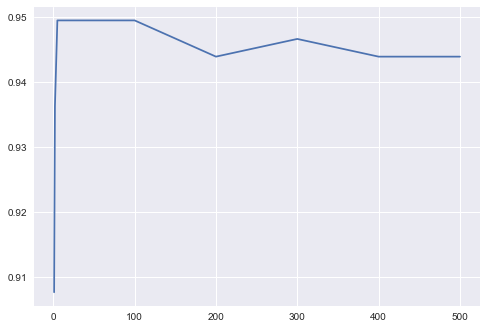

In [180]:
y_1_tr = [1,2,5,10,50,100,200,300,400,500]
plt.plot(y_1_tr,mean_list_te)
plt.show()

На тестовых данных модель показывает почти те же самые результаты

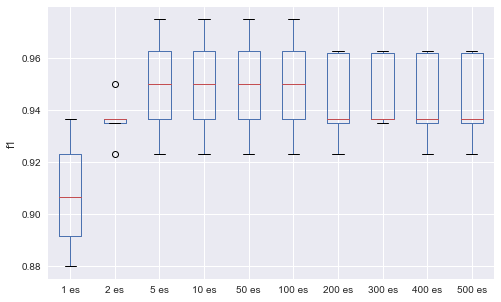

In [181]:
scores.boxplot(figsize=(8,5))
plt.ylabel('f1')
plt.show()

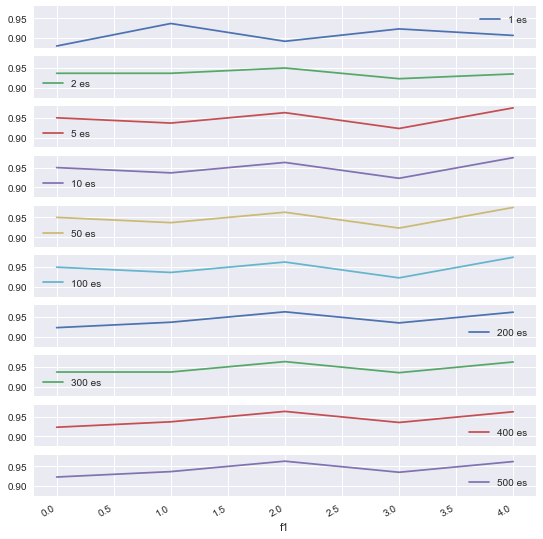

In [182]:
scores.plot(subplots=True, sharey=True, figsize=(9, 10))
plt.xlabel('iteration')
plt.xlabel('f1')
plt.show()

Теперь займемся подбором параметров

In [183]:
import catboost
from catboost import CatBoostClassifier
kf = KFold(n_splits=5)
cbc = CatBoostClassifier(random_seed=17)
import time
start_time = time.time()
parameters = {'iterations': [100, 250, 500, 1000],
              'depth': [1, 2, 3, 4, 5, 6]
}

cbc_cv = GridSearchCV(cbc, parameters, cv=kf, verbose=True,
                     n_jobs=-1)
cbc_cv.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   37.8s finished


Learning rate set to 0.078794
0:	learn: 0.6437495	total: 1.09ms	remaining: 108ms
1:	learn: 0.6013470	total: 2.34ms	remaining: 115ms
2:	learn: 0.5651845	total: 3.71ms	remaining: 120ms
3:	learn: 0.5335991	total: 4.65ms	remaining: 112ms
4:	learn: 0.5071794	total: 5.63ms	remaining: 107ms
5:	learn: 0.4840281	total: 6.51ms	remaining: 102ms
6:	learn: 0.4619181	total: 7.41ms	remaining: 98.4ms
7:	learn: 0.4422659	total: 8.34ms	remaining: 95.9ms
8:	learn: 0.4260636	total: 9.29ms	remaining: 93.9ms
9:	learn: 0.4102816	total: 10.4ms	remaining: 93.3ms
10:	learn: 0.3978775	total: 11.3ms	remaining: 91.5ms
11:	learn: 0.3847109	total: 12.3ms	remaining: 89.9ms
12:	learn: 0.3737857	total: 13.4ms	remaining: 89.7ms
13:	learn: 0.3648987	total: 14.7ms	remaining: 90.2ms
14:	learn: 0.3558407	total: 15.7ms	remaining: 88.7ms
15:	learn: 0.3490752	total: 16.6ms	remaining: 87.2ms
16:	learn: 0.3414079	total: 17.6ms	remaining: 85.9ms
17:	learn: 0.3343529	total: 18.7ms	remaining: 85.3ms
18:	learn: 0.3281123	total: 19.9

34 секунды

In [184]:
cbc_cv.best_params_

{'depth': 2, 'iterations': 100}

Обучим модель

In [185]:
cbc_cv.fit(X_train, y_train, eval_set=(X_test, y_test), logging_level='Verbose', plot=True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.9s finished


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.082521
0:	learn: 0.6429626	test: 0.6424260	best: 0.6424260 (0)	total: 1.86ms	remaining: 184ms
1:	learn: 0.6018051	test: 0.6011028	best: 0.6011028 (1)	total: 3.69ms	remaining: 181ms
2:	learn: 0.5660938	test: 0.5664104	best: 0.5664104 (2)	total: 5.43ms	remaining: 176ms
3:	learn: 0.5353900	test: 0.5370942	best: 0.5370942 (3)	total: 7.2ms	remaining: 173ms
4:	learn: 0.5067038	test: 0.5089303	best: 0.5089303 (4)	total: 8.98ms	remaining: 171ms
5:	learn: 0.4819821	test: 0.4840861	best: 0.4840861 (5)	total: 10ms	remaining: 157ms
6:	learn: 0.4595487	test: 0.4619093	best: 0.4619093 (6)	total: 11.7ms	remaining: 156ms
7:	learn: 0.4387404	test: 0.4405361	best: 0.4405361 (7)	total: 13.6ms	remaining: 156ms
8:	learn: 0.4225210	test: 0.4240502	best: 0.4240502 (8)	total: 15.5ms	remaining: 157ms
9:	learn: 0.4065722	test: 0.4091613	best: 0.4091613 (9)	total: 17.4ms	remaining: 157ms
10:	learn: 0.3932462	test: 0.3963802	best: 0.3963802 (10)	total: 19.2ms	remaining: 155ms
11:	learn: 0.3

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F499105DC0>,
             n_jobs=-1,
             param_grid={'depth': [1, 2, 3, 4, 5, 6],
                         'iterations': [100, 250, 500, 1000]},
             verbose=True)

In [186]:
y_pred = cbc_cv.predict(X_test)
y_pred_proba = cbc_cv.predict_proba(X_test)
method = 'macro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:,1], multi_class='ovr', average = 'macro'))

Accuracy:  0.9090909090909091
Recall:  0.525
Precision:  0.9543269230769231
F1:  0.523689576586302
ROC AUC:  0.8310846560846561


Модель показывает неплохую точность предсказания, но падает на f1 и recall.
Что касается ее сравнения с другими моделями, у нее лучшая тоность, лучшим roc auc обладает logistic regression, лучшие показатели по f1 у decision tree

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [187]:
data_res_2 = data_res_2.drop('G1',1)
data_res_2 = data_res_2.drop('G2',1)

Напишем функцию для разделения оценки на 4 класса

In [188]:
def divider(mark):
    if mark>=18:
        return 4
    elif mark >=14 and mark<=17:
        return 3
    elif mark >=8 and mark<=13:
        return 2
    else:
        return 1

In [189]:
data_res_2['G3'] = data_res_2['G3'].apply(divider)

In [190]:
data_res_2['G3'].value_counts()

2    650
3    259
1    100
4     35
Name: G3, dtype: int64

In [191]:
X = data_res_2.drop('G3',axis=1)
y = data_res_2['G3']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

#### KNN

In [193]:
y_train.value_counts(normalize=True)

2    0.621557
3    0.241916
1    0.105389
4    0.031138
Name: G3, dtype: float64

In [194]:
y_test.value_counts(normalize=True)

2    0.626794
3    0.272727
1    0.057416
4    0.043062
Name: G3, dtype: float64

Подберем параметры

In [195]:
param = {'n_neighbors': range(2, 15),'weights':['uniform','distance'],
                    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'metric':['canberra', 'chebyshev','hamming', 'jaccard','minkowski','manhattan']}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
grid = RandomizedSearchCV(KNeighborsClassifier(), param, cv=skf, verbose=True,n_iter=300,n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=300, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['canberra', 'chebyshev',
                                                   'hamming', 'jaccard',
                                                   'minkowski', 'manhattan'],
                                        'n_neighbors': range(2, 15),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [196]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
method = 'micro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6172248803827751
Recall:  0.6172248803827751
Precision:  0.6172248803827751
F1:  0.6172248803827751
ROC AUC:  0.6544203028098518


Результаты, мягко говоря, не самые лучшие

In [197]:
grid.best_params_

{'weights': 'uniform',
 'n_neighbors': 14,
 'metric': 'minkowski',
 'algorithm': 'brute'}

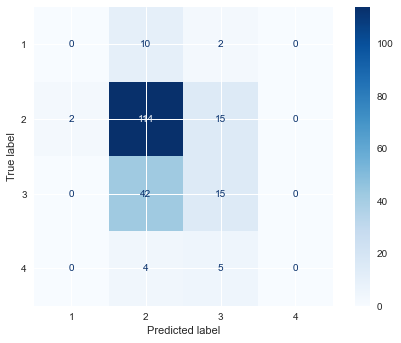

In [198]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

Заметим, что из-за многочисленности 2 группы, модель заносит многие эксперименты туда по ошибке, в результате точность является очеь плохой

#### LR

In [199]:
from sklearn.model_selection import RepeatedKFold
c_space = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 20,100])
param_grid = {'C': c_space,
              'penalty':['l1', 'l2', 'elasticnet'],
              'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight':['balanced','None'],
              'multi_class':['auto', 'ovr', 'multinomial'],}

lr = LogisticRegression()

lr_cv = RandomizedSearchCV(lr, param_grid, cv=RepeatedKFold(n_splits=5, n_repeats=2), verbose=True, n_iter=300,n_jobs=-1)

lr_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 2963 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 2985 out of 3000 | elapsed:   15.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   16.2s finished


Tuned Logistic Regression Parameters: {'tol': 0.001, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'class_weight': 'None', 'C': 1.0}


In [200]:
y_pred = lr_cv.predict(X_test)
y_pred_proba = lr_cv.predict_proba(X_test)
method = 'micro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6220095693779905
Recall:  0.6220095693779905
Precision:  0.6220095693779905
F1:  0.6220095693779905
ROC AUC:  0.7151776464071334


roc auc немножко подрос, но все остальне метрики хоть и лучше, но не блещут

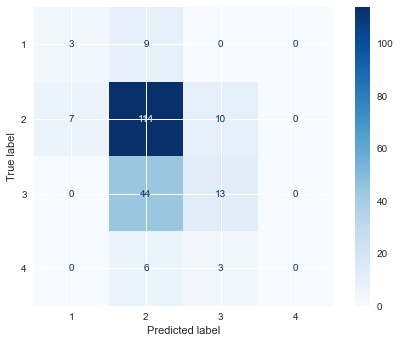

In [201]:
plot_confusion_matrix(lr_cv,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

Тут происходит все то же самое

#### Decision Tree

In [202]:

param = {'criterion':['gini','entropy'],'splitter':['best', 'random'],'class_weight':['balanced', 'balanced_subsample'],'max_depth': list(range(2,15)), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(DecisionTreeClassifier(), param, cv=10, verbose=True,n_iter=300,n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    6.9s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_split': range(2, 11, 2),
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [203]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
method = 'micro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.5598086124401914
Recall:  0.5598086124401914
Precision:  0.5598086124401914
F1:  0.5598086124401914
ROC AUC:  0.6065309716227176


Тут результаты еще хуже

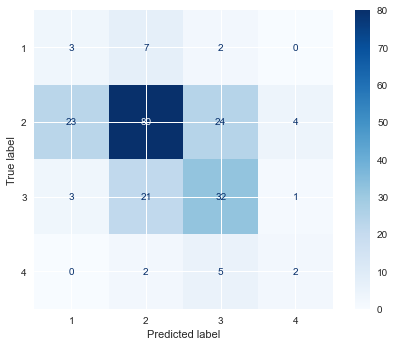

In [204]:
plot_confusion_matrix(grid,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

Здесь хотя бы предсказания распределились не только по 2 классу. Однако, результат точности еще хуже

RF

In [205]:
param = {'n_estimators': range(50, 1000, 50), 'max_depth': list(range(1,12)),'criterion': ['entropy', 'gini']}
grid = RandomizedSearchCV(RandomForestClassifier(), param, n_iter=300, cv=skf, verbose=True,n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=300, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'n_estimators': range(50, 1000, 50)},
                   verbose=True)

In [206]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
method = 'micro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6507177033492823
Recall:  0.6507177033492823
Precision:  0.6507177033492823
F1:  0.6507177033492823
ROC AUC:  0.7439536208828471


на рандомном лесу roc_auc пока лучше всех, но остальные метрики не очень, пока recall,f1 и precision лучше у linear regression

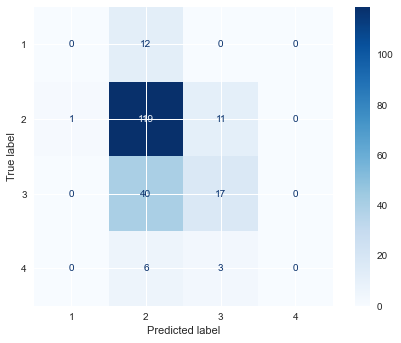

In [207]:
plot_confusion_matrix(grid,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

Вся та же проблема 2 класса

#### Gradient boosting

In [208]:
from sklearn.ensemble import GradientBoostingClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
param = {
    'n_estimators': [50,100, 150, 200,250,300],
    'criterion':['friedman_mse', 'mse', 'mae'],
    'max_depth': list(range(2,8))
}
grid = RandomizedSearchCV(GradientBoostingClassifier(), param, cv=skf, verbose=True,n_iter=300,n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 19.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=True)

In [209]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
method = 'micro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.631578947368421
Recall:  0.631578947368421
Precision:  0.631578947368421
F1:  0.631578947368421
ROC AUC:  0.7317727023877028


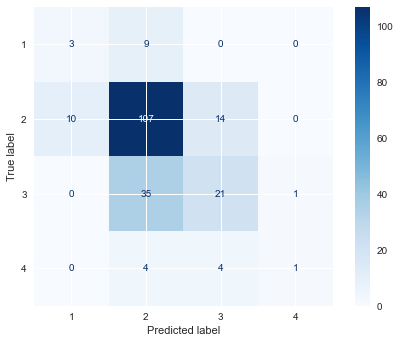

In [210]:
plot_confusion_matrix(grid,X_test,y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

Тут показатели распределились как-то средне между всеми участниками

Таким образом, без использования признаков G1 и G2 абсолютно все рассмотренные модели дают не самый лучший результат. Из-за многочисленности 2 класса, туда определяются почти все ученики.